In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import os
import scipy.optimize as sc
import glob
from matplotlib.ticker import MultipleLocator
import subprocess
from scipy.optimize import curve_fit
from scipy.stats import chi2


In [2]:
setup_path ="/home/haue/repositories/Masters/setup/" 
data_path = "/home/haue/repositories/Masters/data/singleprotons/Al/inclbetacut/"
twop_path = "/home/haue/repositories/Masters/data/twoproton/Al/"
Al_files = glob.glob(os.path.join(data_path, "*mlio.root"))
twop_files = glob.glob(os.path.join(twop_path, "*mlio.root"))
frac = 0.9542011788469517 # (Na21/(p+Na21)) amount of energy the daughter nucleus gets of the total energy released in the decay
frac_err = 1.032071836027589e-10 # uncertainty of the fraction
mp  = 1007825.031898
mNa = 20997654.459
mNe = 19992440.17525
S1p = 5504.1000
S2p = 7935.9963
QB  = 17600

def y1(x, E1):
    return E1 + 0*x
def y2(x, E1, E2): # E1 may be fixed
    M = mp/mNa
    return E2 - 2*M*np.sqrt(E1*E2)*x + E1*M**2

In [3]:
EE2p = np.array([])
E1 = np.array([])
E2 = np.array([])
Q2p = np.array([])
theta = np.array([])
for batch in uproot.iterate(twop_files, expressions=["E", "E1", "E2", "Q2p", "Theta"],
                            cut="Q2p>0"):
    EE2p=np.append(EE2p, ak.flatten(batch.E))
    E1=np.append(E1, batch.E1)
    E2=np.append(E2, batch.E2)
    Q2p=np.append(Q2p, batch.Q2p)
    theta=np.append(theta, batch.Theta)


In [4]:
len(E1), len(Q2p), len(theta)

(3281, 3281, 3281)

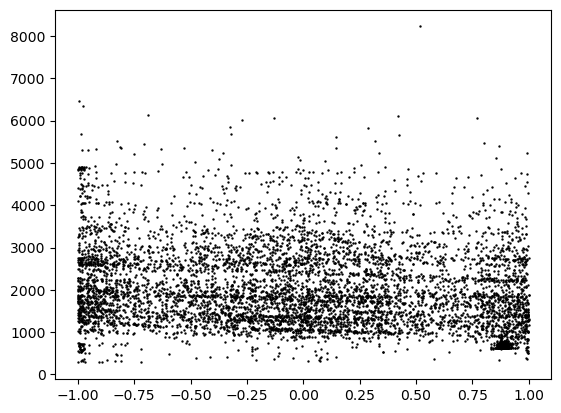

In [5]:
plt.scatter(np.cos(np.deg2rad(theta)), E1, color='k', s=0.5)
plt.scatter(np.cos(np.deg2rad(theta)), E2, color='k', s=0.5)
#plt.xticks(np.arange(1,-1,0.5))


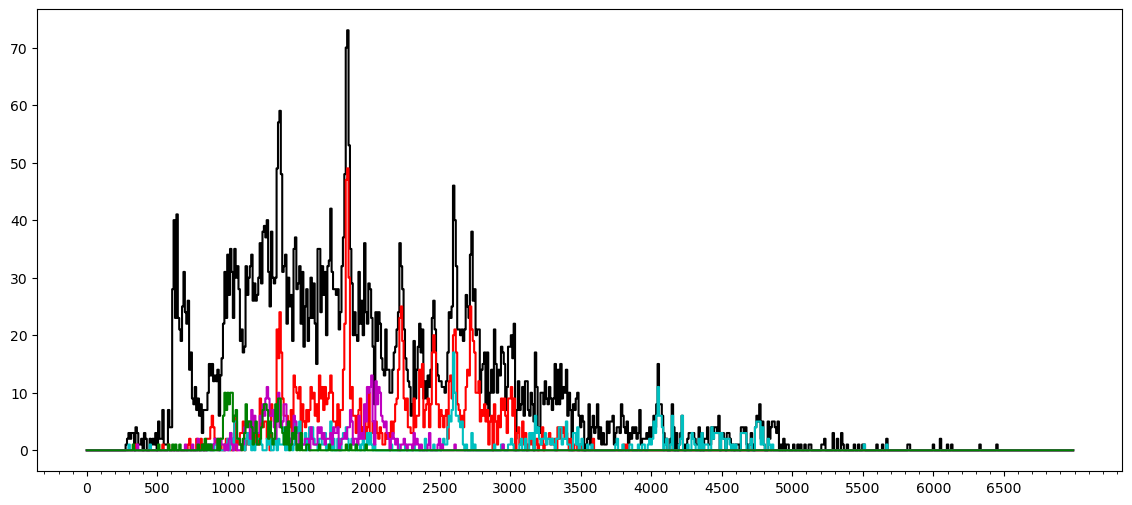

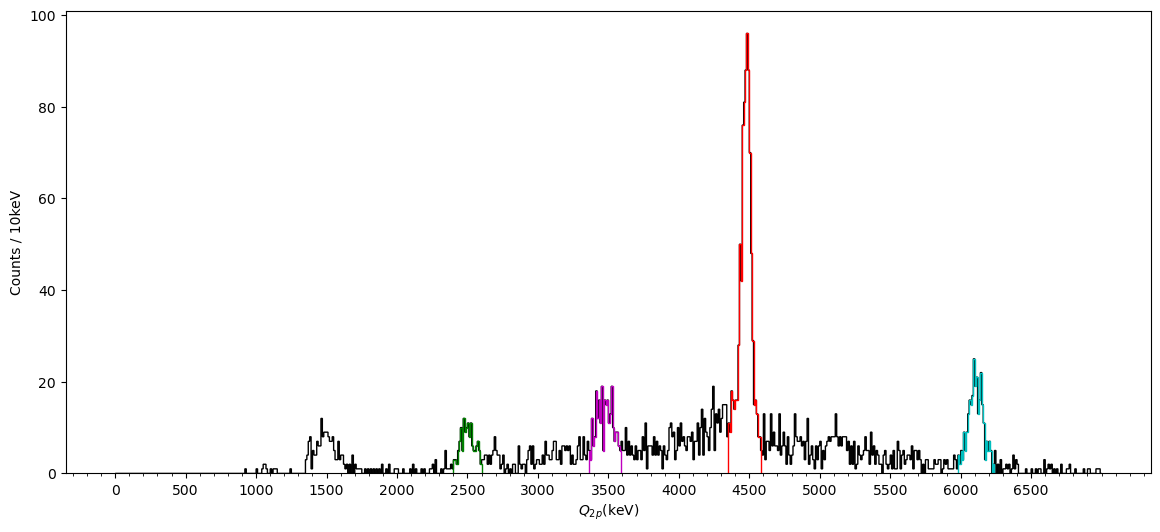

In [6]:
bins = np.arange(0,7000+10,10)

plt.figure(figsize=(14,6))
#plt.hist(EE2p, bins=bins, histtype='step', color='k')
h1, _ = np.histogram(np.array(E1), bins=bins)
h2, _ = np.histogram(np.array(E2), bins=bins)
plt.step(bins[:-1], h1+h2, where='mid', color='k')


lims = [(4350,4580), (6000,6230), (3360,3590), (2400,2600)]#(1350,1600), (2400,2600)]
cols = ['r', 'c', 'm', 'g']#, 'b']
#"""
for l,c in zip(lims,cols):
    mask = (Q2p >= l[0]) & (Q2p <= l[1])
    h1, _ = np.histogram(np.array(E1)[mask], bins=bins)
    h2, _ = np.histogram(np.array(E2)[mask], bins=bins)
    plt.step(bins[:-1], h1+h2, where='mid', color=c)
#"""

plt.xticks(np.arange(0,7000, 500))
plt.gca().xaxis.set_minor_locator(MultipleLocator(100))
plt.show()

plt.figure(figsize=(14,6))
plt.hist(Q2p, bins=np.arange(0,7000+10,10), histtype='step', color='k')

plt.hist(Q2p, bins=np.arange(4350,4580+10,10), histtype='step', color='r')
plt.hist(Q2p, bins=np.arange(5980,6240+10,10), histtype='step', color='c')
#plt.hist(Q2p, bins=np.arange(1350,1600+10,10), histtype='step', color='m')
plt.hist(Q2p, bins=np.arange(2400,2600+10,10), histtype='step', color='g')
plt.hist(Q2p, bins=np.arange(3360,3590+10,10), histtype='step', color='m')
plt.xticks(np.arange(0,7000, 500))
plt.gca().xaxis.set_minor_locator(MultipleLocator(100))
plt.xlabel(r"$Q_{2p}$(keV)")
plt.ylabel("Counts / 10keV")
plt.show()


#plt.figure(figsize=(8,6))
#plt.scatter(E1, Q2p, color='k', s=0.2, marker='o')
#plt.scatter(E2, Q2p, color='k',s=0.2, marker='o')
#plt.ylim(1000,8000)
#plt.show()

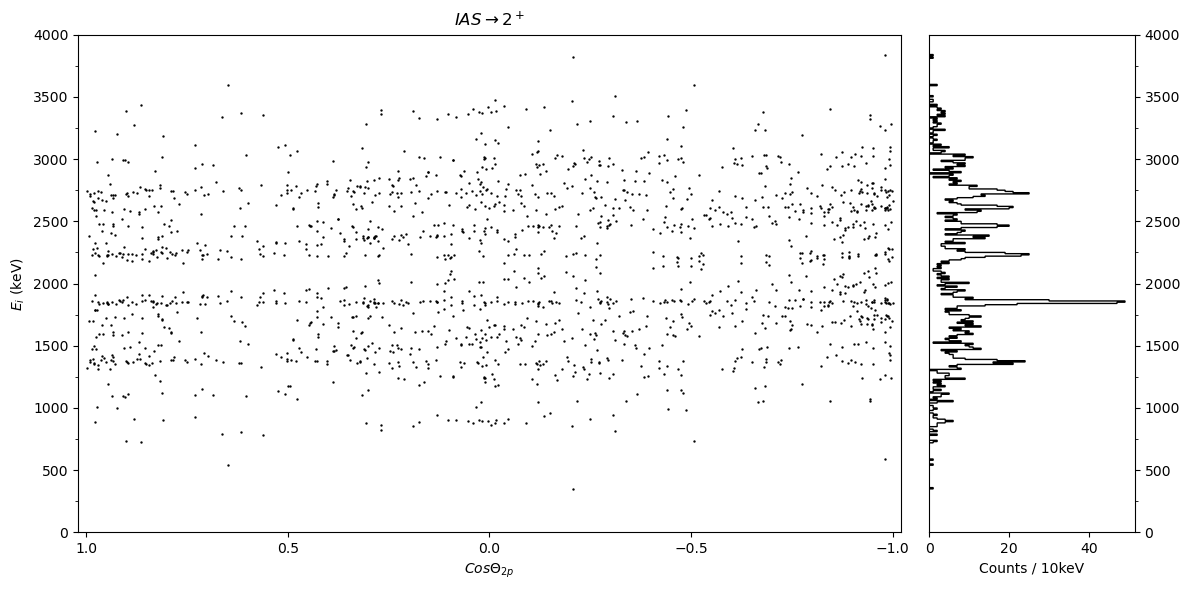

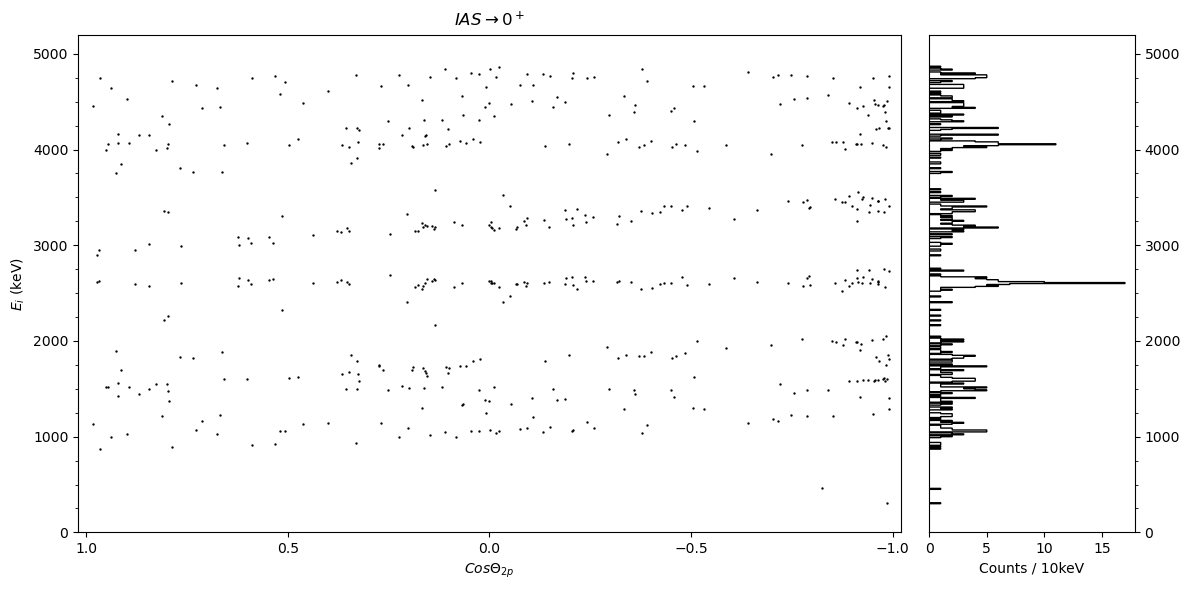

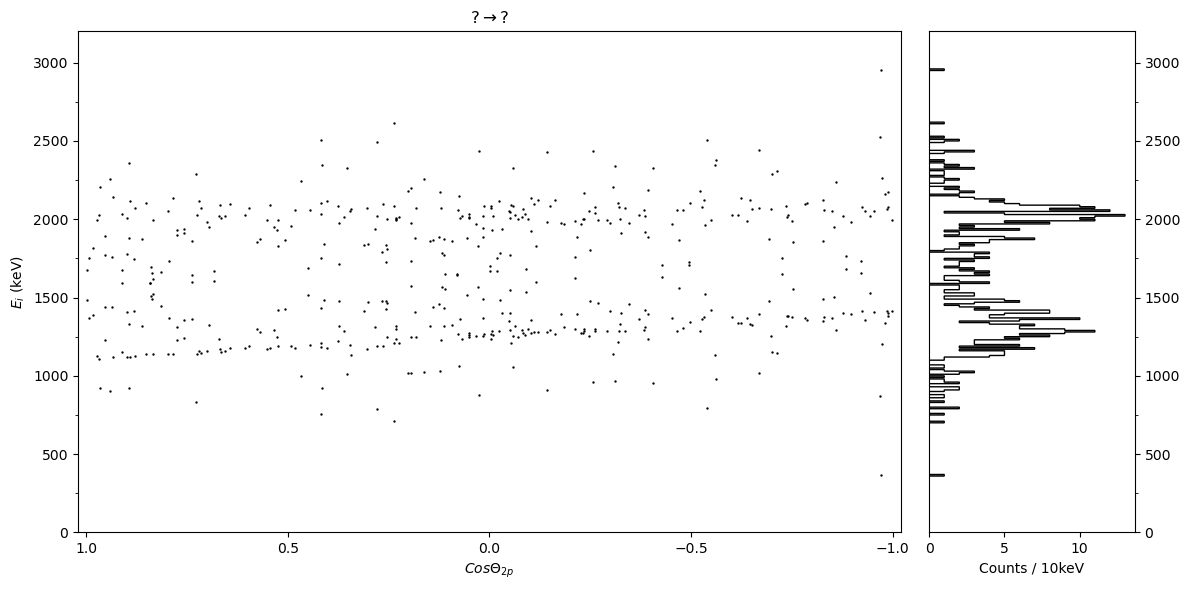

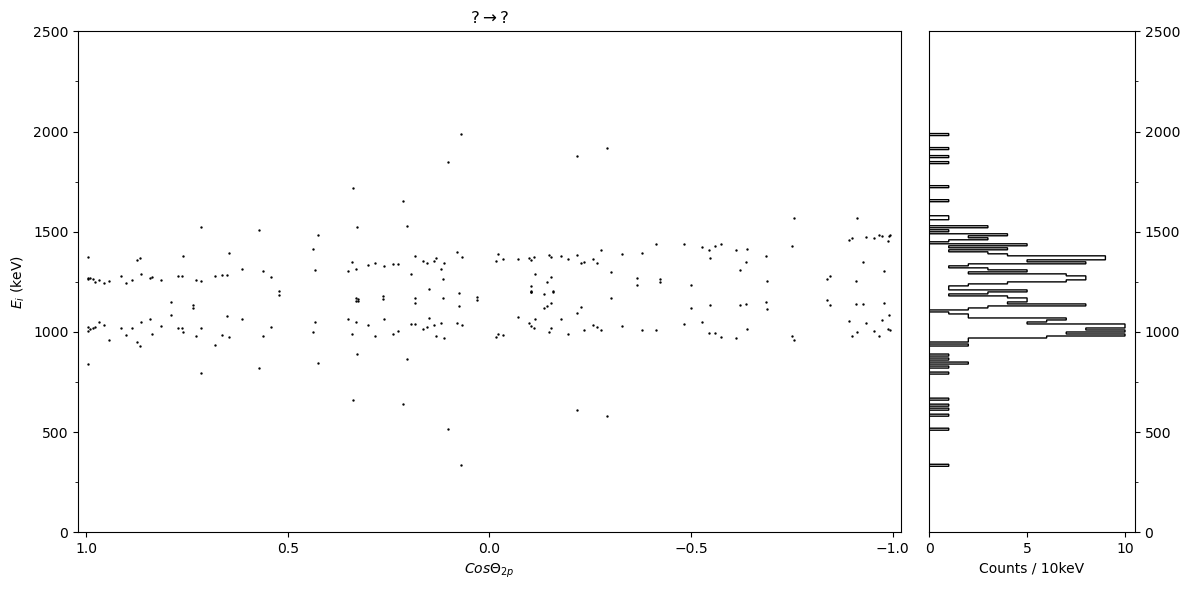

In [7]:
ms = [4000, 5200, 3200, 2500]
lims = [(4350,4580), (6000,6230), (3360,3590), (2400,2600)]
ranges1 = [(1330,1400), (1810,1880), (2210,2260), (2440,2490), (2580,2630), (2690,2760)]
ranges2= [(2530,2670), (4020,4100)]
ranges3 = [(1960,2050), (2050,2140)]
ranges4 = [(950,1050)]


trans = [r"$IAS\rightarrow{2}^+$",r"$IAS\rightarrow{0}^+$",r"$?\rightarrow?$", r"$?\rightarrow?$"]
for l, m,t in zip(lims, ms,trans):
    mask = (Q2p >= l[0]) & (Q2p <= l[1])
    
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(12,6), sharey=True, 
        gridspec_kw={'width_ratios':[4,1]}
    )
    
    # Left: scatter plot
    ax1.scatter(np.cos(np.deg2rad(theta[mask])), E1[mask], color='k', s=0.5)
    ax1.scatter(np.cos(np.deg2rad(theta[mask])), E2[mask], color='k', s=0.5)
    ax1.set_xlabel(r"$Cos\Theta_{2p}$")
    ax1.set_ylabel(r"$E_i$ (keV)")
    ax1.set_title(f"{t}")
    ax1.set_yticks(np.arange(0,m,250), minor=True)
    ax1.set_xticks(np.arange(1,-1.5,-0.5))
    ax1.set_xlim(1.02,-1.02)
    ax1.set_ylim(500, m)
    
    # Right: horizontal histogram with 'step' style
    h1, _ = np.histogram(E1[mask], bins=bins)
    h2, _ = np.histogram(E2[mask], bins=bins)
    ax2.hist(bins[:-1], bins=bins, weights=h1+h2, histtype='step', orientation='horizontal', color='k')
    
    #bins2 = np.arange(950,1050+10,10)
    #h3, _ = np.histogram(E1[mask], bins=bins2)
    #h4, _ = np.histogram(E2[mask], bins=bins2)
    #ax2.hist(bins2[:-1], bins=bins2, weights=h3+h4, histtype='step', orientation='horizontal', color='r')

    ax2.set_xlabel('Counts / 10keV')
    ax2.yaxis.set_ticks_position('right')  # ticks on right side
    ax2.set_yticks(np.arange(0,m, 250), minor=True)
    
    fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
    plt.tight_layout()
    plt.show()


In [8]:
import re

E_excited = []
E_excited_err = []

pattern = re.compile(r"21NA\s+L\s+([\d.]+)\s+([\d.]+)")

with open("Na21_ensdf.txt", "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            E_excited.append(float(match.group(1)))
            E_excited_err.append(float(match.group(2)))

E_excited = np.array(E_excited)
E_excited_err = np.array(E_excited_err)

Erik_Es = np.array([3.52,3.86,4.29,4.46,5.02,5.15,5.37,5.95,6.20,6.47,7.49,8.13,8.31,8.42,8.55,8.8,8.97,9.0,9.8,10.2,10.7])*1e3
Erik_Es_err = np.array([2,1,2,2,1,2,1,2,1,2,2,2,2,2,0,0,1,0,1,0,2])


5815 -> ENSDF: [5815. 5828.]


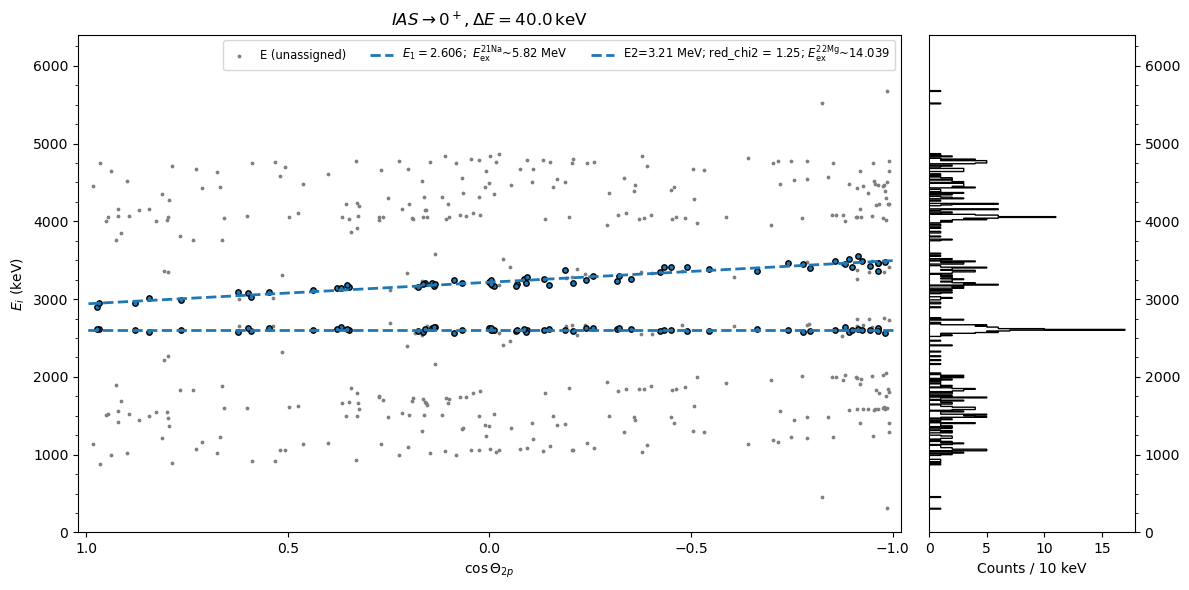

[]
4298 -> ENSDF: [4294.3]
4298 -> Erik: [4290.]


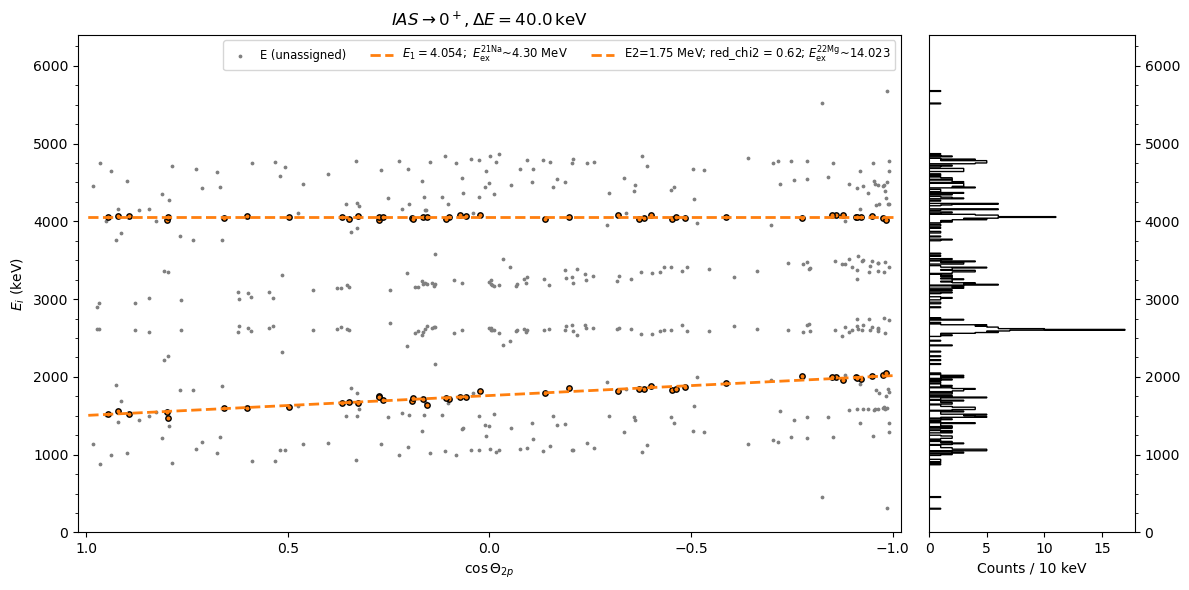

[]
3548 -> ENSDF: [3544.3]
3548 -> Erik: [3520.]


/usr/lib/python3/dist-packages/scipy/optimize/_lsq/trf.py:234: RuntimeWarning: divide by zero encountered in true_divide
  Delta = norm(x0 * scale_inv / v**0.5)
/usr/lib/python3/dist-packages/scipy/optimize/_lsq/trf.py:363: RuntimeWarning: invalid value encountered in double_scalars
  alpha *= Delta / Delta_new


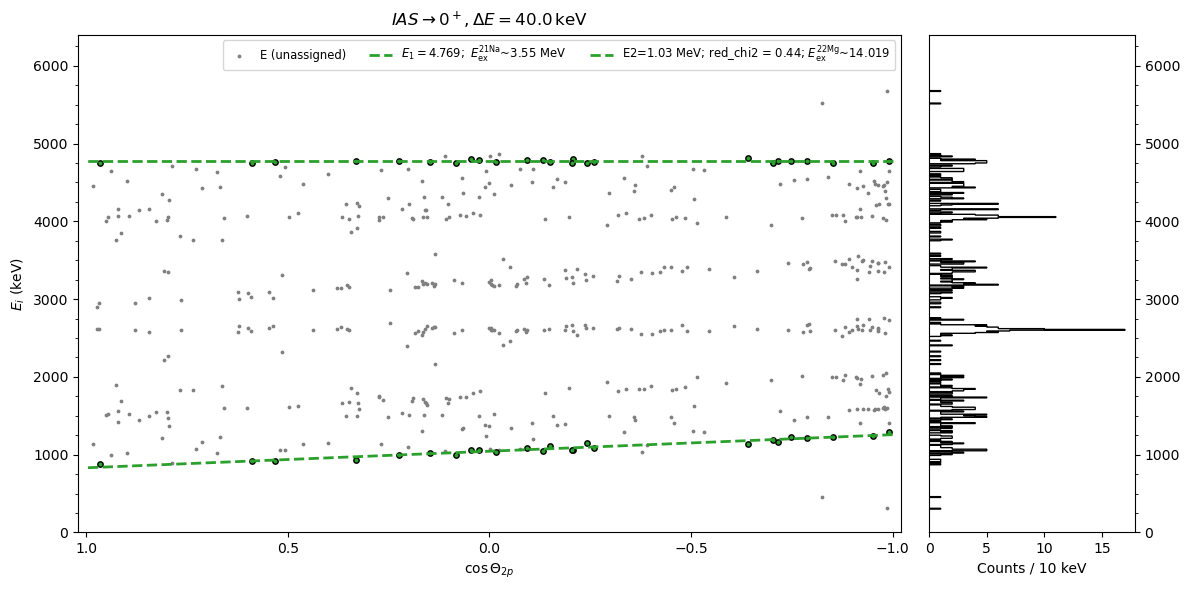

[]
No suitable exctited level was found for 5181


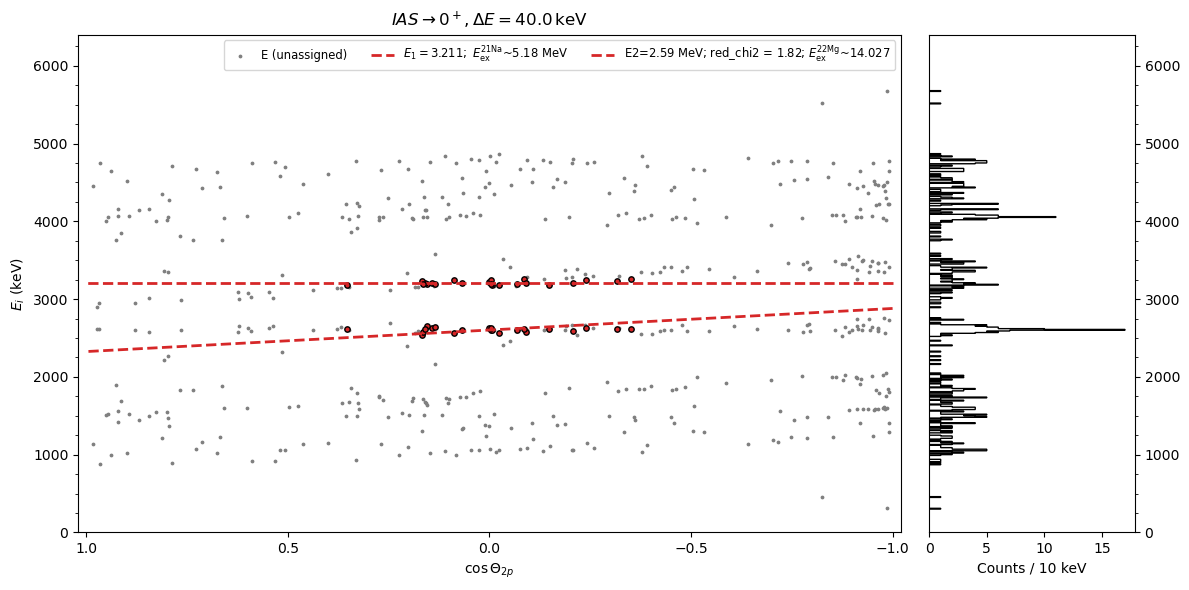

[]
5011 -> ENSDF: [4984. 5020.]
5011 -> Erik: [5020.]


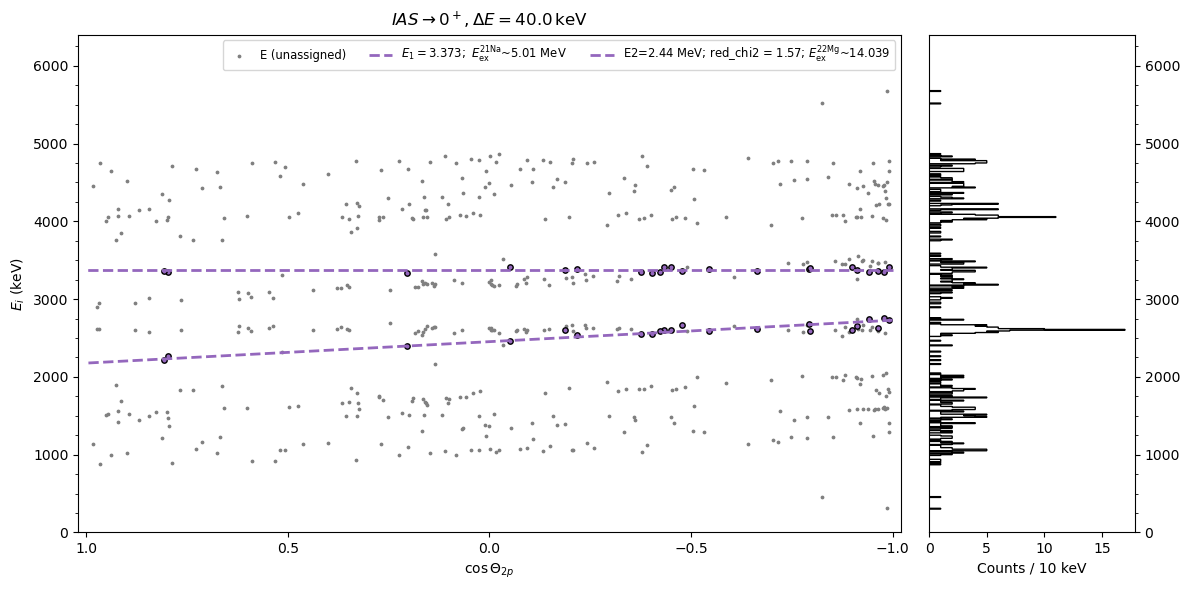

[]
6964 -> ENSDF: [6992.]


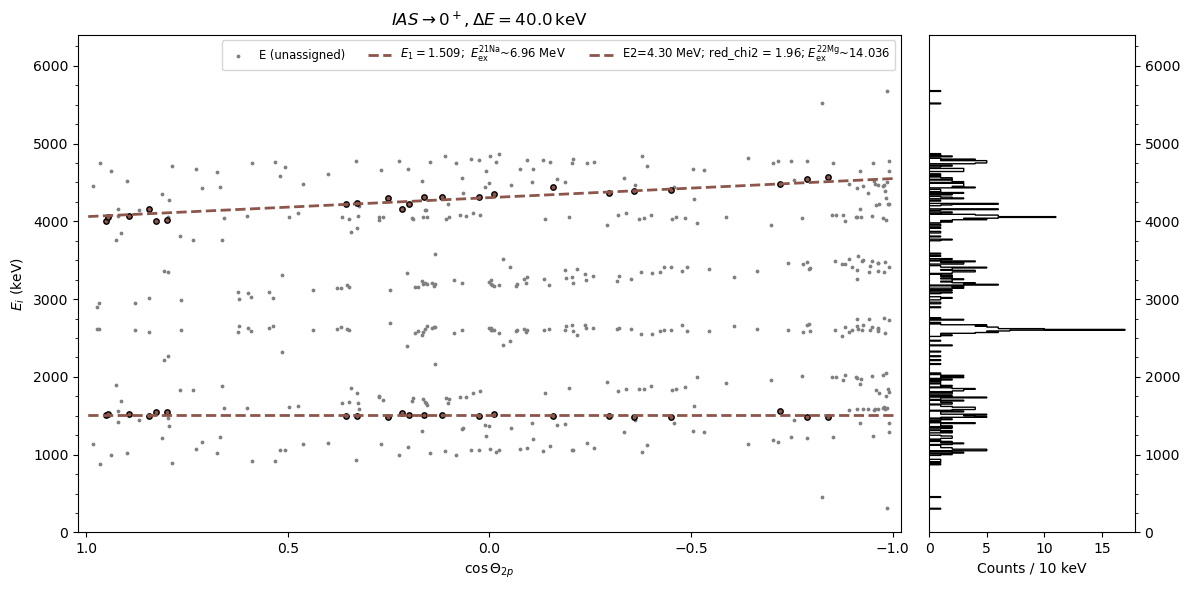

[]
3866 -> ENSDF: [3862.2]
3866 -> Erik: [3860.]


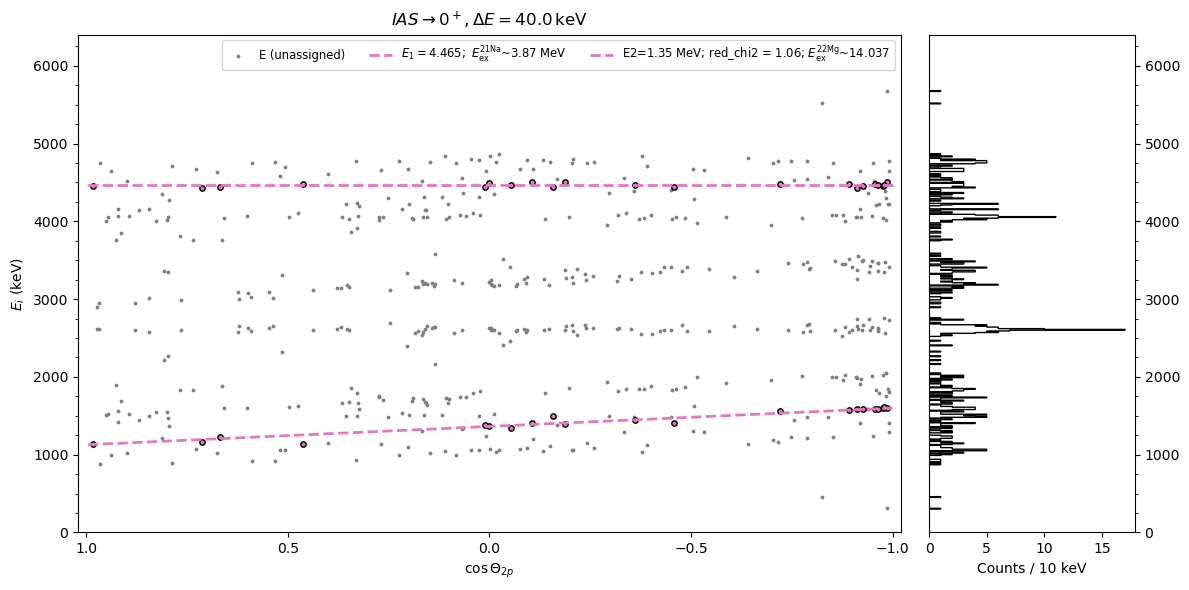

[]
No suitable exctited level was found for 7437


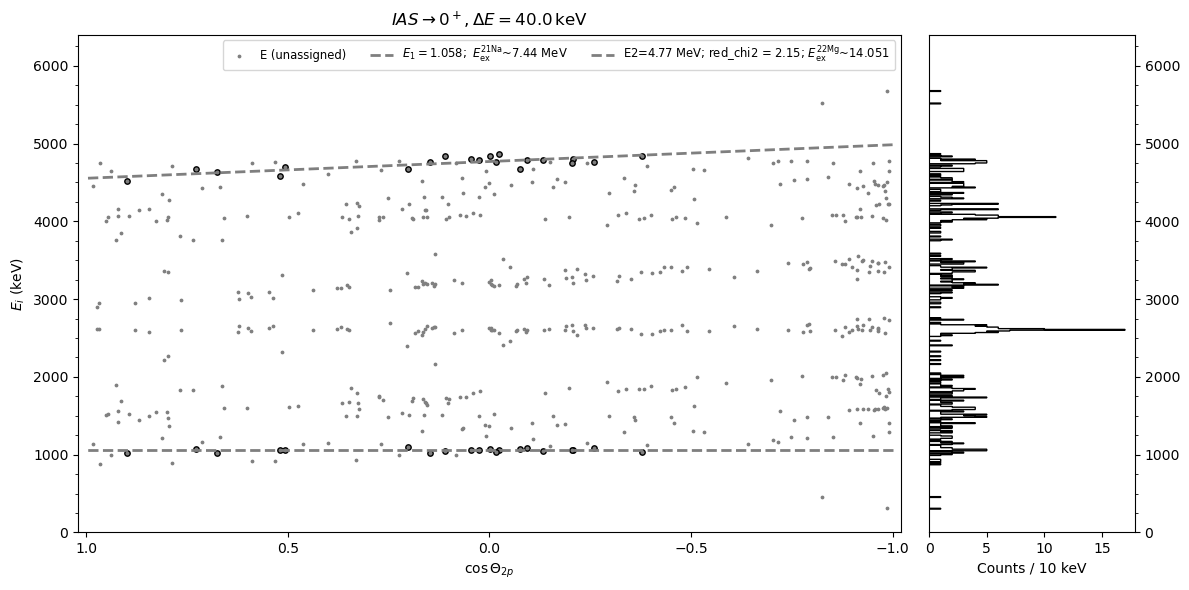

[]
6870 -> ENSDF: [6879.]


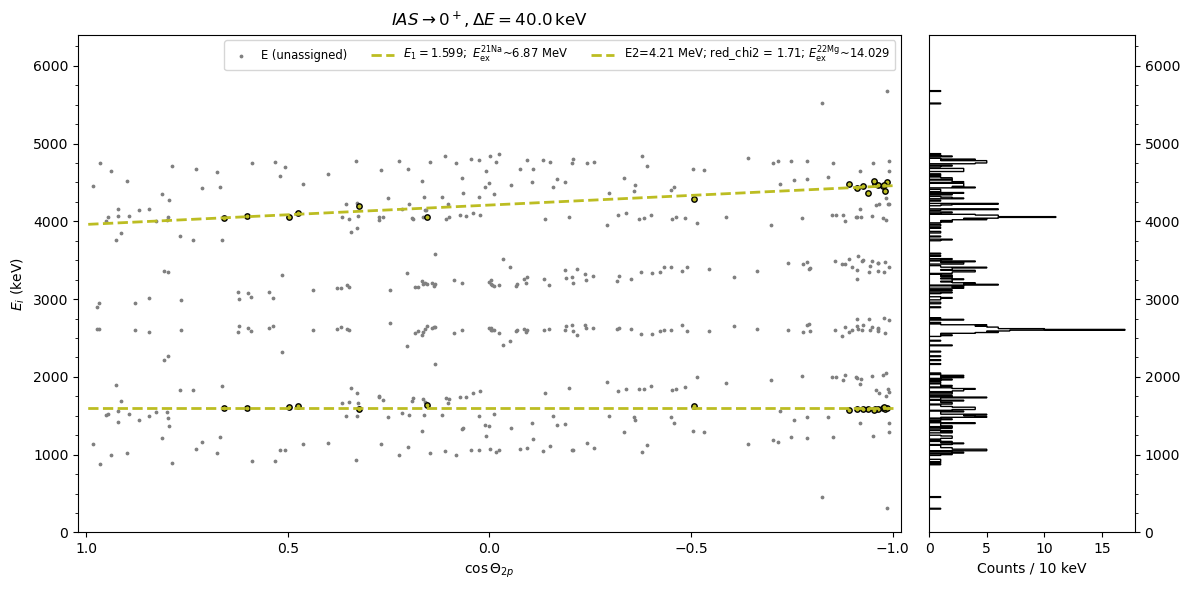

[]
No suitable exctited level was found for 6632


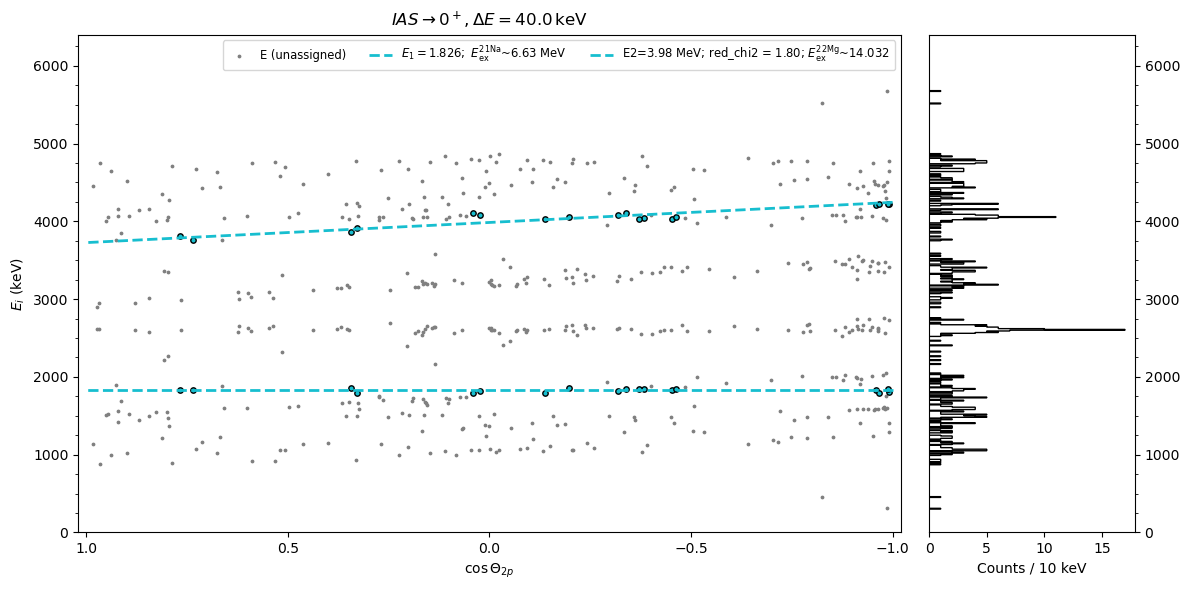

[]
3652 -> ENSDF: [3678.9]


/usr/lib/python3/dist-packages/scipy/optimize/_lsq/trf.py:234: RuntimeWarning: divide by zero encountered in true_divide
  Delta = norm(x0 * scale_inv / v**0.5)
/usr/lib/python3/dist-packages/scipy/optimize/_lsq/trf.py:363: RuntimeWarning: invalid value encountered in double_scalars
  alpha *= Delta / Delta_new


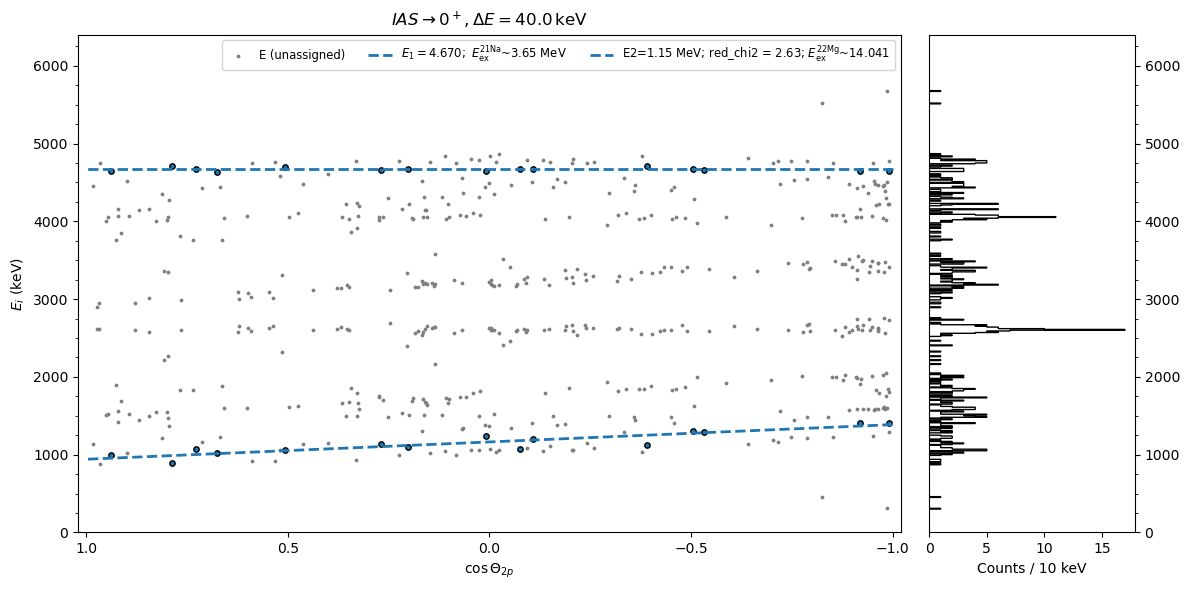

[]
No suitable exctited level was found for 6767


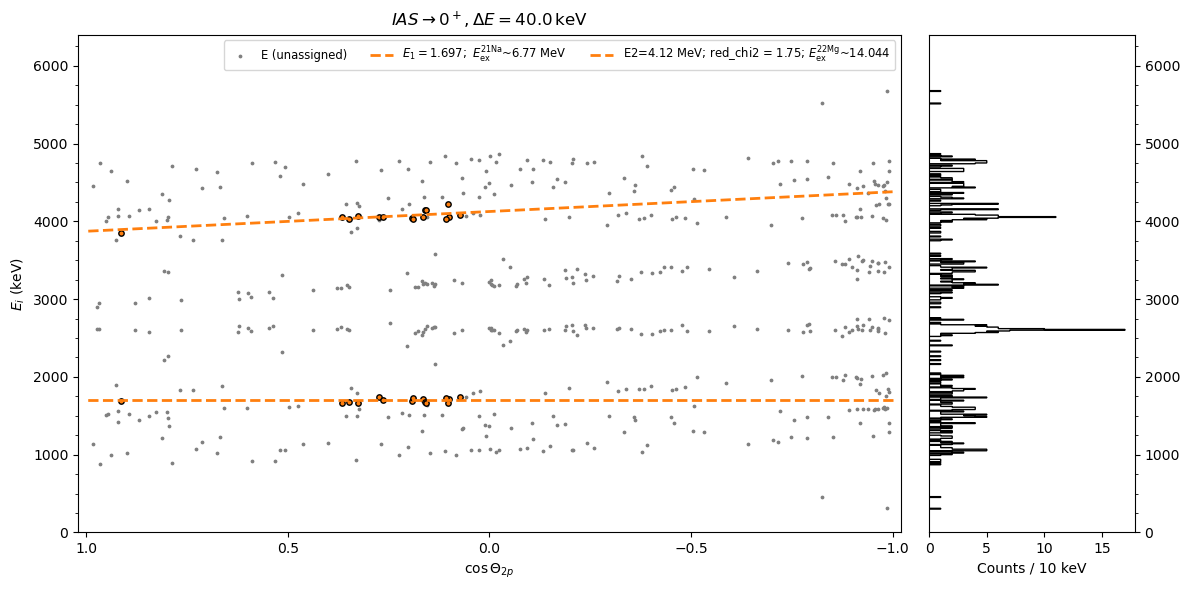

[]
The reduced chi2 values from the fits
[1.249 0.622 0.44  1.817 1.569 1.957 1.064 2.151 1.708 1.8   2.63  1.752]

Peaks identified by previous studies of 21Na(found values)
[5815. 4298. 3548. 5011. 6964. 3866. 6870. 3652.]

Peaks found in Ensdf / Erik ?
[(True, False), (True, True), (True, True), (True, True), (True, False), (True, True), (True, False), (True, False)]

Peaks not found to match any previously found levels in 21Na
[5181. 7437. 6632. 6767.]

E1 energies:
[2606. 4054. 4769. 3211. 3373. 1509. 4465. 1058. 1599. 1826. 4670. 1697.]
Excited state energies of 21Na:
[5815. 4298. 3548. 5181. 5011. 6964. 3866. 7437. 6870. 6632. 3652. 6767.]


In [9]:
####################-----------------------------####################
#####
###
# This plotting tries to find lines with a specified dE(which essentially is the width of the peaks allowed)
# and tolerance(fitted E1 value distance to an already known 21Na level)
# and Nmin which specifies how many points we need in order to define a horizontal band
#
######------> This plotting routine DOES reuse events <------######
#
###
#####
####################-----------------------------####################


def horizontal_line(x, E0):
    return E0 + 0*x

# ---- parameters for horizontal band finder ----
Nmin = 15   # minimum events per band
dE   = 40.0 # keV tolerance

tolerance = 30
potential_excitedstates = []
potential_diffs_ensdf= []
potential_diffs_erik= []
ensdf_erik = []
vals=[]
Ex = []
E1s = []


def find_horizontal_bands(E, Nmin=20, dE=30.0):
    """
    Finds horizontal bands in E with minimum Nmin events.
    Bands with fewer events are ignored.
    """
    E = np.array(E)
    assigned = np.zeros(E.shape[0], dtype=bool)
    bands = []

    while True:
        idx_cands = np.where(~assigned)[0]
        if idx_cands.size == 0:
            break

        idx_try = idx_cands #np.random.choice(idx_cands, size=min(100, idx_cands.size), replace=False)
        best = None
        for idx in idx_try:
            E_cand = E[idx]
            inliers = (~assigned) & (np.abs(E - E_cand) <= dE)
            n = inliers.sum()
            if best is None or n > best[0]:
                best = (n, inliers, E_cand)

        if best[0] >= Nmin:
            inliers = best[1]
            E_center = np.median(E[inliers])
            bands.append((inliers, E_center, best[0]))
            assigned |= inliers
        else:
            break

    return bands, assigned

# ---- your Q2p gate ----
m   = 6400
lim = (6000, 6230)
title = fr"$IAS \rightarrow 0^+, \Delta E={dE} \, \mathrm{{keV}}$"


mask = (Q2p >= lim[0]) & (Q2p <= lim[1])
cos_th = np.cos(np.deg2rad(theta[mask]))
e1 = np.array(E1[mask])
e2 = np.array(E2[mask])
Q2p_mean = lim[0] + (lim[1] - lim[0])/2

# ---- run horizontal band finder on concatenated e1+e2 ----
E_all = np.concatenate([e1, e2])
bands, assigned = find_horizontal_bands(E_all, Nmin=Nmin, dE=dE)
reds = []
identifiable_peaks = []
non_matched_peaks = []
# ---- plot ----
"""
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(12,6), sharey=True,
    gridspec_kw={'width_ratios':[4,1]}
)

# scatter all events in gray
ax1.scatter(cos_th, e1, color='gray', s=3, label='E1 (unassigned)')
ax1.scatter(cos_th, e2, color='lightgray', s=3, label='E2 (unassigned)')

colors = plt.cm.tab10.colors
"""
for j, (inliers, E_center, count) in enumerate(bands):
    fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(12,6), sharey=True,
    gridspec_kw={'width_ratios':[4,1]}
    )

    # scatter all events in gray
    ax1.scatter(cos_th, e1, color='gray', s=3, label='E (unassigned)')
    ax1.scatter(cos_th, e2, color='gray', s=3)

    colors = plt.cm.tab10.colors
    c = colors[j % len(colors)]

    # split mask into e1 and e2
    mask_e1 = inliers[:len(e1)]
    mask_e2 = inliers[len(e1):]

    # plot points
    ax1.scatter(cos_th[mask_e1], e1[mask_e1], s=15, facecolors=c, edgecolors='k')
    ax1.scatter(cos_th[mask_e2], e2[mask_e2], s=15, facecolors=c, edgecolors='k')
    ax1.scatter(cos_th[mask_e2], e1[mask_e2], s=15, facecolors=c, edgecolors='k')
    ax1.scatter(cos_th[mask_e1], e2[mask_e1], s=15, facecolors=c, edgecolors='k')
    # ---- fit a constant to all events in the band ----
    E1_band = np.concatenate([np.array(e1[mask_e1]), np.array(e2[mask_e2])])
    cos1_band = np.concatenate([np.array(cos_th[mask_e1]), np.array(cos_th[mask_e2])])
    
    E2_band = np.concatenate([np.array(e1[mask_e2]), np.array(e2[mask_e1])])
    cos2_band = np.concatenate([np.array(cos_th[mask_e2]), np.array(cos_th[mask_e1])])

    p_opt1, _ = curve_fit(horizontal_line, cos1_band, E1_band)
    E1_fit = p_opt1[0]
    Q1_fit = E1_fit*(mNa + mp)/mNa
    popt2, _ = curve_fit(y2, cos2_band, E2_band, p0=[p_opt1[0], Q2p_mean-Q1_fit], bounds=([E1_fit,0],[E1_fit+1e-12,Q2p_mean]))
    E2_fit = popt2[1]
    Q2_fit = E2_fit*(mNe + mp)/mNe
    E2_min = y2(1, E1_fit, E2_fit)
    E2_max = y2(-1, E1_fit, E2_fit)
    
    mgex = 14050#(S2p+Q1_fit+Q2_fit)
    
    sigma_guess = dE  # or something similar
    residuals = E2_band - y2(cos2_band, *popt2)
    chi2_val = np.sum((residuals / sigma_guess)**2)
    dof = len(E2_band) - len(popt2)
    reduced_chi2 = chi2_val / dof ### chi2~1 -> good fit ; chi2 >> 1 -> poor fit ; chi2 << 1 -> overfitting data

    # plot the fitted horizontal line
    x_plot = np.linspace(-1, 1, 200)
    ax1.plot(x_plot, horizontal_line(x_plot, E1_fit), color=c, linestyle='--', linewidth=2,
             label=rf"$E_{1}={E1_fit/1e3:.3f}; \ E_{{\mathrm{{ex}}}}^{{{21}\mathrm{{Na}}}}$~{(mgex-S1p-E1_fit/frac)/1e3:.2f} MeV")
    ax1.plot(x_plot, y2(x_plot, *popt2), color=c, linestyle='--', linewidth=2,
             label=rf"E2={popt2[1]/1e3:.2f} MeV; red_chi2 = {reduced_chi2:.2f}; $E_{{\mathrm{{ex}}}}^{{{22}\mathrm{{Mg}}}}$~{(S2p+Q1_fit+Q2_fit)/1e3:.3f}")#Q1~{E_fit/frac:.0f} keV")

    E1s.append(E1_fit)
    Ex.append(mgex-S1p-E1_fit/frac)
    
    potential_excitedstates.append((mgex-S1p-E1_fit/frac)/1e3)

    diff_ensdf = (E_excited-(mgex-S1p-E1_fit/frac))
    diff_erik = (Erik_Es- (mgex-S1p-E1_fit/frac))    
    
    match_ensdf_exists = np.any(np.abs(diff_ensdf) <= tolerance)
    match_erik_exists = np.any(np.abs(diff_erik) <= tolerance)

    # Print ENSDF matches if they exist
    match_erik = np.NaN
    match_ensdf = np.NaN
    if match_ensdf_exists:
        match_ensdf = E_excited[np.abs(diff_ensdf) <= tolerance]
        print(f"{(mgex-S1p-E1_fit/frac):.0f} -> ENSDF: {match_ensdf}")

    # Print Erik matches if they exist
    if match_erik_exists:
        match_erik = Erik_Es[np.abs(diff_erik) <= tolerance]
        print(f"{(mgex-S1p-E1_fit/frac):.0f} -> Erik: {match_erik}")
        

    if match_ensdf_exists or match_erik_exists:
        identifiable_peaks.append((mgex-S1p-E1_fit/frac))
        ensdf_erik.append((match_ensdf_exists,match_erik_exists))
        vals.append((match_ensdf, match_erik))
        
    if not match_erik_exists and not match_ensdf_exists:
        print(f"No suitable exctited level was found for {(mgex-S1p-E1_fit/frac):.0f}")
        non_matched_peaks.append(mgex-S1p-E1_fit/frac)
        
    # ---- finalize plot ----
    ax1.set_xlabel(r"$\cos\Theta_{2p}$")
    ax1.set_ylabel(r"$E_i$ (keV)")
    ax1.set_title(title)
    ax1.set_ylim(500, m)
    ax1.set_yticks(np.arange(0, m, 250), minor=True)
    ax1.set_xticks(np.arange(1,-1.5,-0.5))
    ax1.set_xlim(1.02,-1.02)
    ax1.legend(fontsize='small', ncol=5)
    reds.append(reduced_chi2)

    # ---- histogram ----
    bins = np.arange(0, 7000+10, 10)
    h1, _ = np.histogram(e1, bins=bins)
    h2, _ = np.histogram(e2, bins=bins)
    ax2.hist(bins[:-1], bins=bins, weights=h1+h2, histtype='step',
            orientation='horizontal', color='k')

    ax2.set_xlabel('Counts / 10 keV')
    ax2.yaxis.set_ticks_position('right')
    ax2.set_yticks(np.arange(0, m, 250), minor=True)

    fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
    plt.tight_layout()
    plt.show()
    print(potential_diffs_ensdf)

#plt.hist(potential_diffs_ensdf, bins=np.arange(-10,40+5,5), histtype='step')
#plt.hist(potential_diffs_erik, bins=np.arange(-10,40+5,5), histtype='step')
print("The reduced chi2 values from the fits")
print(np.round(reds,3))
print()
print("Peaks identified by previous studies of 21Na(found values)")
print(np.round(identifiable_peaks,0))
print()
print("Peaks found in Ensdf / Erik ?")
print(ensdf_erik)
print()
print("Peaks not found to match any previously found levels in 21Na")
print(np.round(non_matched_peaks,0))
print()
print("E1 energies:")
print(np.round(E1s,0))
print("Excited state energies of 21Na:")
print(np.round(Ex,0))

5815 -> ENSDF: [5815. 5828.]


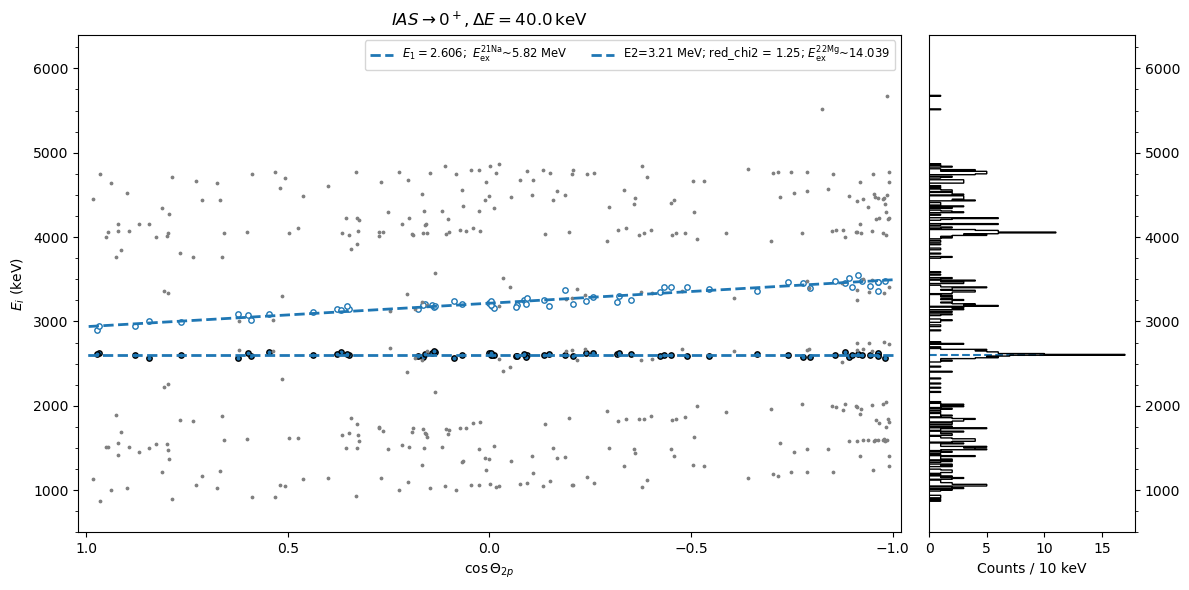

4298 -> ENSDF: [4294.3]
4298 -> Erik: [4290.]


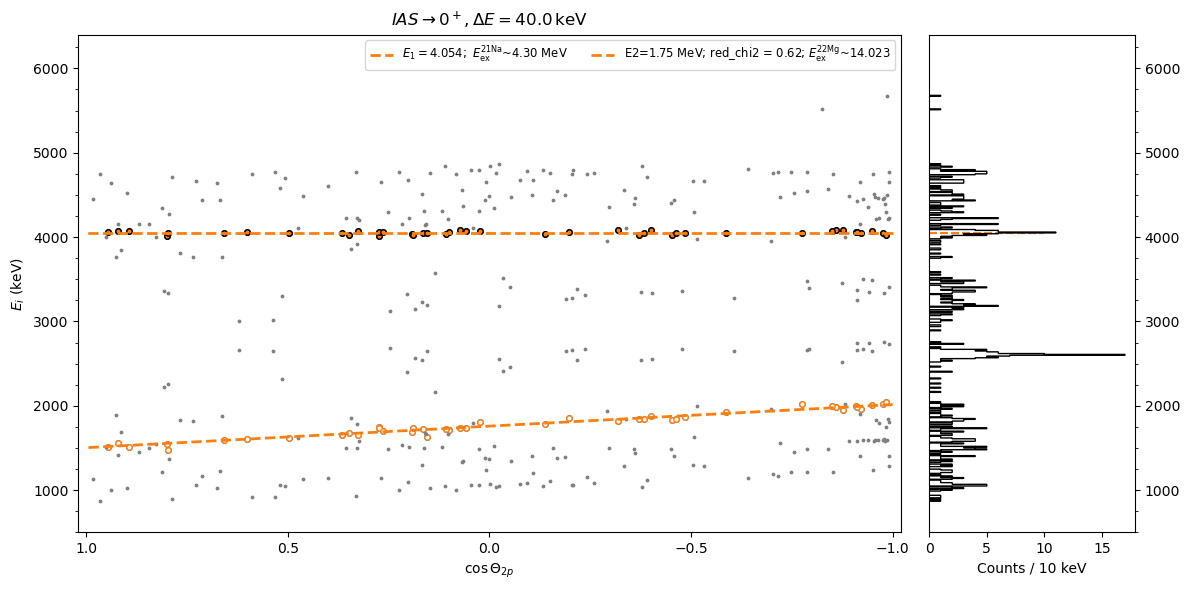

/usr/lib/python3/dist-packages/scipy/optimize/_lsq/trf.py:234: RuntimeWarning: divide by zero encountered in true_divide
  Delta = norm(x0 * scale_inv / v**0.5)
/usr/lib/python3/dist-packages/scipy/optimize/_lsq/trf.py:363: RuntimeWarning: invalid value encountered in double_scalars
  alpha *= Delta / Delta_new


3548 -> ENSDF: [3544.3]
3548 -> Erik: [3520.]


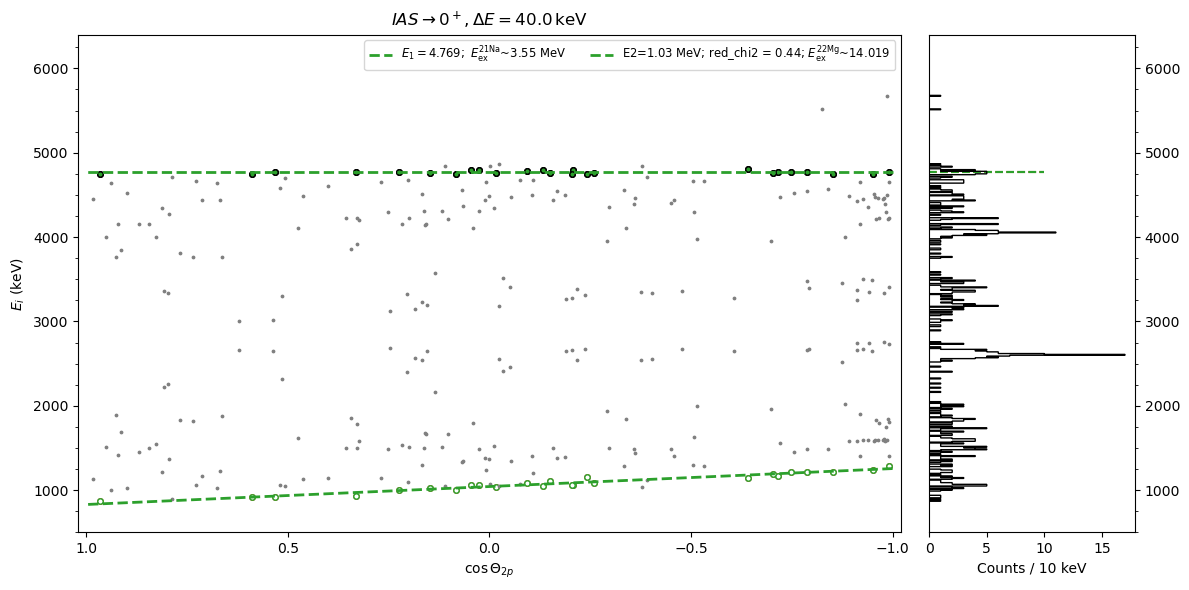

3866 -> ENSDF: [3862.2]
3866 -> Erik: [3860.]


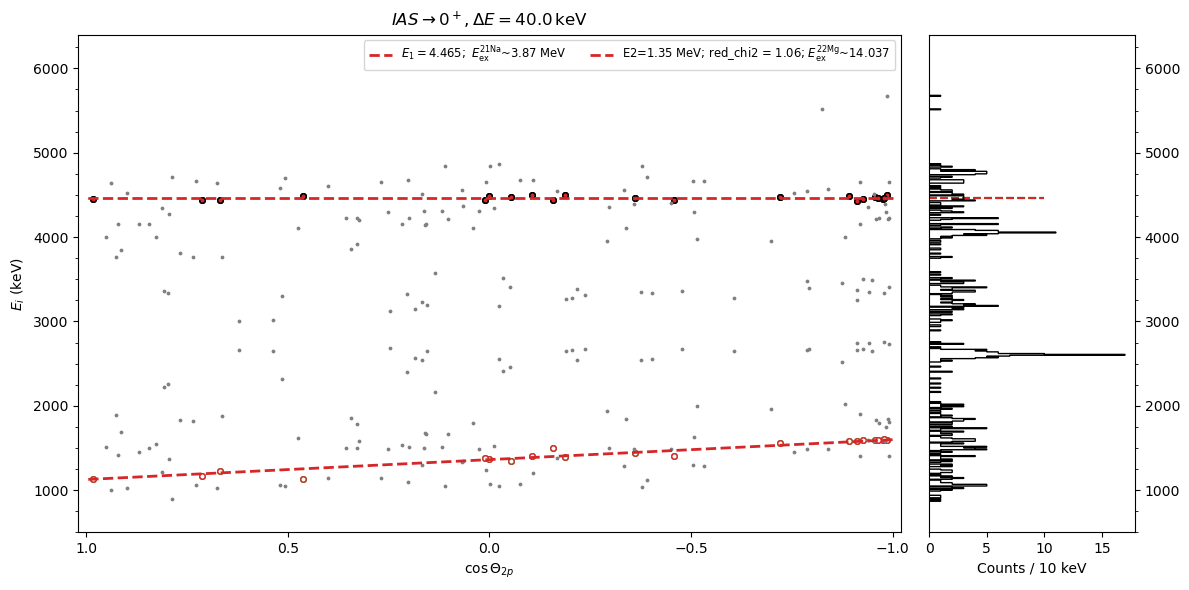

6970 -> ENSDF: [6992.]


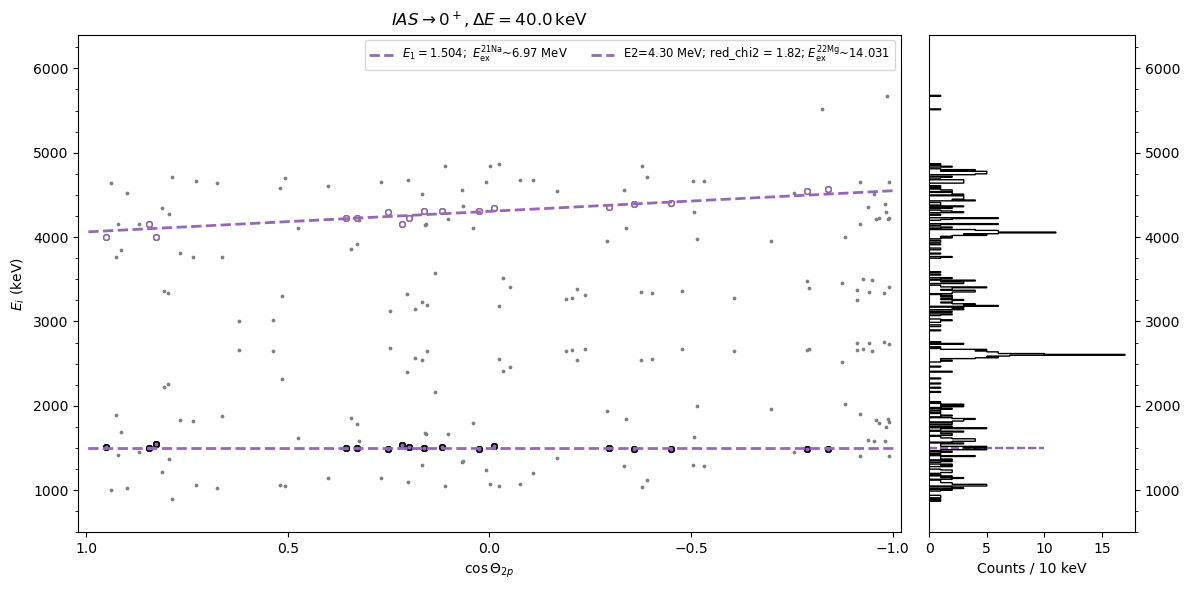

/usr/lib/python3/dist-packages/scipy/optimize/_lsq/trf.py:234: RuntimeWarning: divide by zero encountered in true_divide
  Delta = norm(x0 * scale_inv / v**0.5)
/usr/lib/python3/dist-packages/scipy/optimize/_lsq/trf.py:363: RuntimeWarning: invalid value encountered in double_scalars
  alpha *= Delta / Delta_new


3652 -> ENSDF: [3678.9]


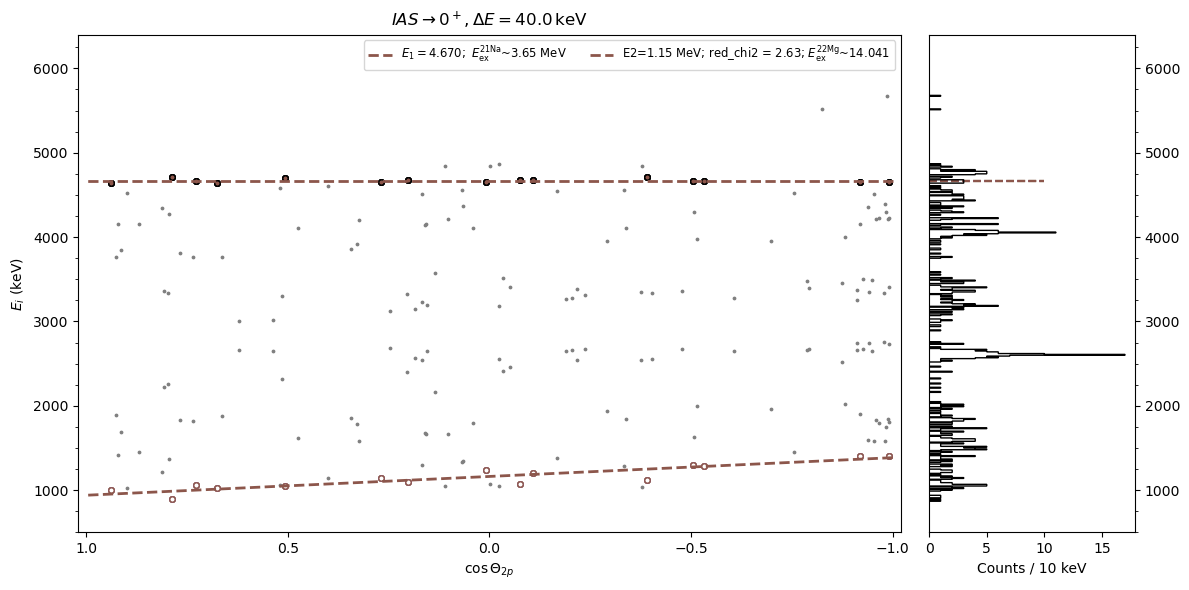

5756 -> ENSDF: [5770.]


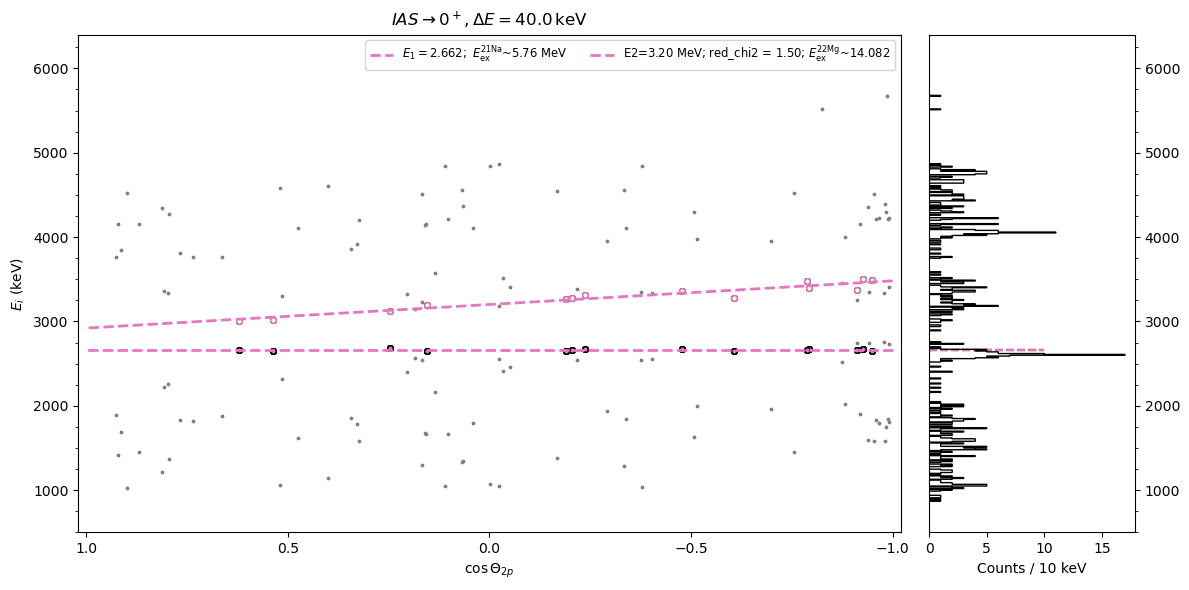

No suitable exctited level was found for 6635


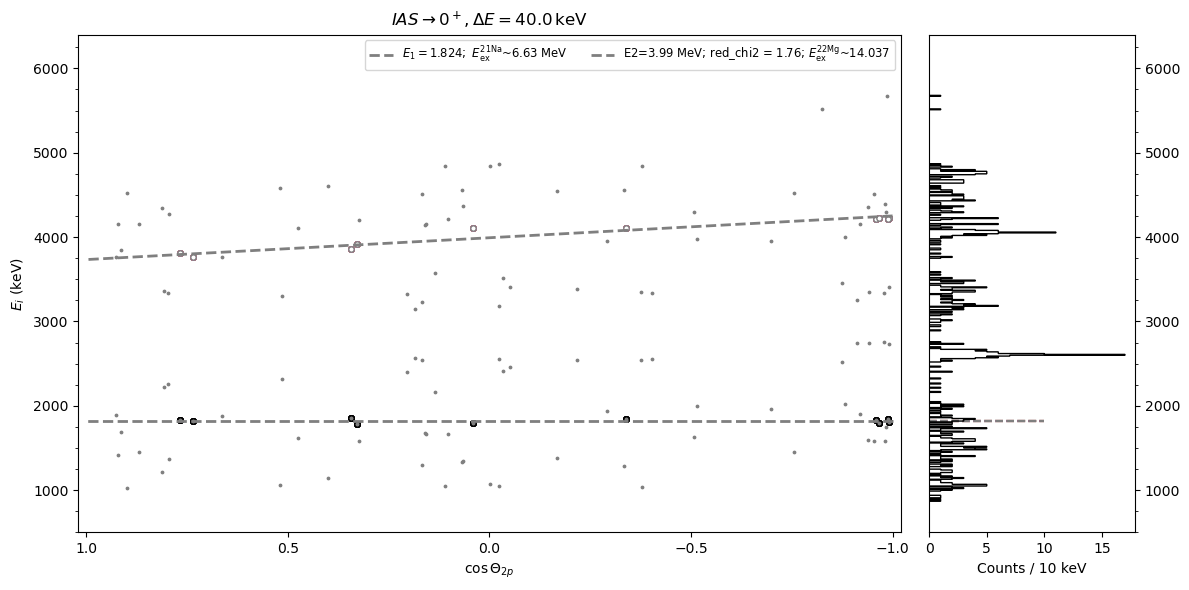

The reduced chi2 values from the fits
[1.249 0.622 0.44  1.064 1.815 2.63  1.497 1.759]

Peaks identified by previous studies of 21Na(found values)
[5815. 4298. 3548. 3866. 6970. 3652. 5756.]

Peaks found in Ensdf / Erik ?
[(True, False), (True, True), (True, True), (True, True), (True, False), (True, False), (True, False)]

Peaks not found to match any previously found levels in 21Na
[6635.]

E1 energies:
[2606. 4054. 4769. 4465. 1504. 4670. 2662. 1824.]
Excited state energies of 21Na:
[5815. 4298. 3548. 3866. 6970. 3652. 5756. 6635.]


In [10]:
####################-----------------------------####################
#####
###
# This plotting tries to find lines with a specified dE(which essentially is the width of the peaks allowed)
# and tolerance(fitted E1 value distance to an already known 21Na level)
# and Nmin which specifies how many points we need in order to define a horizontal band
#
######------> This plotting routine does NOT reuse events <------######
#
###
#####
####################-----------------------------####################

# ---- constant fit function ----
def horizontal_line(x, E0):
    return E0 + 0*x

# ---- parameters for horizontal band finder ----
Nmin = 10   # minimum events per band
dE   = 40.0 # keV tolerance
tolerance = 30

potential_excitedstates = []
potential_diffs_ensdf= []
potential_diffs_erik= []
ensdf_erik = []
vals=[]
reds = []
identifiable_peaks = []
non_matched_peaks = []
e1bands, e2bands, cos1bands, cos2bands = [], [], [], []
Ex, E1s = [], []

# ---- Q2p gate ----
m   = 6400
lim = (6000, 6230)
title = fr"$IAS \rightarrow 0^+, \Delta E={dE} \, \mathrm{{keV}}$"

mask = (Q2p >= lim[0]) & (Q2p <= lim[1])
cos_th = np.cos(np.deg2rad(theta[mask]))
e1 = np.array(E1[mask])
e2 = np.array(E2[mask])
Q2p_mean = lim[0] + (lim[1] - lim[0])/2

N = len(e1)
if len(e2) != N:
    raise ValueError("e1 and e2 must have the same length (one entry per event).")

# ---- iterative band finder with strict event exclusion ----
unassigned = np.ones(N, dtype=bool)   # events available for band finding
event_band_idx = np.full(N, -1)       # store which band each event belongs to (-1 = unassigned)
bands = []
band_index = 0

colors = plt.cm.tab10.colors

while True:
    # candidate energies from unassigned events
    cand_e1 = e1[unassigned]
    cand_e2 = e2[unassigned]
    if cand_e1.size + cand_e2.size == 0:
        break

    candidates = np.concatenate([cand_e1, cand_e2])
    best = None  # (count, Ecand, inlier_events_mask)

    # find the candidate that produces the most events
    for Ecand in candidates:
        mask_e1_close = (np.abs(e1 - Ecand) <= dE)
        mask_e2_close = (np.abs(e2 - Ecand) <= dE)
        inlier_events = (mask_e1_close | mask_e2_close) & unassigned
        n = inlier_events.sum()
        if best is None or n > best[0]:
            best = (n, Ecand, inlier_events)

    if best is None or best[0] < Nmin:
        break  # no more acceptable bands

    count, Ecand_best, inlier_events = best
    # mark these events as belonging to this band
    event_band_idx[inlier_events] = band_index
    bands.append((inlier_events, Ecand_best, count))

    # split mask into e1 and e2 (same as your original logic)
    mask_e1 = (np.abs(e1 - Ecand_best) <= dE) & unassigned
    mask_e2 = (np.abs(e2 - Ecand_best) <= dE) & unassigned

    # ---- build arrays for fitting ----
    E1_band = np.concatenate([np.array(e1[mask_e1]), np.array(e2[mask_e2])])
    cos1_band = np.concatenate([np.array(cos_th[mask_e1]), np.array(cos_th[mask_e2])])

    E2_band = np.concatenate([np.array(e1[mask_e2]), np.array(e2[mask_e1])])
    cos2_band = np.concatenate([np.array(cos_th[mask_e2]), np.array(cos_th[mask_e1])])

    # ---- fit horizontal line to E1_band ----
    p_opt1, _ = curve_fit(horizontal_line, cos1_band, E1_band)
    E1_fit = p_opt1[0]
    Q1_fit = E1_fit*(mNa + mp)/mNa

    # ---- fit y2 as in your original script ----
    popt2, _ = curve_fit(y2, cos2_band, E2_band, p0=[p_opt1[0], Q2p_mean-Q1_fit],
                         bounds=([E1_fit,0],[E1_fit+1e-12,Q2p_mean]))
    E2_fit = popt2[1]
    Q2_fit = E2_fit*(mNe + mp)/mNe
    E2_min = y2(1, E1_fit, E2_fit)
    E2_max = y2(-1, E1_fit, E2_fit)

    mgex = 14050  # (S2p+Q1_fit+Q2_fit)
    sigma_guess = dE
    residuals = E2_band - y2(cos2_band, *popt2)
    dof = max(1, len(E2_band)-len(popt2))
    reduced_chi2 = np.sum((residuals/sigma_guess)**2)/dof
    reds.append(reduced_chi2)

    potential_excitedstates.append((mgex-S1p-E1_fit/frac)/1e3)

    diff_ensdf = (E_excited-(mgex-S1p-E1_fit/frac))
    diff_erik = (Erik_Es- (mgex-S1p-E1_fit/frac))

    match_ensdf_exists = np.any(np.abs(diff_ensdf) <= tolerance)
    match_erik_exists = np.any(np.abs(diff_erik) <= tolerance)

    match_erik = np.NaN
    match_ensdf = np.NaN
    if match_ensdf_exists:
        match_ensdf = E_excited[np.abs(diff_ensdf) <= tolerance]
        print(f"{(mgex-S1p-E1_fit/frac):.0f} -> ENSDF: {match_ensdf}")
    if match_erik_exists:
        match_erik = Erik_Es[np.abs(diff_erik) <= tolerance]
        print(f"{(mgex-S1p-E1_fit/frac):.0f} -> Erik: {match_erik}")

    if match_ensdf_exists or match_erik_exists:
        identifiable_peaks.append((mgex-S1p-E1_fit/frac))
        ensdf_erik.append((match_ensdf_exists,match_erik_exists))
        vals.append((match_ensdf, match_erik))
    if not match_erik_exists and not match_ensdf_exists:
        print(f"No suitable exctited level was found for {(mgex-S1p-E1_fit/frac):.0f}")
        non_matched_peaks.append(mgex-S1p-E1_fit/frac)

    # ---- plotting ----
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(12,6), sharey=True,
        gridspec_kw={'width_ratios':[4,1]}
    )
    e1bands.append(E1_band)
    e2bands.append(E2_band)
    cos1bands.append(cos1_band)
    cos2bands.append(cos2_band)
    # plot already assigned events in their colors
    cols = []
    for b_idx in range(band_index+1):
        cols.append(colors[b_idx % len(colors)])
        color = colors[b_idx % len(colors)]
        ax1.scatter(cos1_band, E1_band, s=15, facecolors=color, edgecolors='k')
        ax1.scatter(cos2_band, E2_band, s=15, facecolors='white', edgecolors=color)
        ax2.hlines(E1_fit, 0,10,color, ls='--')

    
    
    #if match_ensdf_exists or match_erik_exists:
        #for a,b,x1,x2,c in zip(e1bands,e2bands,cos1bands,cos2bands,cols):
        #    ax1.scatter(x1, a, s=15, facecolors=c, edgecolors='k')
        #    ax1.scatter(x2, b, s=15, facecolors='white', edgecolors=c)

    # plot unassigned events in gray
    mask_unassigned = (event_band_idx == -1)
    ax1.scatter(cos_th[mask_unassigned], e1[mask_unassigned], color='gray', s=3)
    ax1.scatter(cos_th[mask_unassigned], e2[mask_unassigned], color='gray', s=3)

    # plot fitted lines
    x_plot = np.linspace(-1, 1, 200)
    ax1.plot(x_plot, horizontal_line(x_plot, E1_fit), color=colors[band_index % len(colors)],
             linestyle='--', linewidth=2, label=rf"$E_{1}={E1_fit/1e3:.3f}; \ E_{{\mathrm{{ex}}}}^{{{21}\mathrm{{Na}}}}$~{(mgex-S1p-E1_fit/frac)/1e3:.2f} MeV")
    ax1.plot(x_plot, y2(x_plot, *popt2), color=colors[band_index % len(colors)],
             linestyle='--', linewidth=2, 
             label=rf"E2={popt2[1]/1e3:.2f} MeV; red_chi2 = {reduced_chi2:.2f}; $E_{{\mathrm{{ex}}}}^{{{22}\mathrm{{Mg}}}}$~{(S2p+Q1_fit+Q2_fit)/1e3:.3f}")

    Ex.append(mgex-S1p-E1_fit/frac)
    E1s.append(E1_fit)

    ax1.set_xlabel(r"$\cos\Theta_{2p}$")
    ax1.set_ylabel(r"$E_i$ (keV)")
    ax1.set_title(title)
    ax1.set_yticks(np.arange(0, m, 250), minor=True)
    ax1.set_xticks(np.arange(1,-1.5,-0.5))
    ax1.set_xlim(1.02,-1.02)
    ax1.legend(fontsize='small', ncol=5)

    # ---- histogram ----
    bins = np.arange(0, 7000+10, 10)
    h1, _ = np.histogram(e1, bins=bins)
    h2, _ = np.histogram(e2, bins=bins)
    ax2.hist(bins[:-1], bins=bins, weights=h1+h2, histtype='step',
            orientation='horizontal', color='k')
    ax2.set_xlabel('Counts / 10 keV')
    ax2.yaxis.set_ticks_position('right')
    ax2.set_yticks(np.arange(0, m, 250), minor=True)
    ax1.set_ylim(500,m)

    fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
    plt.tight_layout()
    plt.show()

    # ---- exclude events used in this band for next iteration ----
    unassigned[inlier_events] = False
    band_index += 1

# ---- final summary printouts ----
print("The reduced chi2 values from the fits")
print(np.round(reds,3))
print()
print("Peaks identified by previous studies of 21Na(found values)")
print(np.round(identifiable_peaks,0))
print()
print("Peaks found in Ensdf / Erik ?")
print(ensdf_erik)
print()
print("Peaks not found to match any previously found levels in 21Na")
print(np.round(non_matched_peaks,0))
print()
print("E1 energies:")
print(np.round(E1s,0))
print("Excited state energies of 21Na:")
print(np.round(Ex,0))


resuing events:  [3548. 3652. 3866. 4298. 5011. 5815. 6870. 6964.]
Not reusing events:  [3548. 3652. 3866. 4298. 5756. 5815. 6970.]


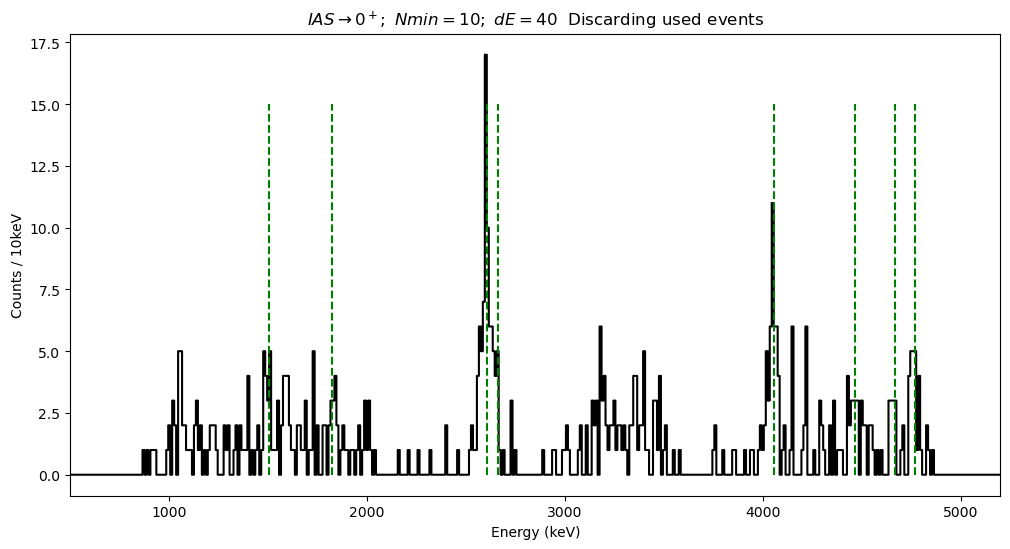

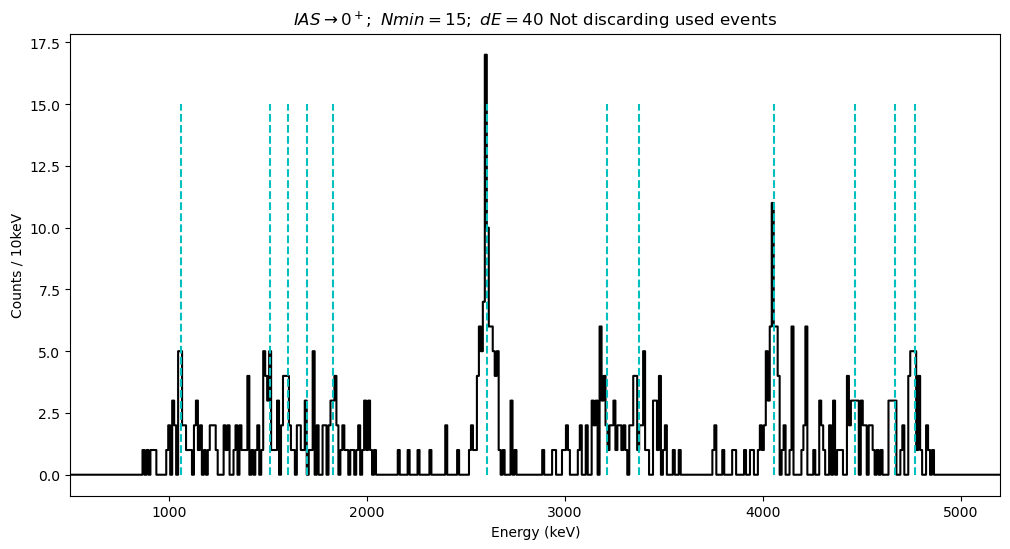

In [27]:
plt.figure(figsize=(12,6))
lims = (6000,6230)
mask = (Q2p >= lims[0]) & (Q2p <= lims[1])
h1, _ = np.histogram(np.array(E1)[mask], bins=bins)
h2, _ = np.histogram(np.array(E2)[mask], bins=bins)
plt.step(bins[:-1], h1+h2, where='mid', color='k')
#"""

nareuse = [5815., 4298., 3548. ,5011. ,6964. ,3866. ,6870., 3652.]
nanoreuse = [5815. ,4298. ,3548., 3866., 6970., 3652., 5756.]

ener = [2606., 4054., 4769., 4465., 1504., 4670., 2662., 1824.] #[2616., 4050., 4777., 4474. ,1497. ,4670., 3349. ,1824.]

ener2 = [2606., 4054., 4769., 3211., 3373., 1509. ,4465. ,1058. ,1599., 1826., 4670. ,1697.]#[2616. ,4050., 4777., 3210. ,4474. ,1557., 3372. ,1060. ,1831., 1465., 1700., 4670., 4194.]#[2606., 4054. ,4769. ,3211. ,3373. ,1509., 4465. ,1058.]

for e in ener:
    plt.vlines(e, 0,15, ls='--', color='g')
plt.xlim(500,5200)
plt.xlabel("Energy (keV)")
plt.ylabel("Counts / 10keV")
plt.title(r"$IAS\rightarrow 0^+; \ Nmin=10; \ dE=40$  Discarding used events")
plt.figure(figsize=(12,6))
lims = (6000,6230)
mask = (Q2p >= lims[0]) & (Q2p <= lims[1])
h1, _ = np.histogram(np.array(E1)[mask], bins=bins)
h2, _ = np.histogram(np.array(E2)[mask], bins=bins)
plt.step(bins[:-1], h1+h2, where='mid', color='k')
for ee in ener2:
    plt.vlines(ee, 0,15, ls='--', color='c')
plt.xlim(500,5200)
plt.xlabel("Energy (keV)")
plt.ylabel("Counts / 10keV")
plt.title(r"$IAS\rightarrow 0^+; \ Nmin=15; \ dE=40$ Not discarding used events")

print("resuing events: ", np.sort(nareuse))
print("Not reusing events: ",np.sort(nanoreuse))

No suitable exctited level was found for 6606


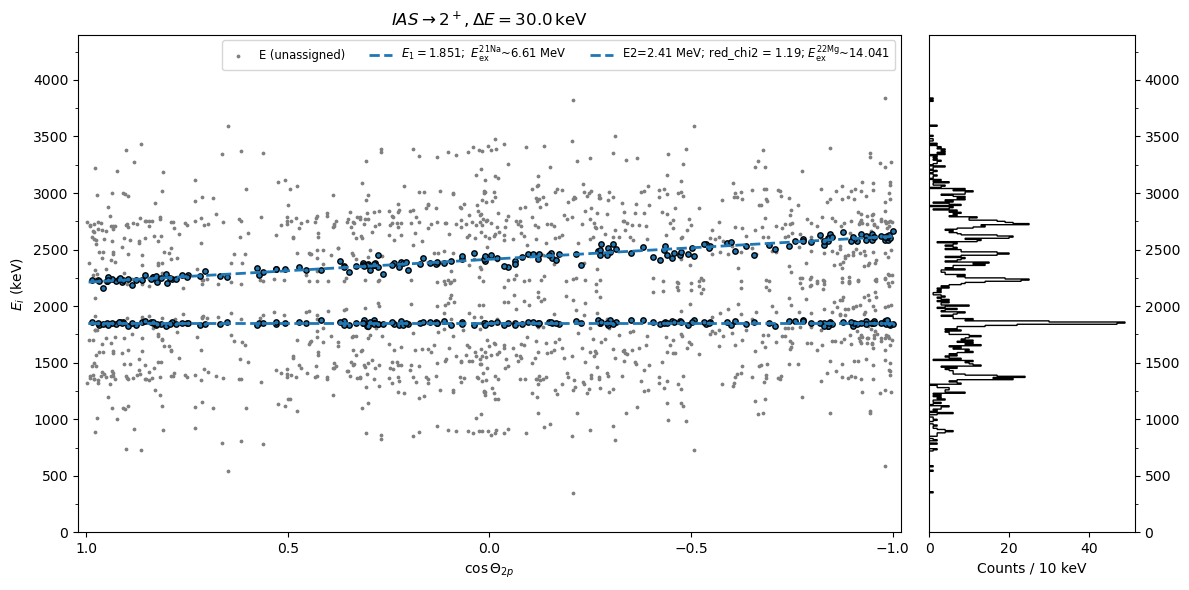

[]
No suitable exctited level was found for 5687


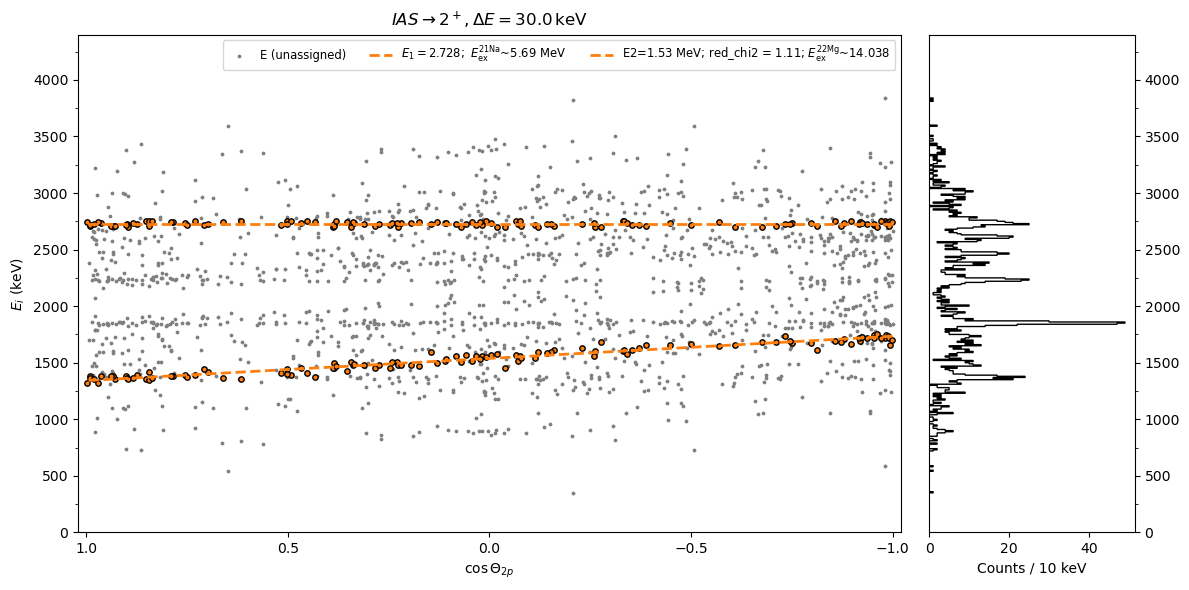

[]
6213 -> Erik: [6200.]


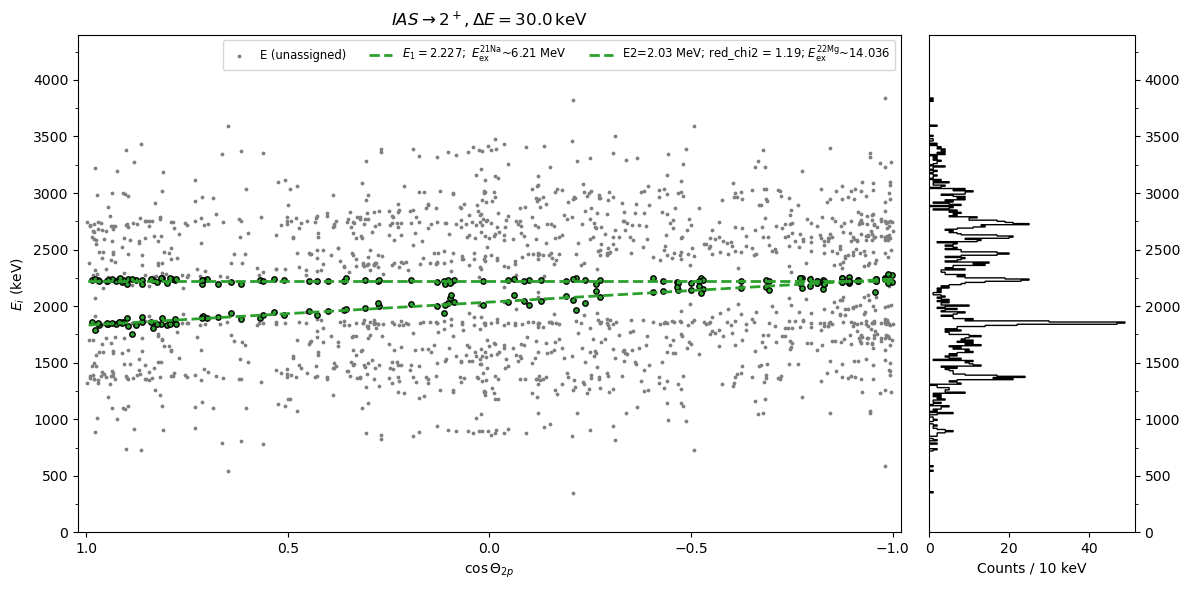

[]
No suitable exctited level was found for 7103


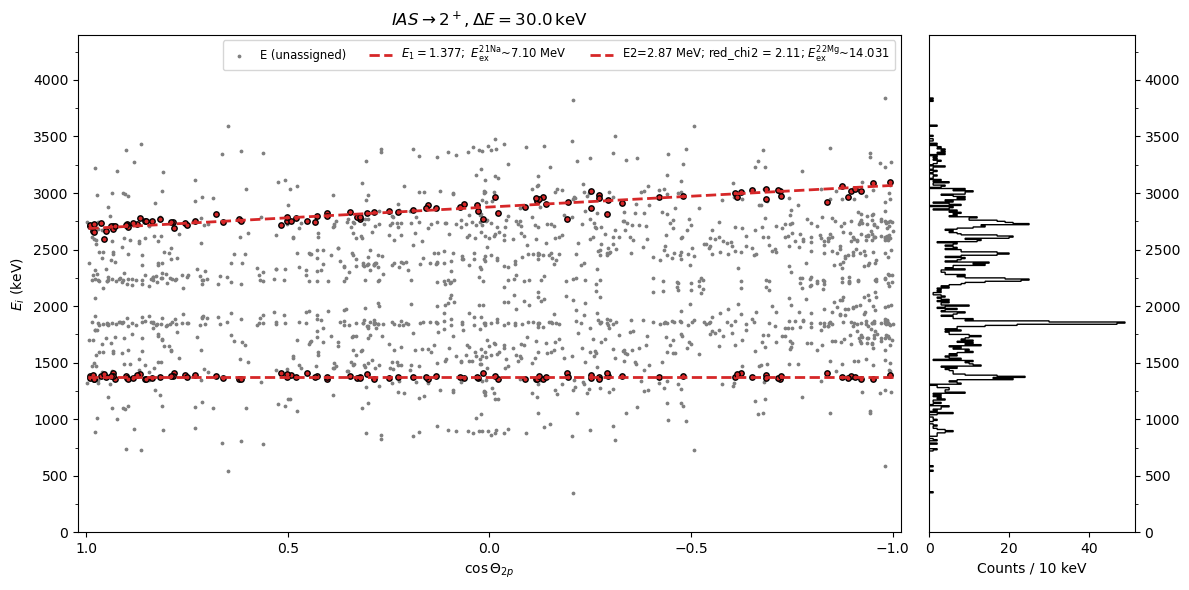

[]
5817 -> ENSDF: [5815. 5828.]


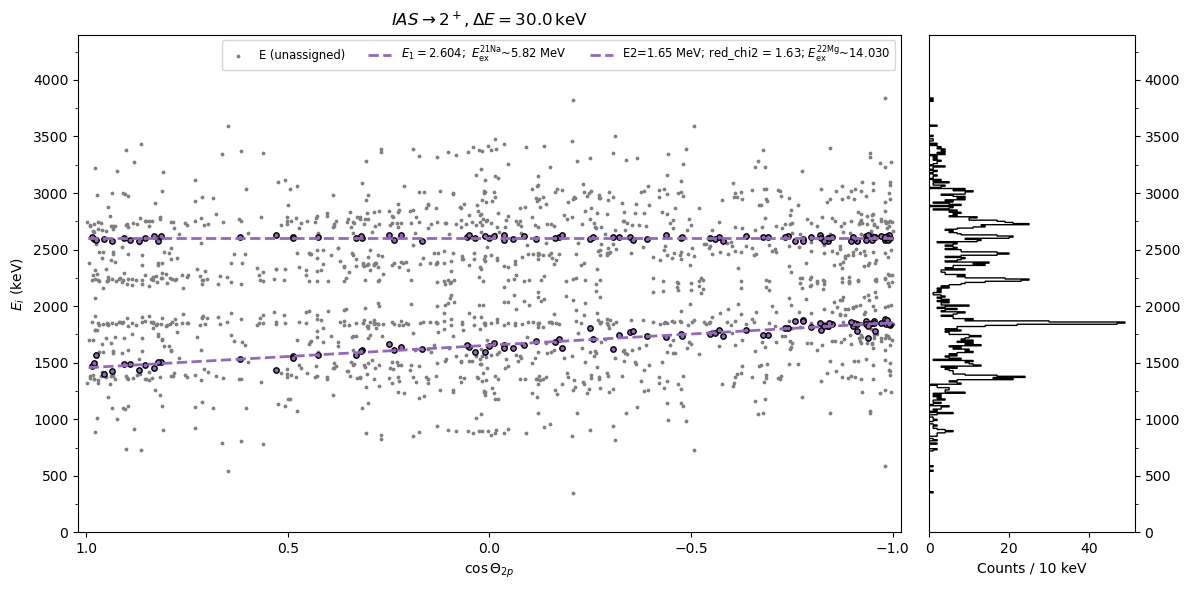

[]
5960 -> ENSDF: [5979.]
5960 -> Erik: [5950.]


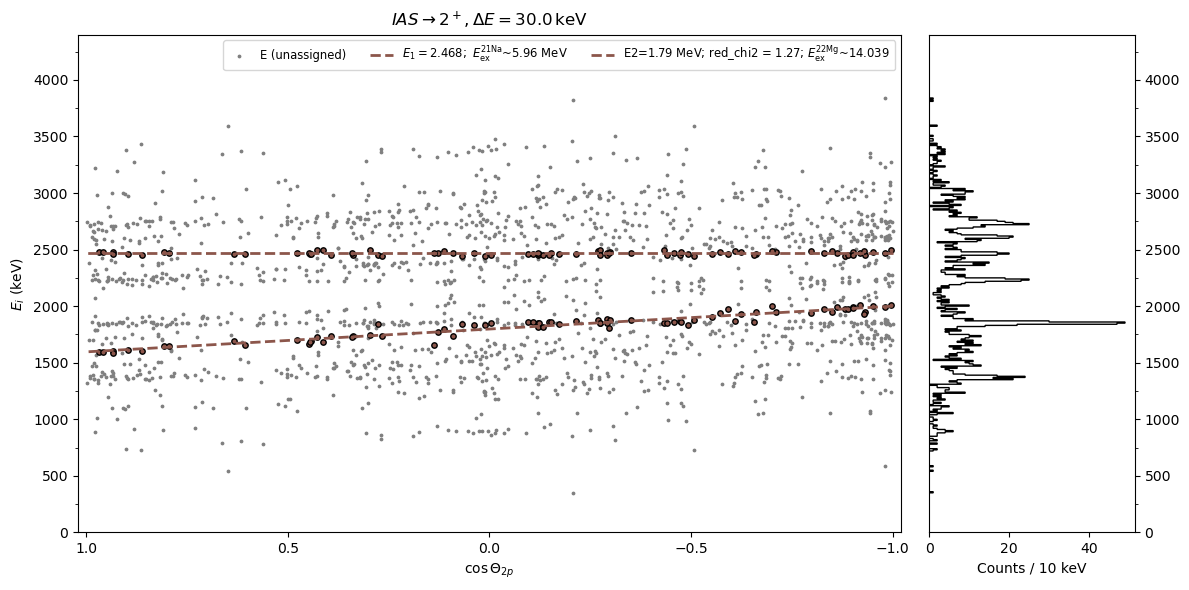

[]
No suitable exctited level was found for 6742


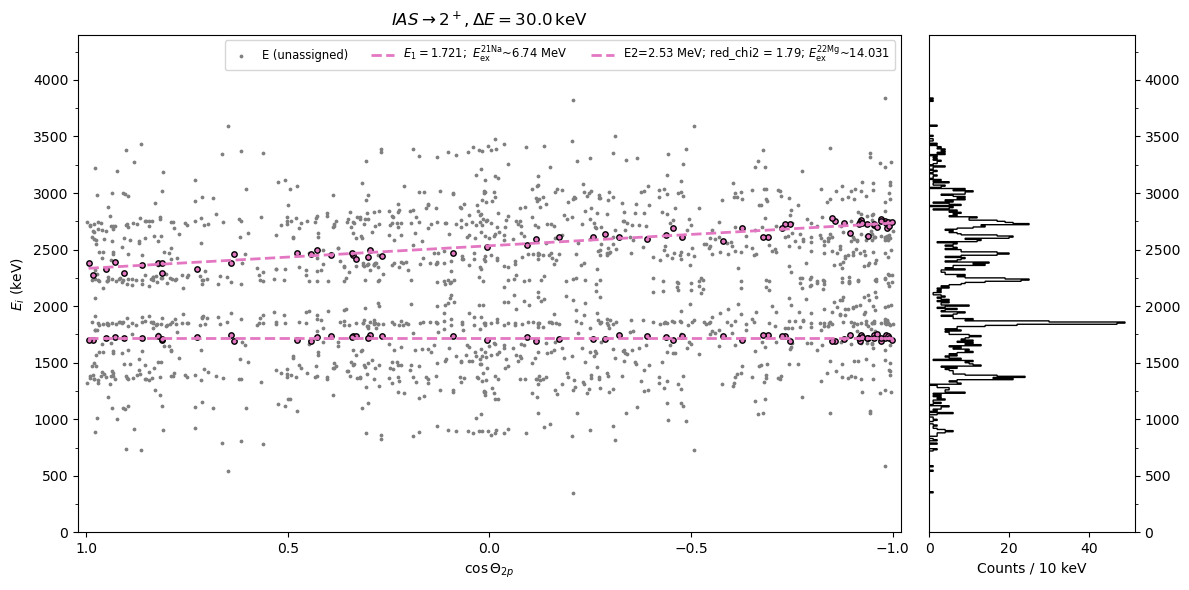

[]
6046 -> ENSDF: [6070.]


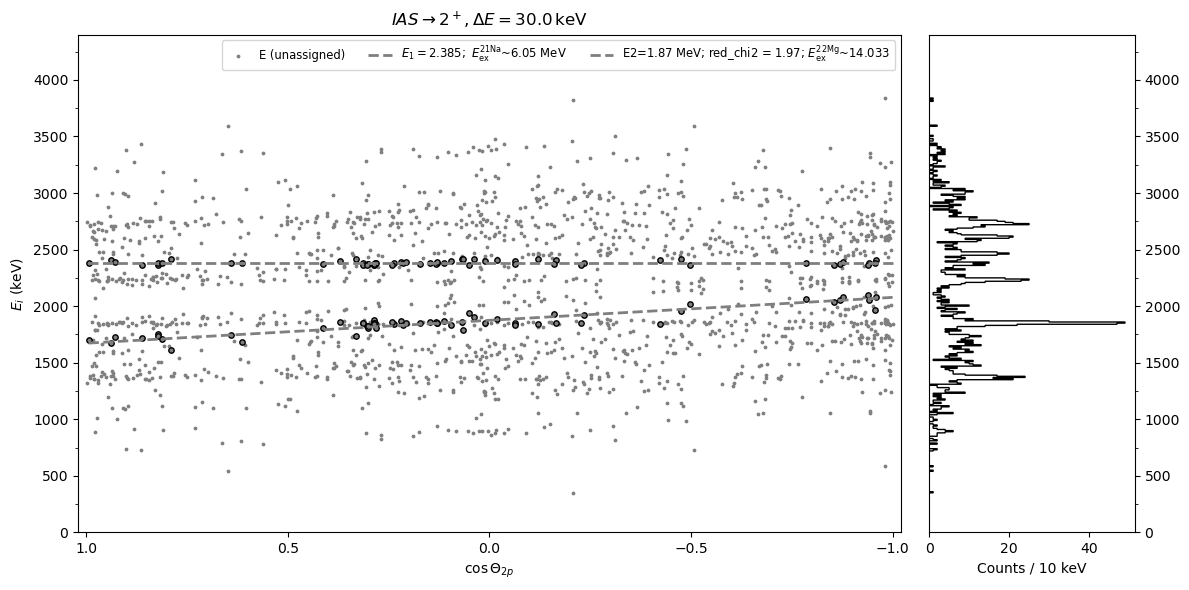

[]
6982 -> ENSDF: [6992.]


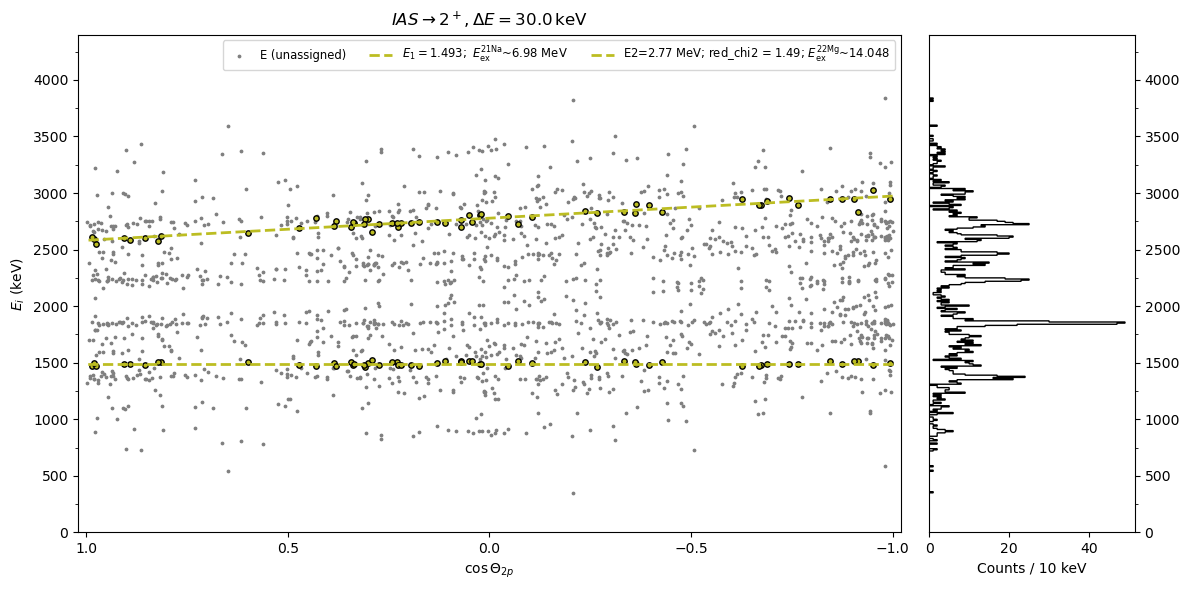

[]
No suitable exctited level was found for 6806


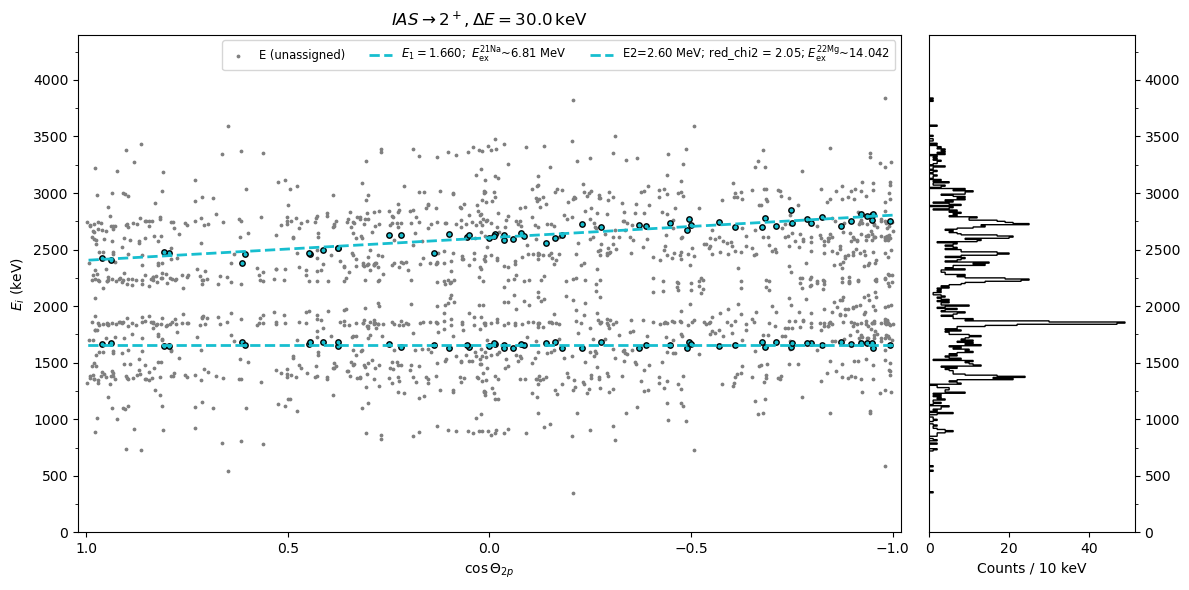

[]
No suitable exctited level was found for 5612


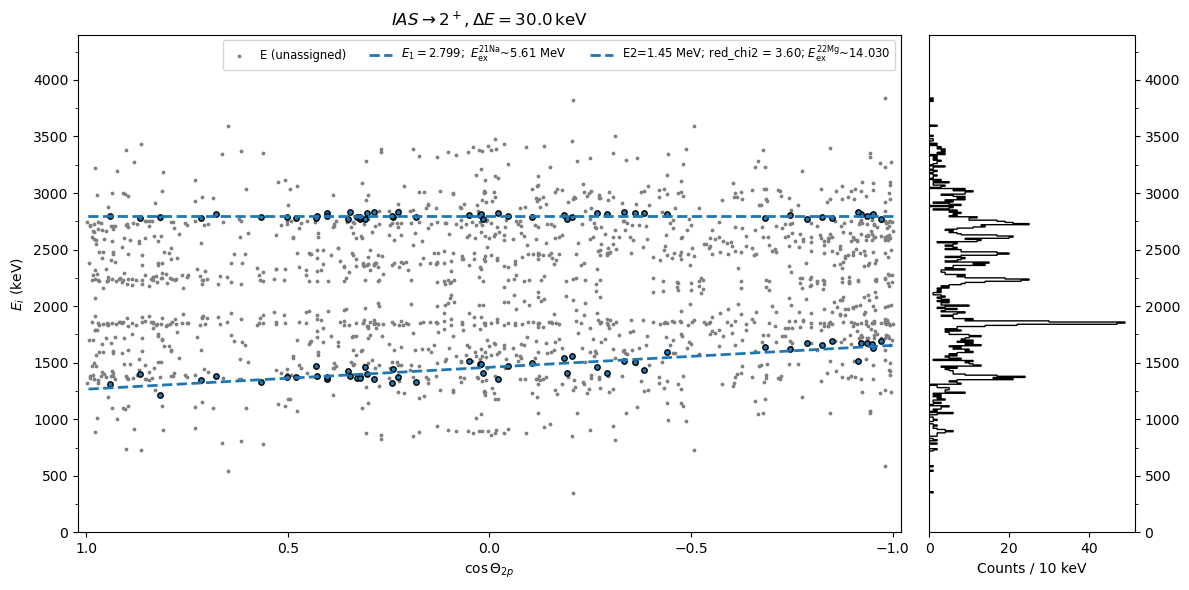

[]
6876 -> ENSDF: [6879.]


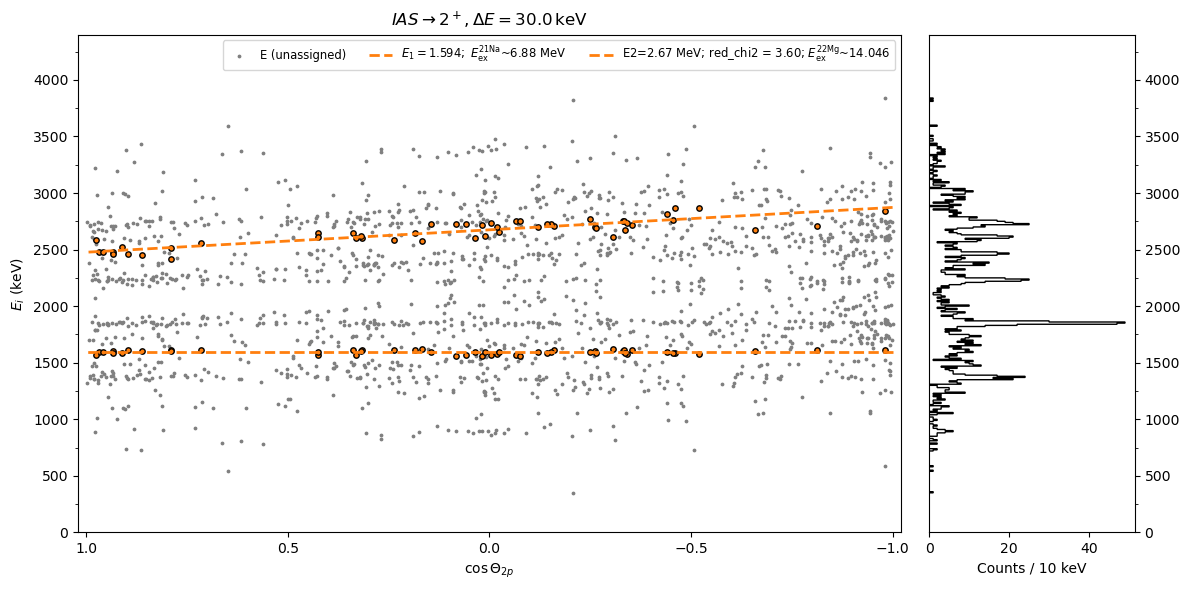

[]
5396 -> ENSDF: [5380.]
5396 -> Erik: [5370.]


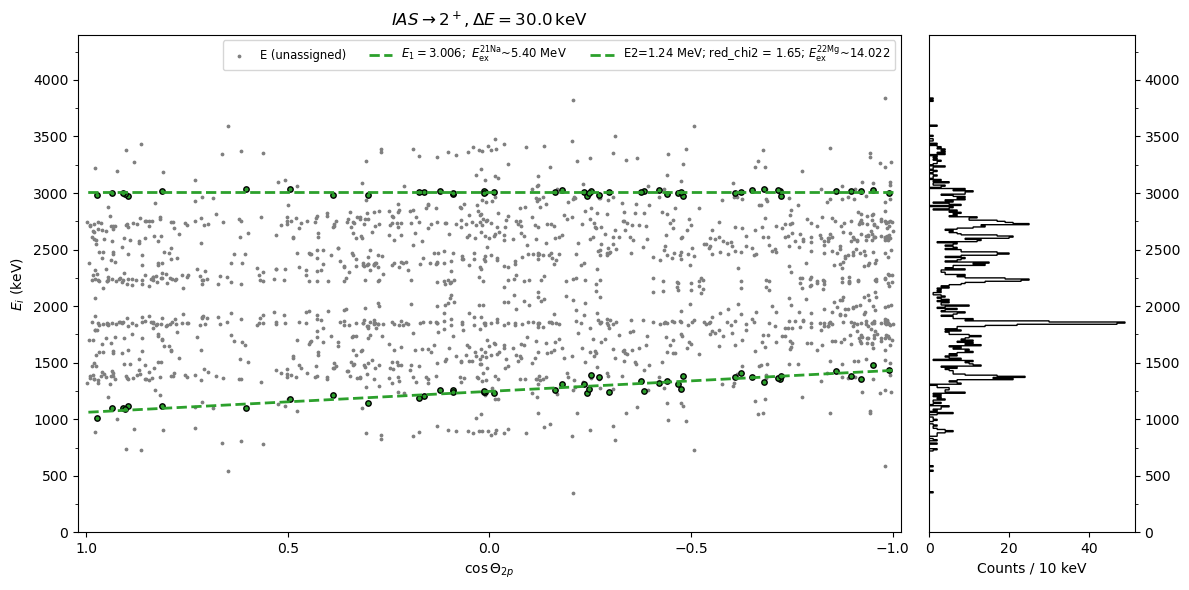

[]
No suitable exctited level was found for 6536


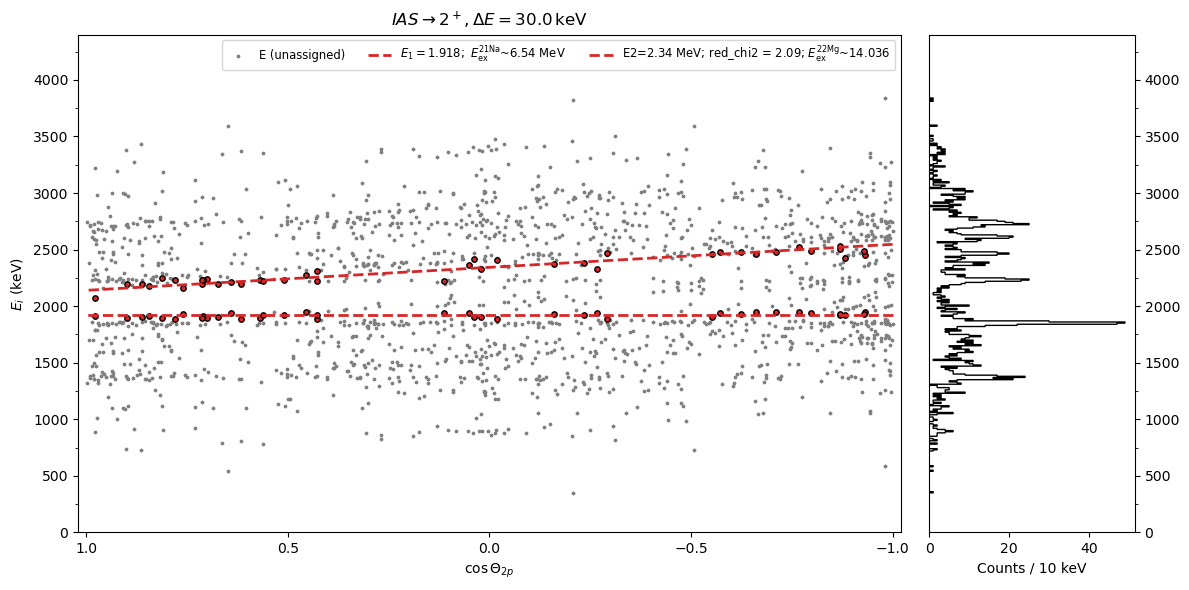

[]
5755 -> ENSDF: [5770.]


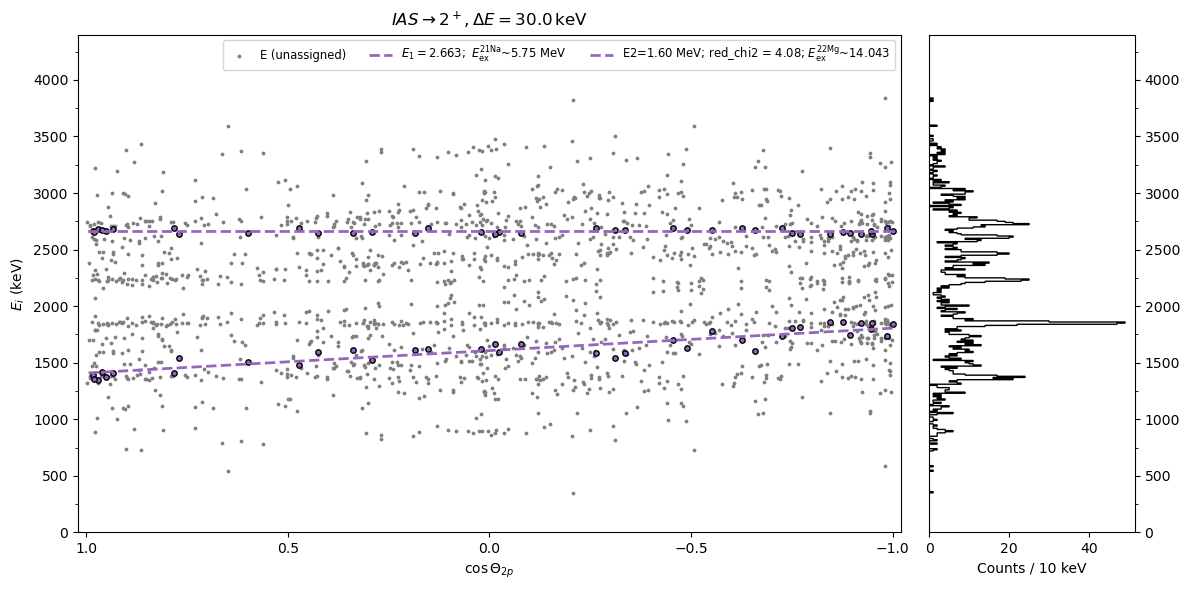

[]
5456 -> ENSDF: [5457.]


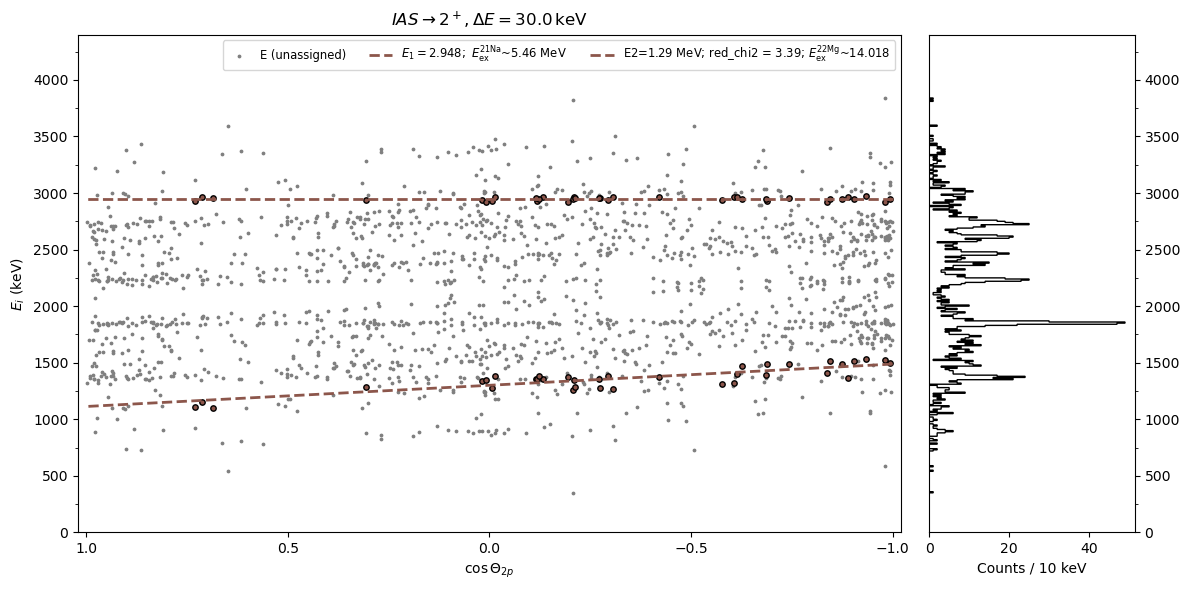

[]
No suitable exctited level was found for 6670


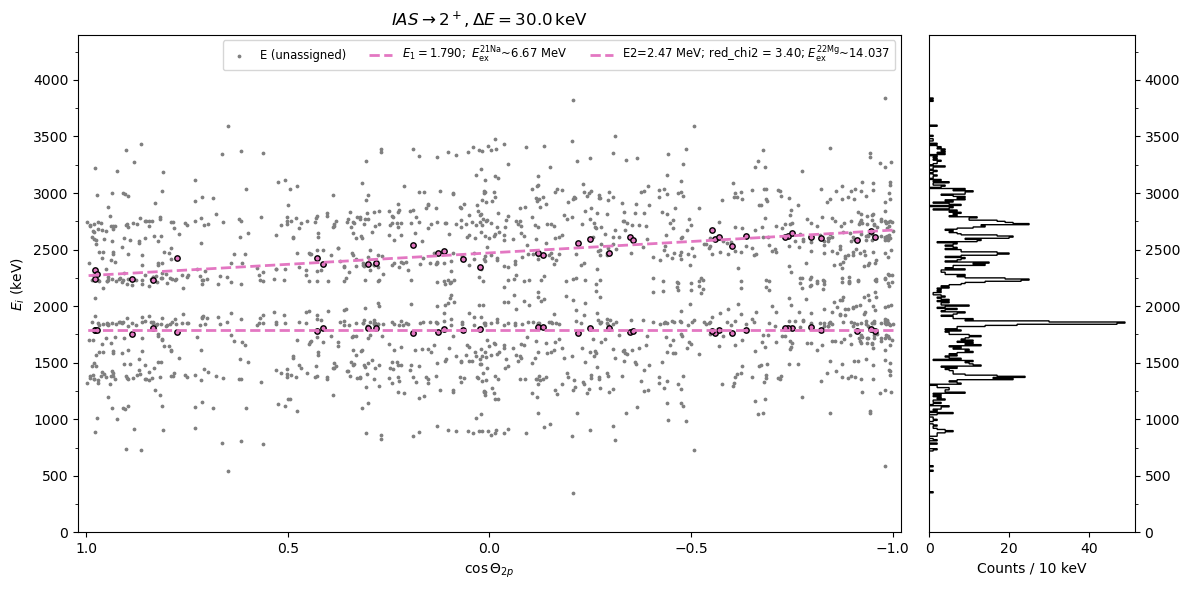

[]
5893 -> ENSDF: [5884.]


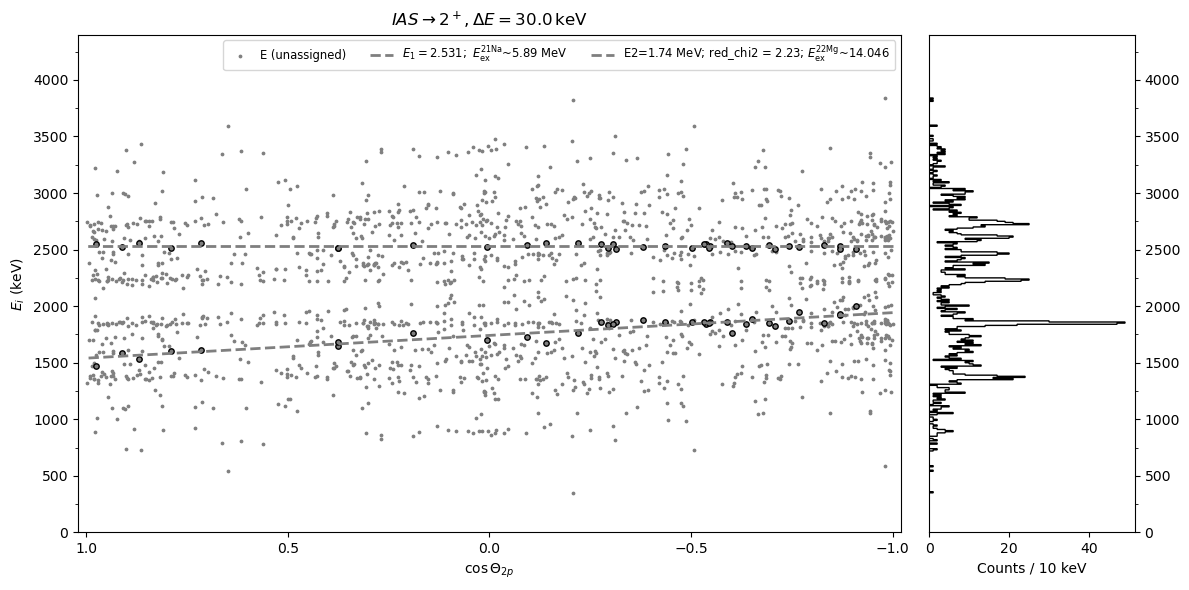

[]
6138 -> ENSDF: [6165.]


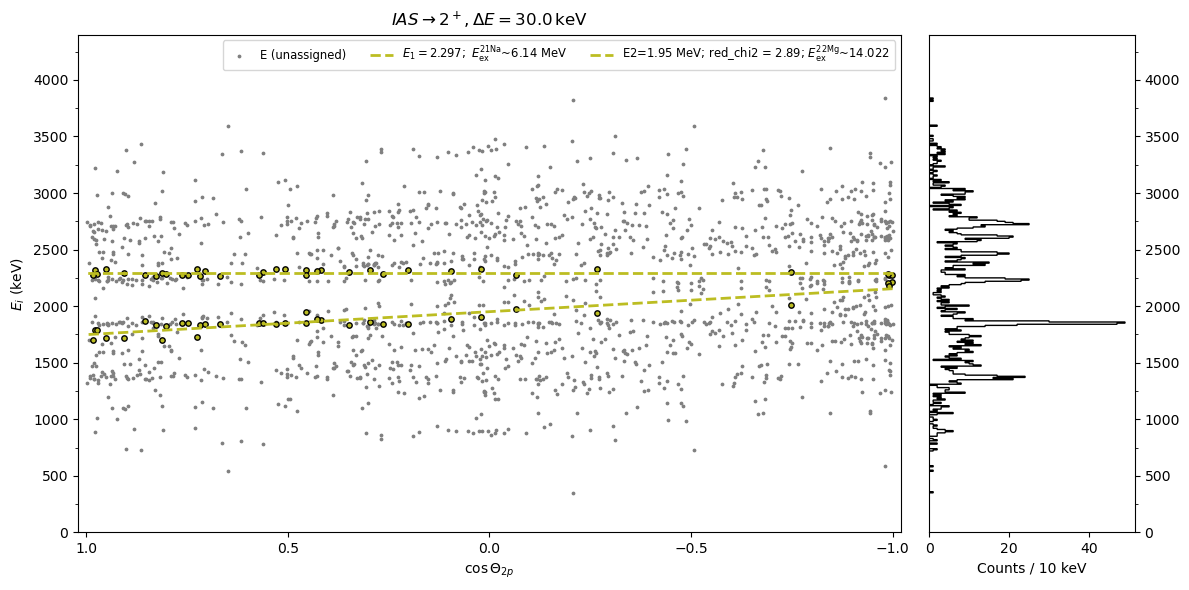

[]
6464 -> ENSDF: [6468.]
6464 -> Erik: [6470.]


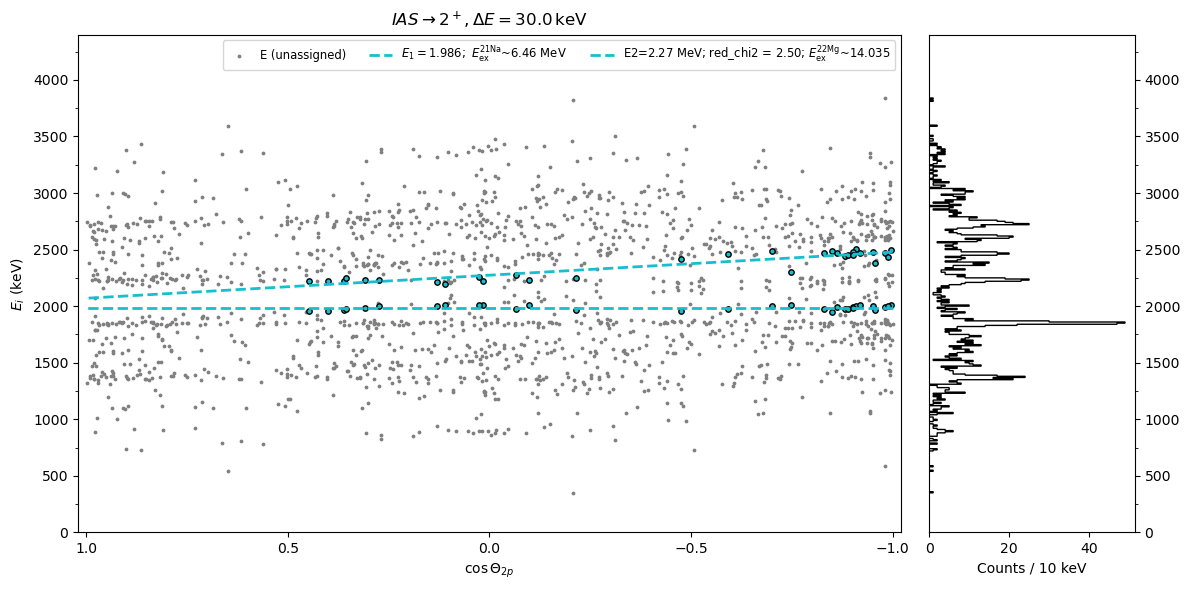

[]
No suitable exctited level was found for 7153


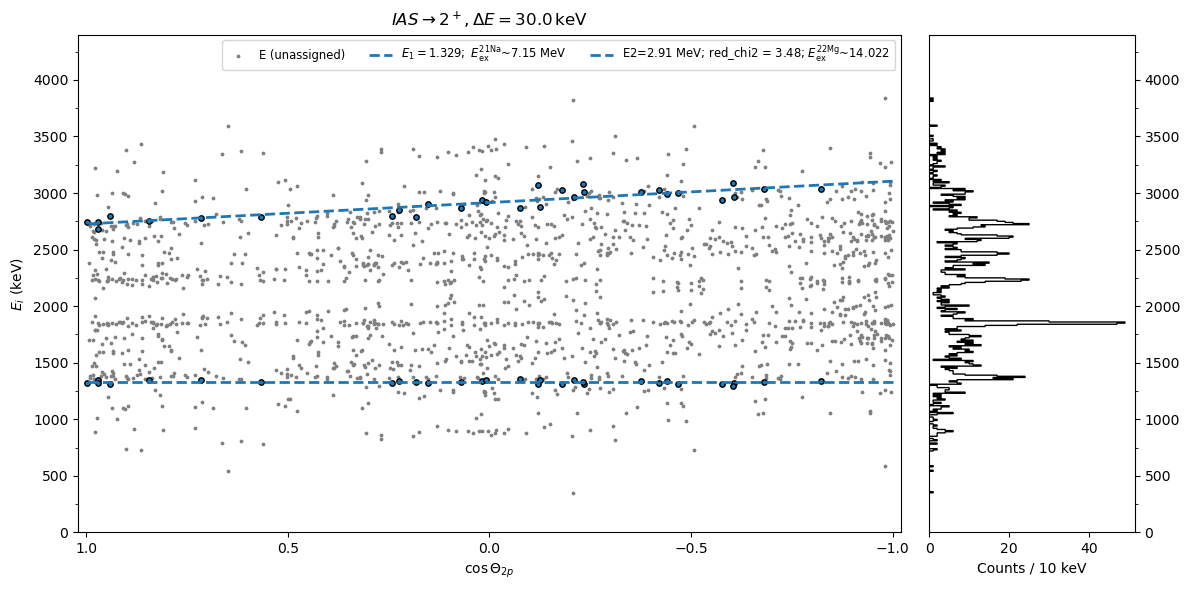

[]
The reduced chi2 values from the fits
[1.188 1.113 1.194 2.112 1.632 1.267 1.788 1.968 1.491 2.052 3.603 3.604
 1.65  2.093 4.077 3.388 3.403 2.225 2.886 2.502 3.48 ]

Peaks identified by previous studies of 21Na(found values)
[6213. 5817. 5960. 6046. 6982. 6876. 5396. 5755. 5456. 5893. 6138. 6464.]

Peaks found in Ensdf / Erik ?
[(nan, array([6200.])), (array([5815., 5828.]), nan), (array([5979.]), array([5950.])), (array([6070.]), nan), (array([6992.]), nan), (array([6879.]), nan), (array([5380.]), array([5370.])), (array([5770.]), nan), (array([5457.]), nan), (array([5884.]), nan), (array([6165.]), nan), (array([6468.]), array([6470.]))]
[(False, True), (True, False), (True, True), (True, False), (True, False), (True, False), (True, True), (True, False), (True, False), (True, False), (True, False), (True, True)]

Peaks not found to match any previously found levels in 21Na
[6606. 5687. 7103. 6742. 6806. 5612. 6536. 6670. 7153.]

E1 energies:
[1851. 2728. 2227. 1377. 2604. 2468. 1

In [12]:
####################-----------------------------####################
#####
###
# This plotting tries to find lines with a specified dE(which essentially is the width of the peaks allowed)
# and tolerance(fitted E1 value distance to an already known 21Na level)
# and Nmin which specifies how many points we need in order to define a horizontal band
#
######------> This plotting routine DOES reuse events <------######
#
###
#####
####################-----------------------------####################

# ---- parameters for horizontal band finder ----
Nmin = 30   # minimum events per band
dE   = 30.0 # keV tolerance

tolerance = 30
potential_excitedstates = []
potential_diffs_ensdf= []
potential_diffs_erik= []
ensdf_erik = []
vals=[]
Ex, E1s = [],[]
def find_horizontal_bands(E, Nmin=20, dE=30.0):
    """
    Finds horizontal bands in E with minimum Nmin events.
    Bands with fewer events are ignored.
    """
    E = np.array(E)
    assigned = np.zeros(E.shape[0], dtype=bool)
    bands = []

    while True:
        idx_cands = np.where(~assigned)[0]
        if idx_cands.size == 0:
            break

        idx_try = idx_cands #np.random.choice(idx_cands, size=min(100, idx_cands.size), replace=False)
        best = None
        for idx in idx_try:
            E_cand = E[idx]
            inliers = (~assigned) & (np.abs(E - E_cand) <= dE)
            n = inliers.sum()
            if best is None or n > best[0]:
                best = (n, inliers, E_cand)

        if best[0] >= Nmin:
            inliers = best[1]
            E_center = np.median(E[inliers])
            bands.append((inliers, E_center, best[0]))
            assigned |= inliers
        else:
            break

    return bands, assigned

# ---- your Q2p gate ----
m   = 4400
lim = (4350,4580)
title = fr"$IAS \rightarrow 2^+, \Delta E={dE} \, \mathrm{{keV}}$"


mask = (Q2p >= lim[0]) & (Q2p <= lim[1])
cos_th = np.cos(np.deg2rad(theta[mask]))
e1 = np.array(E1[mask])
e2 = np.array(E2[mask])
Q2p_mean = lim[0] + (lim[1] - lim[0])/2

# ---- run horizontal band finder on concatenated e1+e2 ----
E_all = np.concatenate([e1, e2])
bands, assigned = find_horizontal_bands(E_all, Nmin=Nmin, dE=dE)
reds = []
identifiable_peaks = []
non_matched_peaks = []
# ---- plot ----
"""
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(12,6), sharey=True,
    gridspec_kw={'width_ratios':[4,1]}
)

# scatter all events in gray
ax1.scatter(cos_th, e1, color='gray', s=3, label='E1 (unassigned)')
ax1.scatter(cos_th, e2, color='lightgray', s=3, label='E2 (unassigned)')

colors = plt.cm.tab10.colors
"""
for j, (inliers, E_center, count) in enumerate(bands):
    fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(12,6), sharey=True,
    gridspec_kw={'width_ratios':[4,1]}
    )

    # scatter all events in gray
    ax1.scatter(cos_th, e1, color='gray', s=3, label='E (unassigned)')
    ax1.scatter(cos_th, e2, color='gray', s=3)

    colors = plt.cm.tab10.colors
    c = colors[j % len(colors)]

    # split mask into e1 and e2
    mask_e1 = inliers[:len(e1)]
    mask_e2 = inliers[len(e1):]

    # plot points
    ax1.scatter(cos_th[mask_e1], e1[mask_e1], s=15, facecolors=c, edgecolors='k')
    ax1.scatter(cos_th[mask_e2], e2[mask_e2], s=15, facecolors=c, edgecolors='k')
    ax1.scatter(cos_th[mask_e2], e1[mask_e2], s=15, facecolors=c, edgecolors='k')
    ax1.scatter(cos_th[mask_e1], e2[mask_e1], s=15, facecolors=c, edgecolors='k')
    # ---- fit a constant to all events in the band ----
    E1_band = np.concatenate([np.array(e1[mask_e1]), np.array(e2[mask_e2])])
    cos1_band = np.concatenate([np.array(cos_th[mask_e1]), np.array(cos_th[mask_e2])])
    
    E2_band = np.concatenate([np.array(e1[mask_e2]), np.array(e2[mask_e1])])
    cos2_band = np.concatenate([np.array(cos_th[mask_e2]), np.array(cos_th[mask_e1])])

    p_opt1, _ = curve_fit(horizontal_line, cos1_band, E1_band)
    E1_fit = p_opt1[0]
    Q1_fit = E1_fit*(mNa + mp)/mNa
    popt2, _ = curve_fit(y2, cos2_band, E2_band, p0=[p_opt1[0], Q2p_mean-Q1_fit], bounds=([E1_fit,0],[E1_fit+1e-12,Q2p_mean]))
    E2_fit = popt2[1]
    Q2_fit = E2_fit*(mNe + mp)/mNe
    E2_min = y2(1, E1_fit, E2_fit)
    E2_max = y2(-1, E1_fit, E2_fit)
    
    mgex = 14050#(S2p+Q1_fit+Q2_fit)
    
    sigma_guess = dE  # or something similar
    residuals = E2_band - y2(cos2_band, *popt2)
    chi2_val = np.sum((residuals / sigma_guess)**2)
    dof = len(E2_band) - len(popt2)
    reduced_chi2 = chi2_val / dof ### chi2~1 -> good fit ; chi2 >> 1 -> poor fit ; chi2 << 1 -> overfitting data

    # plot the fitted horizontal line
    x_plot = np.linspace(-1, 1, 200)
    ax1.plot(x_plot, horizontal_line(x_plot, E1_fit), color=c, linestyle='--', linewidth=2,
             label=rf"$E_{1}={E1_fit/1e3:.3f}; \ E_{{\mathrm{{ex}}}}^{{{21}\mathrm{{Na}}}}$~{(mgex-S1p-E1_fit/frac)/1e3:.2f} MeV")
    ax1.plot(x_plot, y2(x_plot, *popt2), color=c, linestyle='--', linewidth=2,
             label=rf"E2={popt2[1]/1e3:.2f} MeV; red_chi2 = {reduced_chi2:.2f}; $E_{{\mathrm{{ex}}}}^{{{22}\mathrm{{Mg}}}}$~{(S2p+Q1_fit+Q2_fit+1634)/1e3:.3f}")#Q1~{E_fit/frac:.0f} keV")

    Ex.append(mgex-S1p-E1_fit/frac)
    E1s.append(E1_fit)

    potential_excitedstates.append((mgex-S1p-E1_fit/frac)/1e3)

    diff_ensdf = (E_excited-(mgex-S1p-E1_fit/frac))
    diff_erik = (Erik_Es- (mgex-S1p-E1_fit/frac))    
    
    match_ensdf_exists = np.any(np.abs(diff_ensdf) <= tolerance)
    match_erik_exists = np.any(np.abs(diff_erik) <= tolerance)

    # Print ENSDF matches if they exist
    match_erik = np.NaN
    match_ensdf = np.NaN
    if match_ensdf_exists:
        match_ensdf = E_excited[np.abs(diff_ensdf) <= tolerance]
        print(f"{(mgex-S1p-E1_fit/frac):.0f} -> ENSDF: {match_ensdf}")

    # Print Erik matches if they exist
    if match_erik_exists:
        match_erik = Erik_Es[np.abs(diff_erik) <= tolerance]
        print(f"{(mgex-S1p-E1_fit/frac):.0f} -> Erik: {match_erik}")
        

    if match_ensdf_exists or match_erik_exists:
        identifiable_peaks.append((mgex-S1p-E1_fit/frac))
        ensdf_erik.append((match_ensdf_exists,match_erik_exists))
        vals.append((match_ensdf, match_erik))
        
    if not match_erik_exists and not match_ensdf_exists:
        print(f"No suitable exctited level was found for {(mgex-S1p-E1_fit/frac):.0f}")
        non_matched_peaks.append(mgex-S1p-E1_fit/frac)
        
    # ---- finalize plot ----
    ax1.set_xlabel(r"$\cos\Theta_{2p}$")
    ax1.set_ylabel(r"$E_i$ (keV)")
    ax1.set_title(title)
    ax1.set_ylim(500, m)
    ax1.set_yticks(np.arange(0, m, 250), minor=True)
    ax1.set_xticks(np.arange(1,-1.5,-0.5))
    ax1.set_xlim(1.02,-1.02)
    ax1.legend(fontsize='small', ncol=5)
    reds.append(reduced_chi2)

    # ---- histogram ----
    bins = np.arange(0, 7000+10, 10)
    h1, _ = np.histogram(e1, bins=bins)
    h2, _ = np.histogram(e2, bins=bins)
    ax2.hist(bins[:-1], bins=bins, weights=h1+h2, histtype='step',
            orientation='horizontal', color='k')

    ax2.set_xlabel('Counts / 10 keV')
    ax2.yaxis.set_ticks_position('right')
    ax2.set_yticks(np.arange(0, m, 250), minor=True)

    fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
    plt.tight_layout()
    plt.show()
    print(potential_diffs_ensdf)

#plt.hist(potential_diffs_ensdf, bins=np.arange(-10,40+5,5), histtype='step')
#plt.hist(potential_diffs_erik, bins=np.arange(-10,40+5,5), histtype='step')
print("The reduced chi2 values from the fits")
print(np.round(reds,3))
print()
print("Peaks identified by previous studies of 21Na(found values)")
print(np.round(identifiable_peaks,0))
print()
print("Peaks found in Ensdf / Erik ?")
print(vals)
print(ensdf_erik)
print()
print("Peaks not found to match any previously found levels in 21Na")
print(np.round(non_matched_peaks,0))
print()
print("E1 energies:")
print(np.round(E1s,0))
print("Excited state energies of 21Na:")
print(np.round(Ex,0))


No suitable exctited level was found for 6606


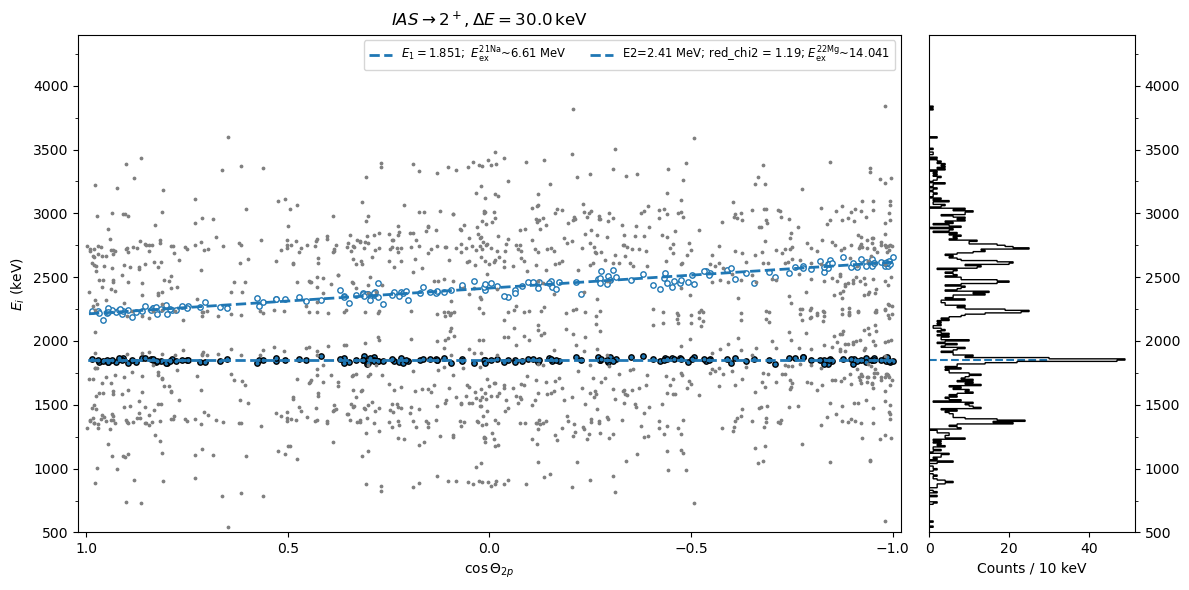

No suitable exctited level was found for 5687


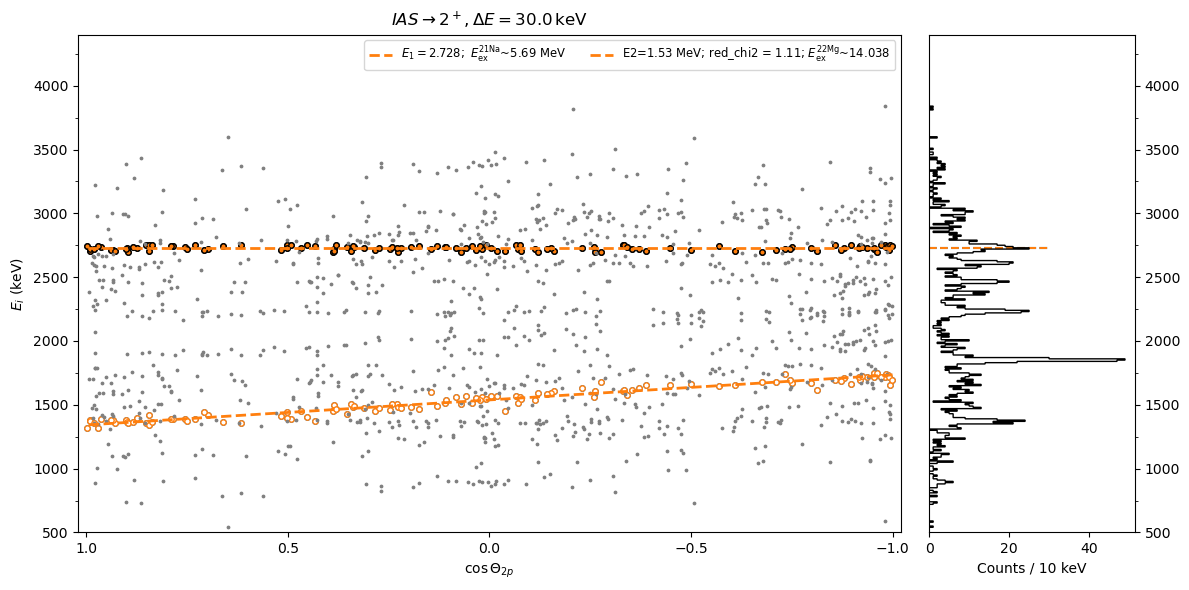

6215 -> Erik: [6200.]


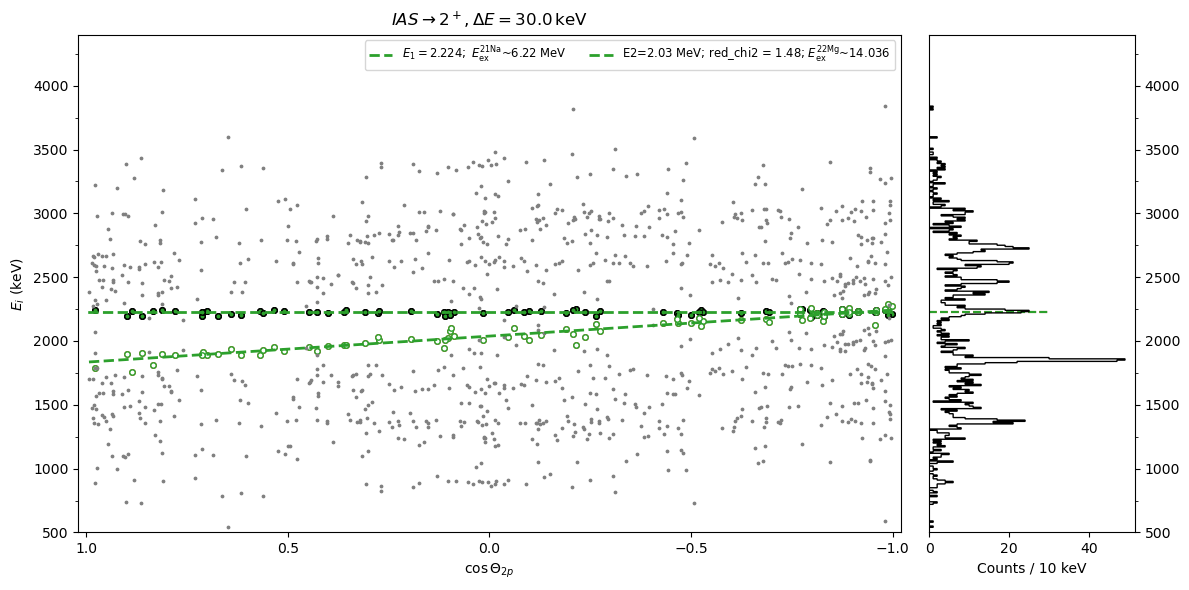

No suitable exctited level was found for 7111


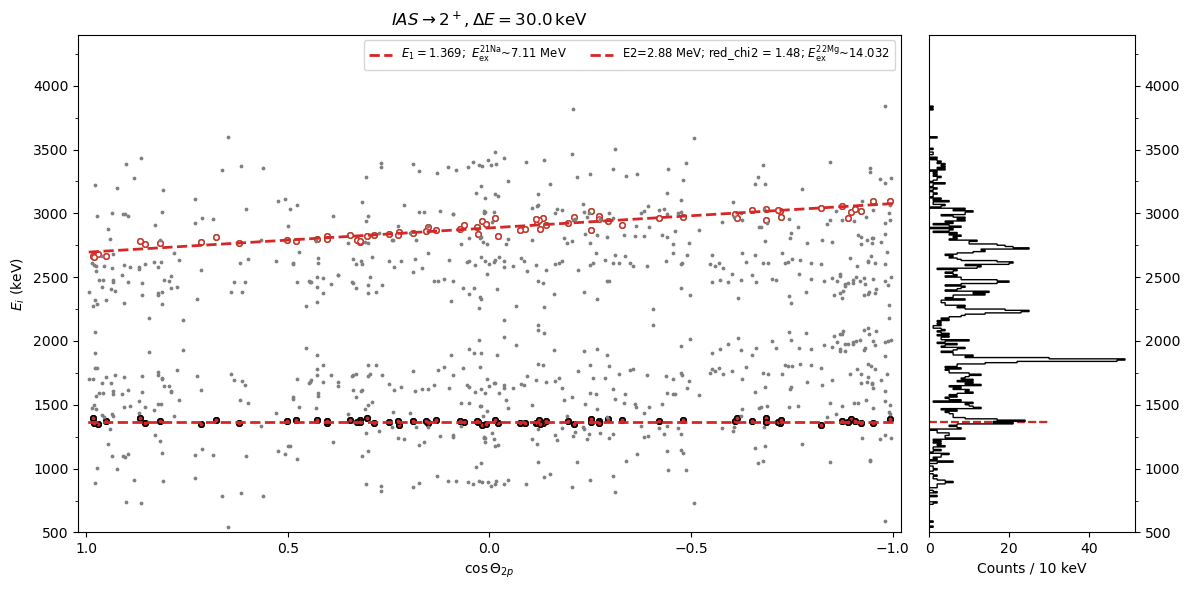

5813 -> ENSDF: [5815. 5828.]


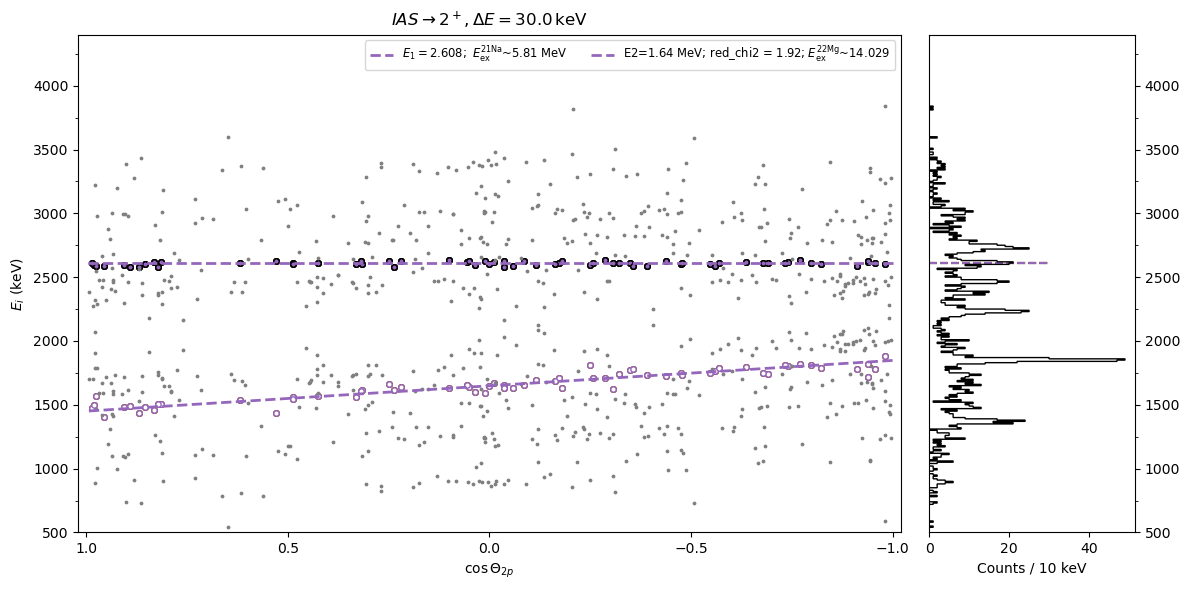

5956 -> ENSDF: [5979.]
5956 -> Erik: [5950.]


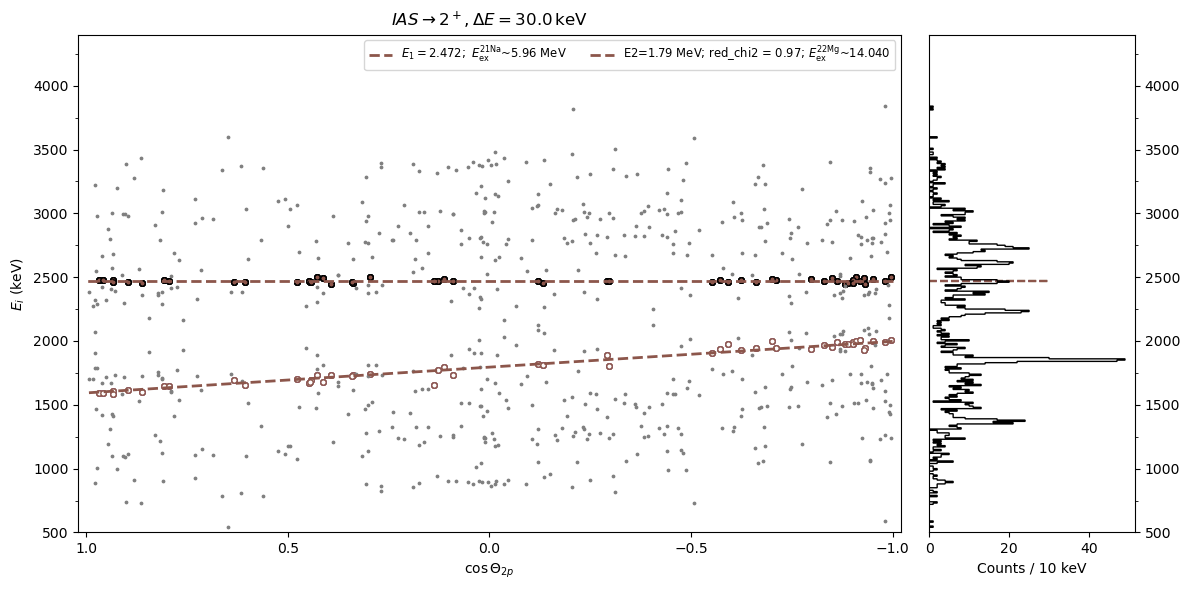

No suitable exctited level was found for 5626


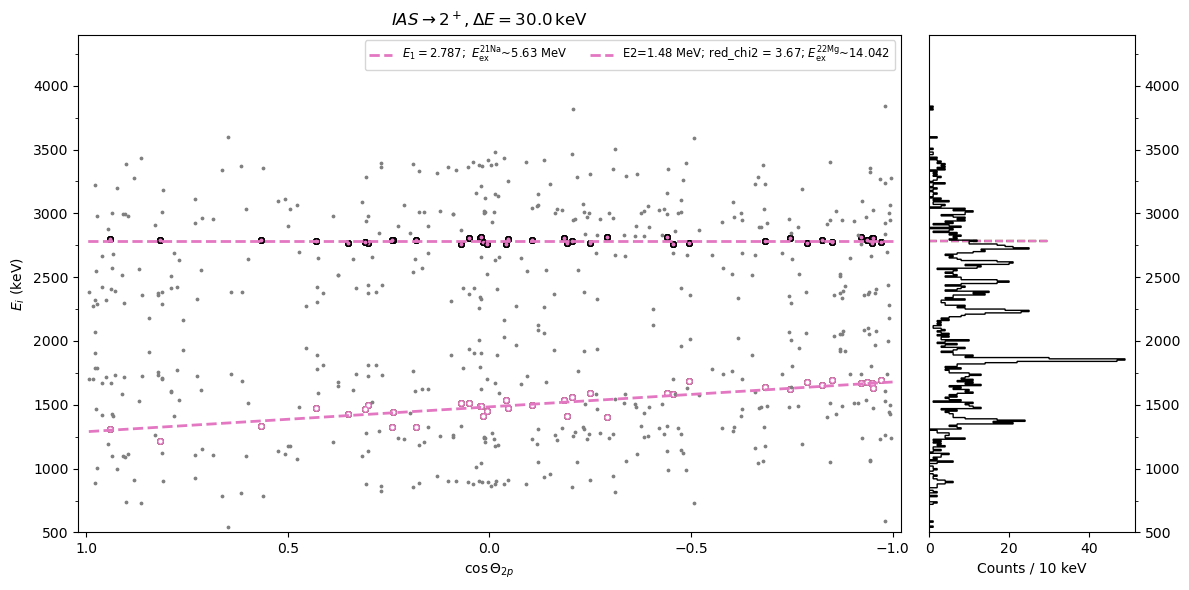

5392 -> ENSDF: [5380.]
5392 -> Erik: [5370.]


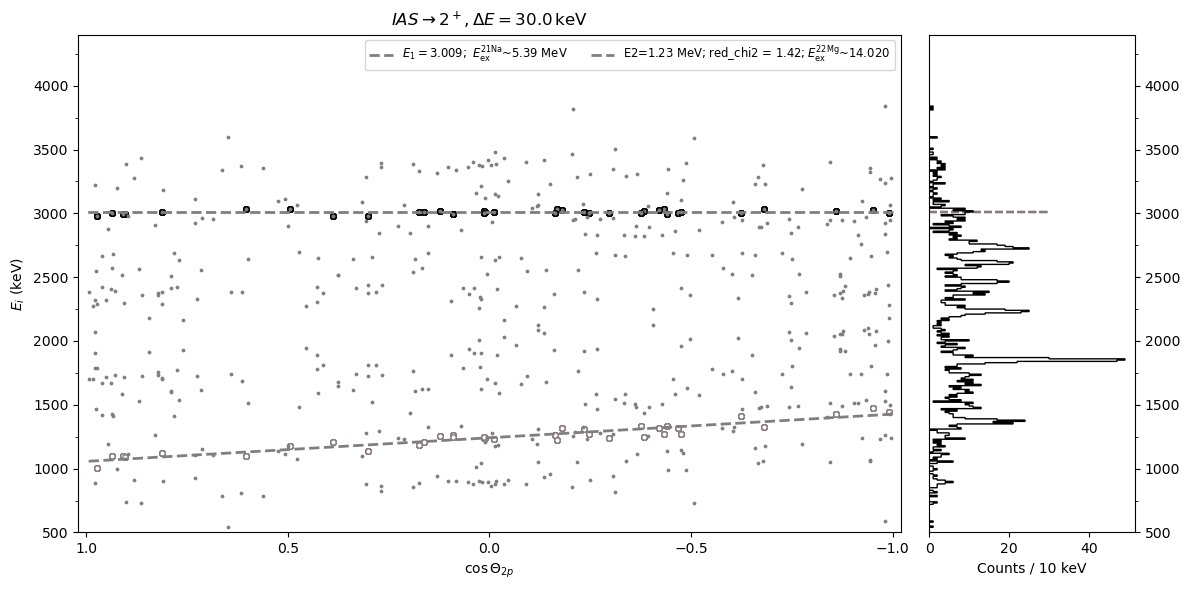

6046 -> ENSDF: [6070.]


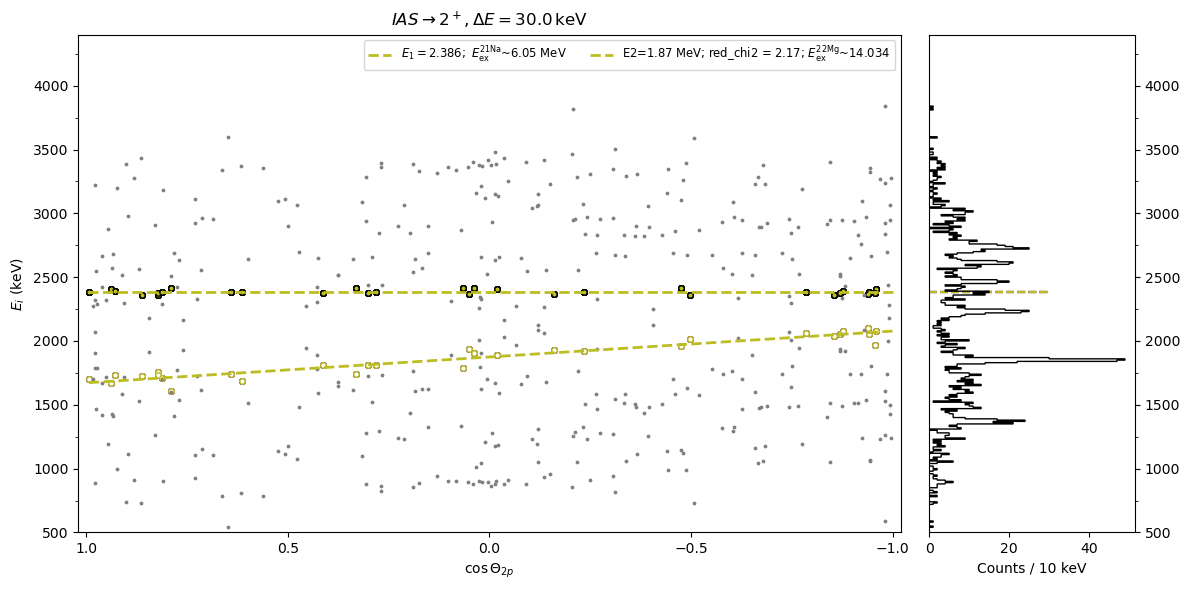

5751 -> ENSDF: [5770.]


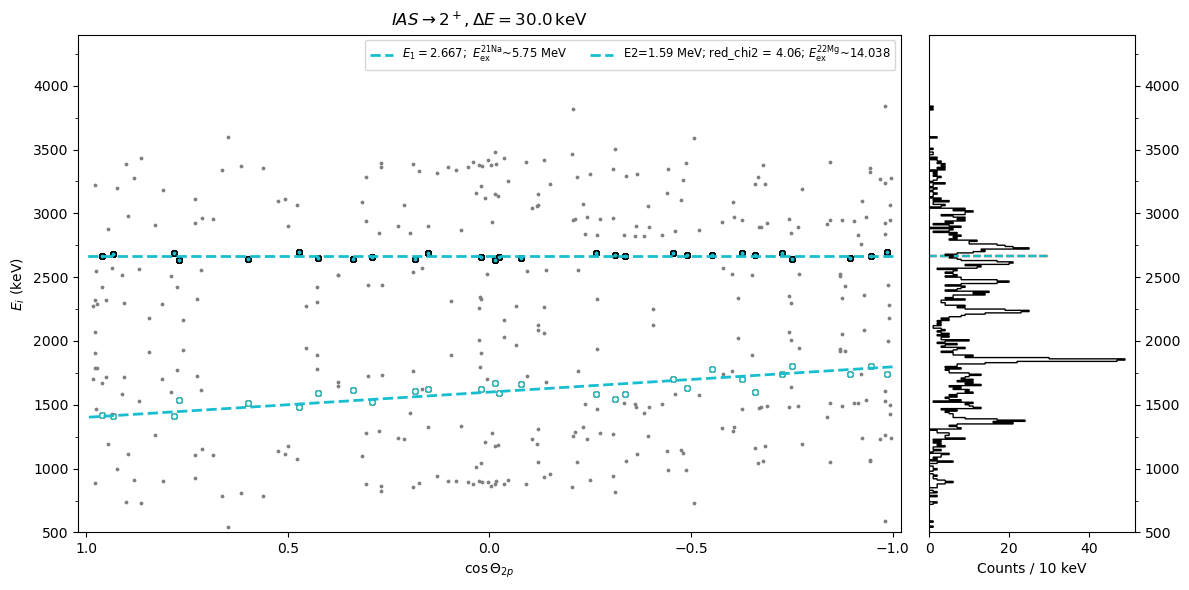

5455 -> ENSDF: [5457.]


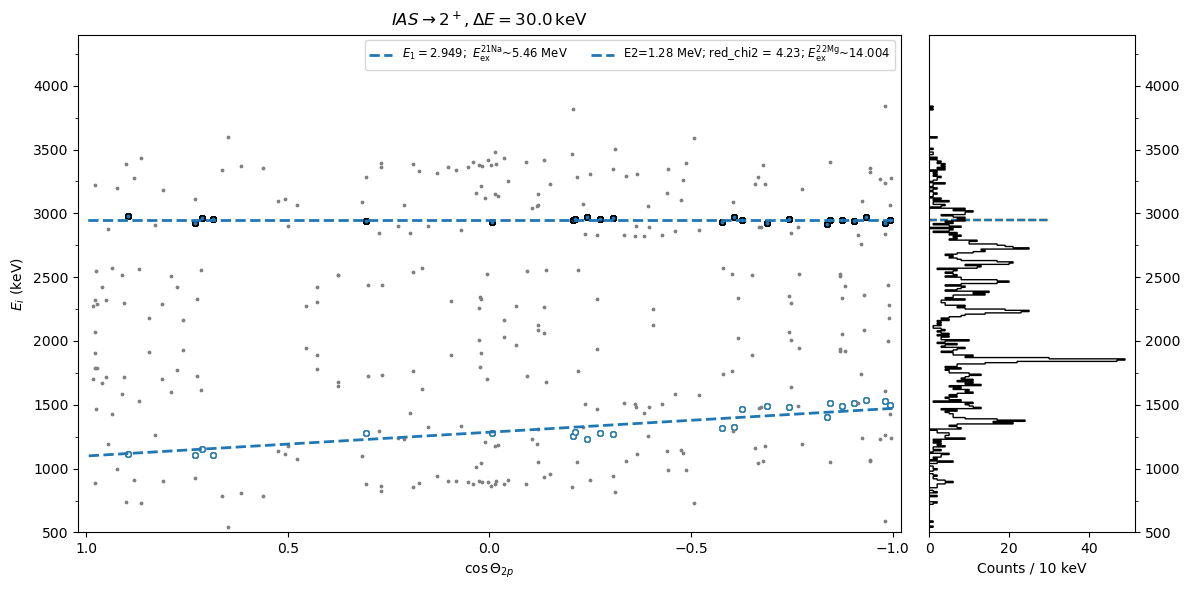

7616 -> ENSDF: [7609.]


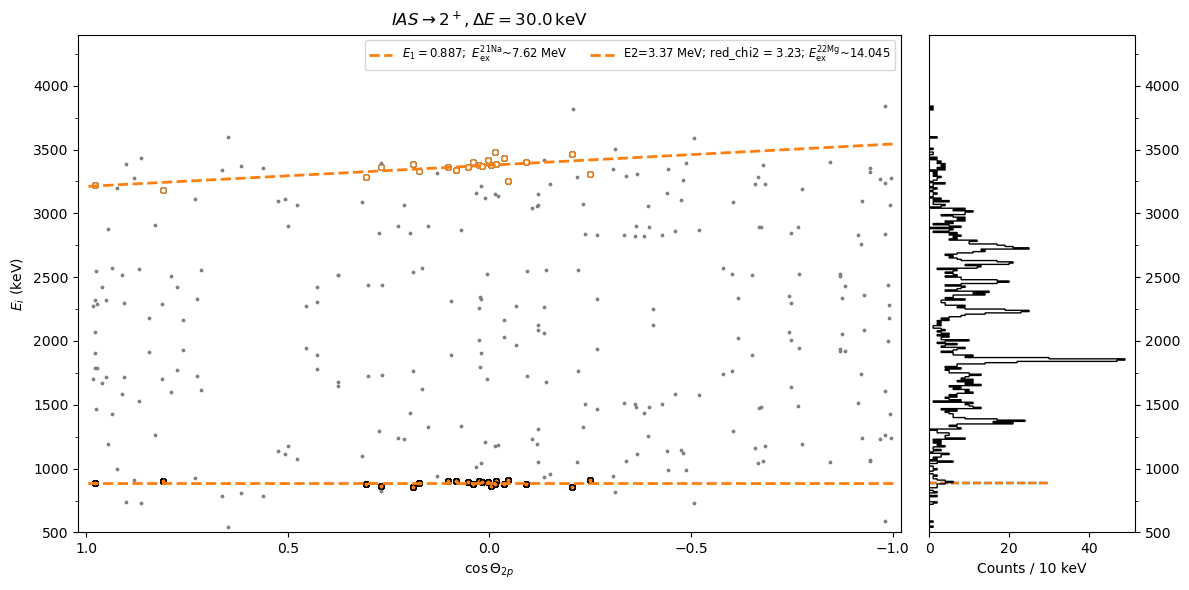

5884 -> ENSDF: [5884.]


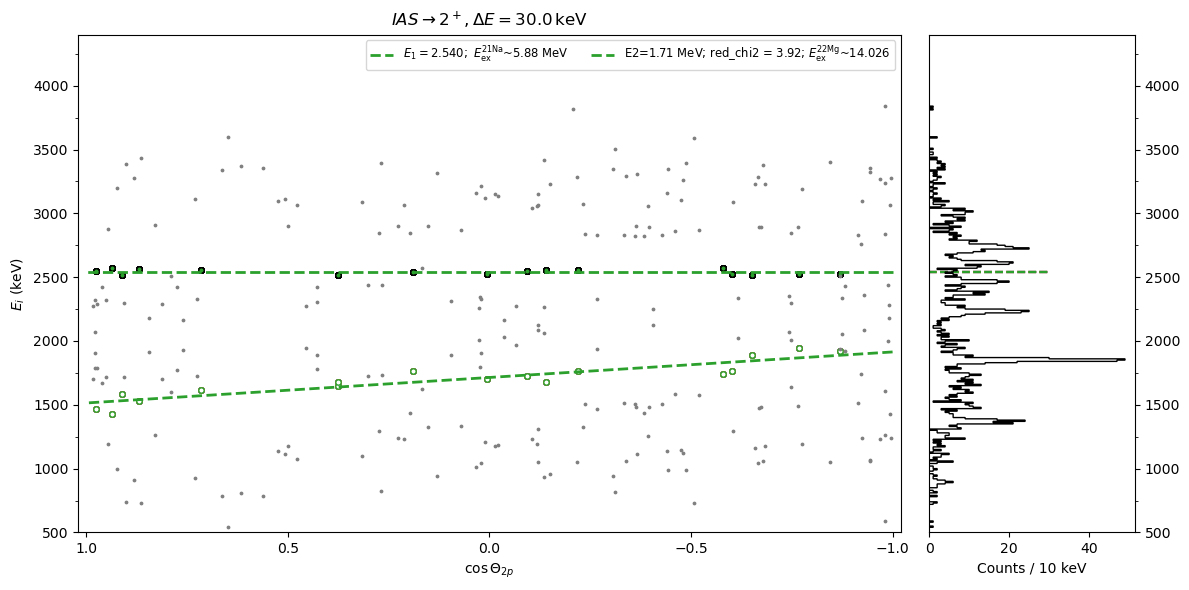

No suitable exctited level was found for 5565


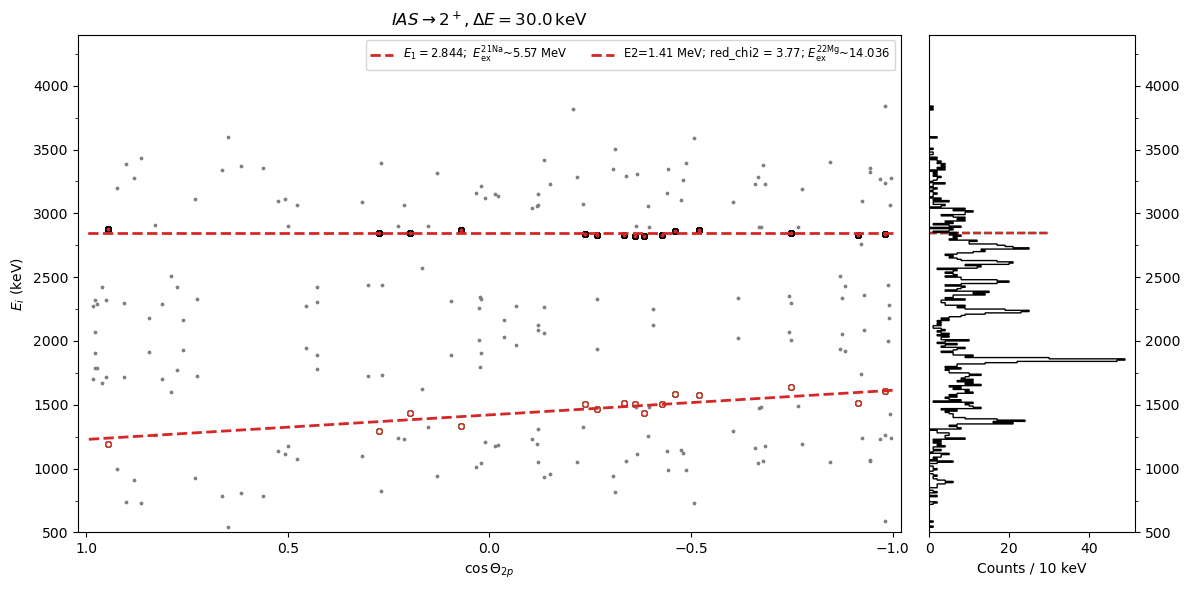

No suitable exctited level was found for 6134


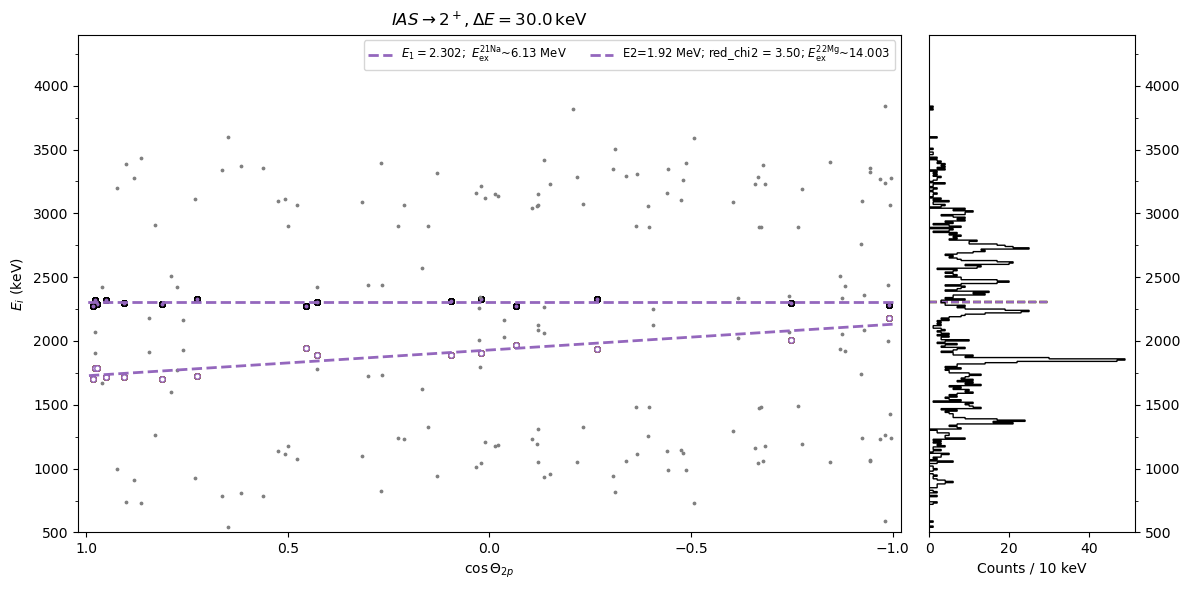

No suitable exctited level was found for 5318


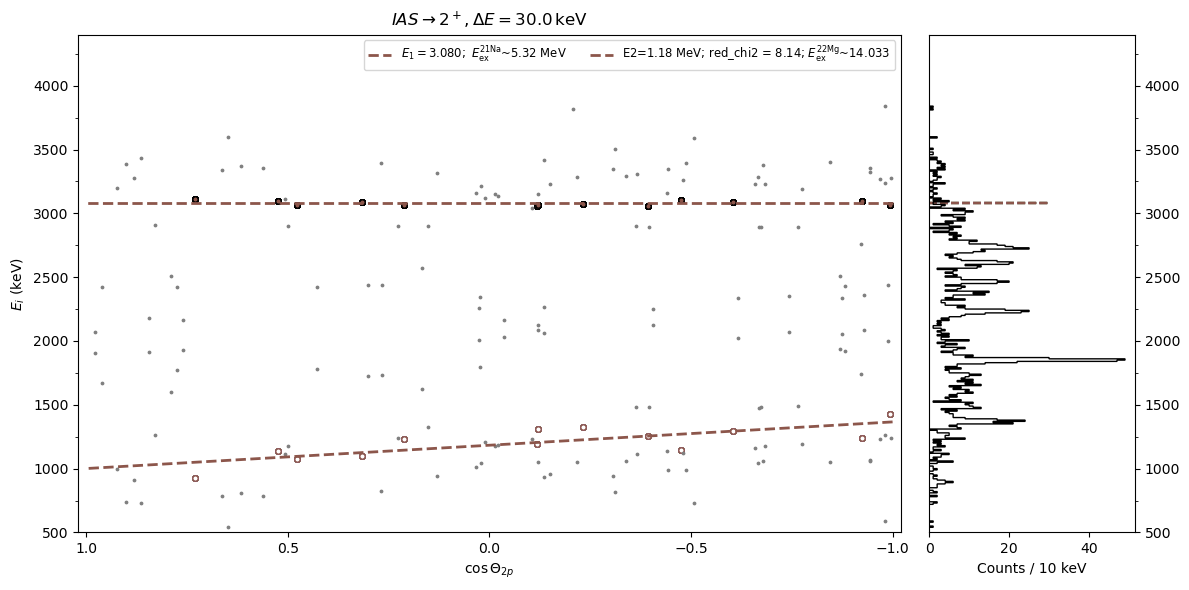

5132 -> Erik: [5150.]


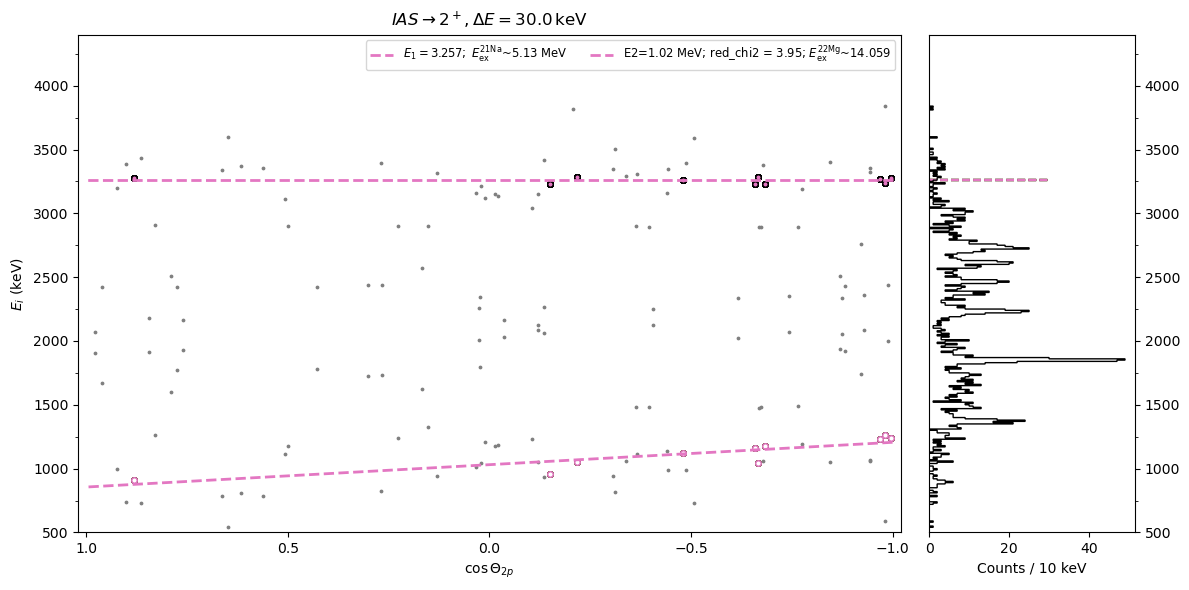

5012 -> ENSDF: [4984. 5020.]
5012 -> Erik: [5020.]


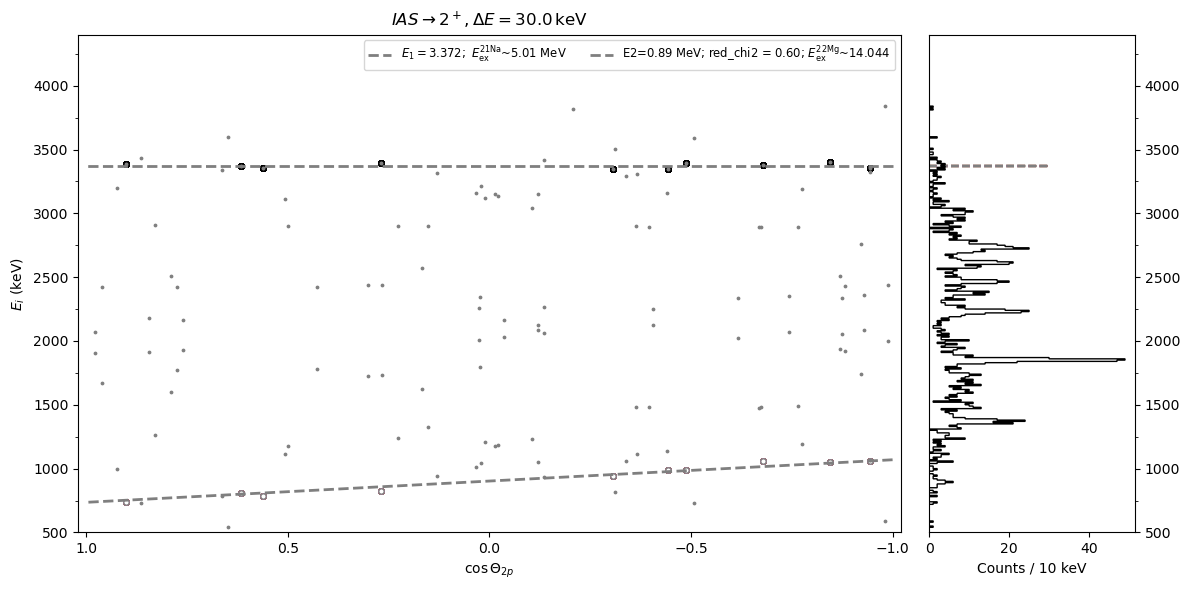

The reduced chi2 values from the fits
[1.188 1.113 1.48  1.477 1.921 0.968 3.667 1.423 2.168 4.061 4.228 3.229
 3.924 3.774 3.495 8.144 3.951 0.604]

Peaks identified by previous studies of 21Na(found values)
[6215. 5813. 5956. 5392. 6046. 5751. 5455. 7616. 5884. 5132. 5012.]

Peaks found in Ensdf / Erik ?
[(False, True), (True, False), (True, True), (True, True), (True, False), (True, False), (True, False), (True, False), (True, False), (False, True), (True, True)]

Peaks not found to match any previously found levels in 21Na
[6606. 5687. 7111. 5626. 5565. 6134. 5318.]

E1 energies:
[1851. 2728. 2224. 1369. 2608. 2472. 2787. 3009. 2386. 2667. 2949.  887.
 2540. 2844. 2302. 3080. 3257. 3372.]
Excited state energies of 21Na:
[6606. 5687. 6215. 7111. 5813. 5956. 5626. 5392. 6046. 5751. 5455. 7616.
 5884. 5565. 6134. 5318. 5132. 5012.]


In [13]:
####################-----------------------------####################
#####
###
# This plotting tries to find lines with a specified dE(which essentially is the width of the peaks allowed)
# and tolerance(fitted E1 value distance to an already known 21Na level)
# and Nmin which specifies how many points we need in order to define a horizontal band
#
######------> This plotting routine does NOT reuse events <------######
#
###
#####
####################-----------------------------####################

# ---- constant fit function ----
def horizontal_line(x, E0):
    return E0 + 0*x

# ---- parameters for horizontal band finder ----
Nmin = 10   # minimum events per band
dE   = 30.0 # keV tolerance
tolerance = 30

potential_excitedstates = []
potential_diffs_ensdf= []
potential_diffs_erik= []
ensdf_erik = []
vals=[]
reds = []
identifiable_peaks = []
non_matched_peaks = []
e1bands, e2bands, cos1bands, cos2bands = [], [], [], []
Ex, E1s = [],[]


# ---- Q2p gate ----
m   = 4400
lim = (4350,4580)
title = fr"$IAS \rightarrow 2^+, \Delta E={dE} \, \mathrm{{keV}}$"

mask = (Q2p >= lim[0]) & (Q2p <= lim[1])
cos_th = np.cos(np.deg2rad(theta[mask]))
e1 = np.array(E1[mask])
e2 = np.array(E2[mask])
Q2p_mean = lim[0] + (lim[1] - lim[0])/2

N = len(e1)
if len(e2) != N:
    raise ValueError("e1 and e2 must have the same length (one entry per event).")

# ---- iterative band finder with strict event exclusion ----
unassigned = np.ones(N, dtype=bool)   # events available for band finding
event_band_idx = np.full(N, -1)       # store which band each event belongs to (-1 = unassigned)
bands = []
band_index = 0

colors = plt.cm.tab10.colors

while True:
    # candidate energies from unassigned events
    cand_e1 = e1[unassigned]
    cand_e2 = e2[unassigned]
    if cand_e1.size + cand_e2.size == 0:
        break

    candidates = np.concatenate([cand_e1, cand_e2])
    best = None  # (count, Ecand, inlier_events_mask)

    # find the candidate that produces the most events
    for Ecand in candidates:
        mask_e1_close = (np.abs(e1 - Ecand) <= dE)
        mask_e2_close = (np.abs(e2 - Ecand) <= dE)
        inlier_events = (mask_e1_close | mask_e2_close) & unassigned
        n = inlier_events.sum()
        if best is None or n > best[0]:
            best = (n, Ecand, inlier_events)

    if best is None or best[0] < Nmin:
        break  # no more acceptable bands

    count, Ecand_best, inlier_events = best
    # mark these events as belonging to this band
    event_band_idx[inlier_events] = band_index
    bands.append((inlier_events, Ecand_best, count))

    # split mask into e1 and e2 (same as your original logic)
    mask_e1 = (np.abs(e1 - Ecand_best) <= dE) & unassigned
    mask_e2 = (np.abs(e2 - Ecand_best) <= dE) & unassigned

    # ---- build arrays for fitting ----
    E1_band = np.concatenate([np.array(e1[mask_e1]), np.array(e2[mask_e2])])
    cos1_band = np.concatenate([np.array(cos_th[mask_e1]), np.array(cos_th[mask_e2])])

    E2_band = np.concatenate([np.array(e1[mask_e2]), np.array(e2[mask_e1])])
    cos2_band = np.concatenate([np.array(cos_th[mask_e2]), np.array(cos_th[mask_e1])])

    # ---- fit horizontal line to E1_band ----
    p_opt1, _ = curve_fit(horizontal_line, cos1_band, E1_band)
    E1_fit = p_opt1[0]
    Q1_fit = E1_fit*(mNa + mp)/mNa

    # ---- fit y2 as in your original script ----
    popt2, _ = curve_fit(y2, cos2_band, E2_band, p0=[p_opt1[0], Q2p_mean-Q1_fit],
                         bounds=([E1_fit,0],[E1_fit+1e-12,Q2p_mean]))
    E2_fit = popt2[1]
    Q2_fit = E2_fit*(mNe + mp)/mNe
    E2_min = y2(1, E1_fit, E2_fit)
    E2_max = y2(-1, E1_fit, E2_fit)

    mgex = 14050  # (S2p+Q1_fit+Q2_fit)
    sigma_guess = dE
    residuals = E2_band - y2(cos2_band, *popt2)
    dof = max(1, len(E2_band)-len(popt2))
    reduced_chi2 = np.sum((residuals/sigma_guess)**2)/dof
    reds.append(reduced_chi2)

    potential_excitedstates.append((mgex-S1p-E1_fit/frac)/1e3)

    diff_ensdf = (E_excited-(mgex-S1p-E1_fit/frac))
    diff_erik = (Erik_Es- (mgex-S1p-E1_fit/frac))

    match_ensdf_exists = np.any(np.abs(diff_ensdf) <= tolerance)
    match_erik_exists = np.any(np.abs(diff_erik) <= tolerance)

    match_erik = np.NaN
    match_ensdf = np.NaN
    if match_ensdf_exists:
        match_ensdf = E_excited[np.abs(diff_ensdf) <= tolerance]
        print(f"{(mgex-S1p-E1_fit/frac):.0f} -> ENSDF: {match_ensdf}")
    if match_erik_exists:
        match_erik = Erik_Es[np.abs(diff_erik) <= tolerance]
        print(f"{(mgex-S1p-E1_fit/frac):.0f} -> Erik: {match_erik}")

    if match_ensdf_exists or match_erik_exists:
        identifiable_peaks.append((mgex-S1p-E1_fit/frac))
        ensdf_erik.append((match_ensdf_exists,match_erik_exists))
        vals.append((match_ensdf, match_erik))
    if not match_erik_exists and not match_ensdf_exists:
        print(f"No suitable exctited level was found for {(mgex-S1p-E1_fit/frac):.0f}")
        non_matched_peaks.append(mgex-S1p-E1_fit/frac)

    # ---- plotting ----
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(12,6), sharey=True,
        gridspec_kw={'width_ratios':[4,1]}
    )
    e1bands.append(E1_band)
    e2bands.append(E2_band)
    cos1bands.append(cos1_band)
    cos2bands.append(cos2_band)
    # plot already assigned events in their colors
    cols = []
    for b_idx in range(band_index+1):
        cols.append(colors[b_idx % len(colors)])
        color = colors[b_idx % len(colors)]
        ax1.scatter(cos1_band, E1_band, s=15, facecolors=color, edgecolors='k')
        ax1.scatter(cos2_band, E2_band, s=15, facecolors='white', edgecolors=color)
        ax2.hlines(E1_fit, 0,30,color, ls='--')
    
    
    #if match_ensdf_exists or match_erik_exists:
        #for a,b,x1,x2,c in zip(e1bands,e2bands,cos1bands,cos2bands,cols):
        #    ax1.scatter(x1, a, s=15, facecolors=c, edgecolors='k')
        #    ax1.scatter(x2, b, s=15, facecolors='white', edgecolors=c)

    # plot unassigned events in gray
    mask_unassigned = (event_band_idx == -1)
    ax1.scatter(cos_th[mask_unassigned], e1[mask_unassigned], color='gray', s=3)
    ax1.scatter(cos_th[mask_unassigned], e2[mask_unassigned], color='gray', s=3)

    # plot fitted lines
    x_plot = np.linspace(-1, 1, 200)
    ax1.plot(x_plot, horizontal_line(x_plot, E1_fit), color=colors[band_index % len(colors)],
             linestyle='--', linewidth=2, label=rf"$E_{1}={E1_fit/1e3:.3f}; \ E_{{\mathrm{{ex}}}}^{{{21}\mathrm{{Na}}}}$~{(mgex-S1p-E1_fit/frac)/1e3:.2f} MeV")
    ax1.plot(x_plot, y2(x_plot, *popt2), color=colors[band_index % len(colors)],
             linestyle='--', linewidth=2, 
             label=rf"E2={popt2[1]/1e3:.2f} MeV; red_chi2 = {reduced_chi2:.2f}; $E_{{\mathrm{{ex}}}}^{{{22}\mathrm{{Mg}}}}$~{(S2p+Q1_fit+Q2_fit+1634)/1e3:.3f}")

    Ex.append(mgex-S1p-E1_fit/frac)
    E1s.append(E1_fit)

    ax1.set_xlabel(r"$\cos\Theta_{2p}$")
    ax1.set_ylabel(r"$E_i$ (keV)")
    ax1.set_title(title)
    ax1.set_yticks(np.arange(0, m, 250), minor=True)
    ax1.set_xticks(np.arange(1,-1.5,-0.5))
    ax1.set_xlim(1.02,-1.02)
    ax1.legend(fontsize='small', ncol=5)

    # ---- histogram ----
    bins = np.arange(0, 7000+10, 10)
    h1, _ = np.histogram(e1, bins=bins)
    h2, _ = np.histogram(e2, bins=bins)
    ax2.hist(bins[:-1], bins=bins, weights=h1+h2, histtype='step',
            orientation='horizontal', color='k')
    ax2.set_xlabel('Counts / 10 keV')
    ax2.yaxis.set_ticks_position('right')
    ax2.set_yticks(np.arange(0, m, 250), minor=True)
    ax1.set_ylim(500,m)

    fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
    plt.tight_layout()
    plt.show()

    # ---- exclude events used in this band for next iteration ----
    unassigned[inlier_events] = False
    band_index += 1

# ---- final summary printouts ----
print("The reduced chi2 values from the fits")
print(np.round(reds,3))
print()
print("Peaks identified by previous studies of 21Na(found values)")
print(np.round(identifiable_peaks,0))
print()
print("Peaks found in Ensdf / Erik ?")
print(ensdf_erik)
print()
print("Peaks not found to match any previously found levels in 21Na")
print(np.round(non_matched_peaks,0))
print()
print("E1 energies:")
print(np.round(E1s,0))
print("Excited state energies of 21Na:")
print(np.round(Ex,0))



In [14]:
gs = [5819. ,4302., 3552., 5015., 6968., 3870.] # 7/2-, 5/2+, 5/2+, (3/2 5/2)+(erik), 7/2- ,5/2-
gs_non = [5185., 7441.]
first = [6217.,         5821.,       (((5964))),     6050.   ,6986., (((6880))).,   5400.,      5759.,         5460.   ,5897.        ,6142.         ,(((6468.)))]
        # 7/2+(erik), 7/2-,      3/2+(erik) ,      (5/2 7/2)-, 7/2-,      3/2-,    7/2+(erik), (3/2 5/2 7/2)+, 1/2+, (3/2 5/2 7/2)+, (3/2 5/2 7/2)+,     3/2+ 
first_non = [6610., 5691. ,7107. ,6746., 6810., 5616., 6540., 6674. ,7157.]

## two peaks that are present in 0+ and 2+ -> 5815(7/2-)(also a peak at 5828(3/2-)) and 6992(7/2-)

SyntaxError: invalid syntax (933691383.py, line 3)

resuing events:  [5396. 5456. 5755. 5817. 5893. 5960. 6046. 6138. 6213. 6464. 6876. 6982.]
Not reusing events:  [5012. 5132. 5392. 5455. 5751. 5813. 5884. 5956. 6046. 6215. 7616.]


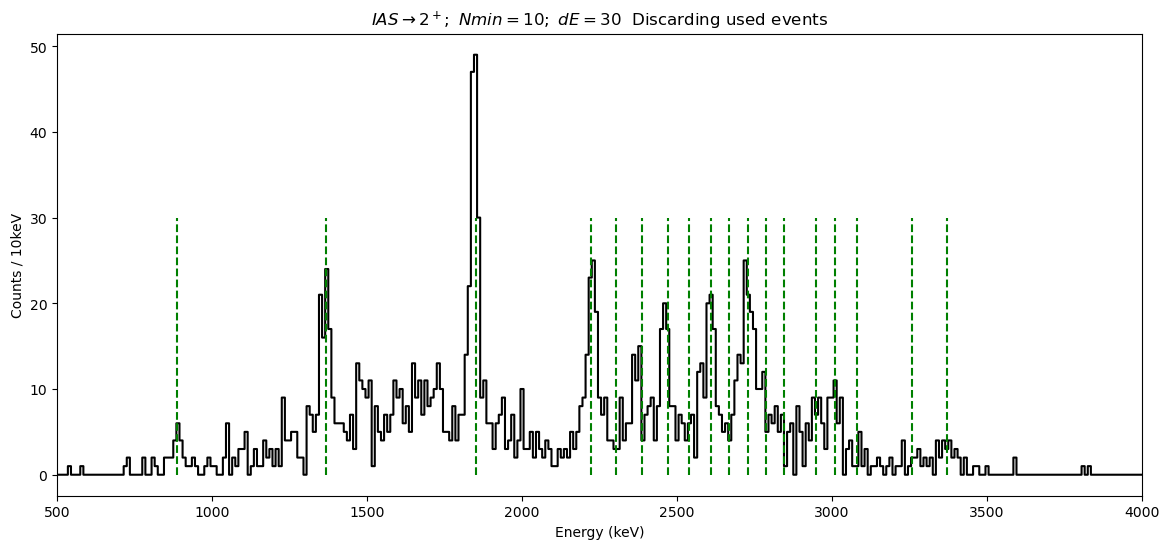

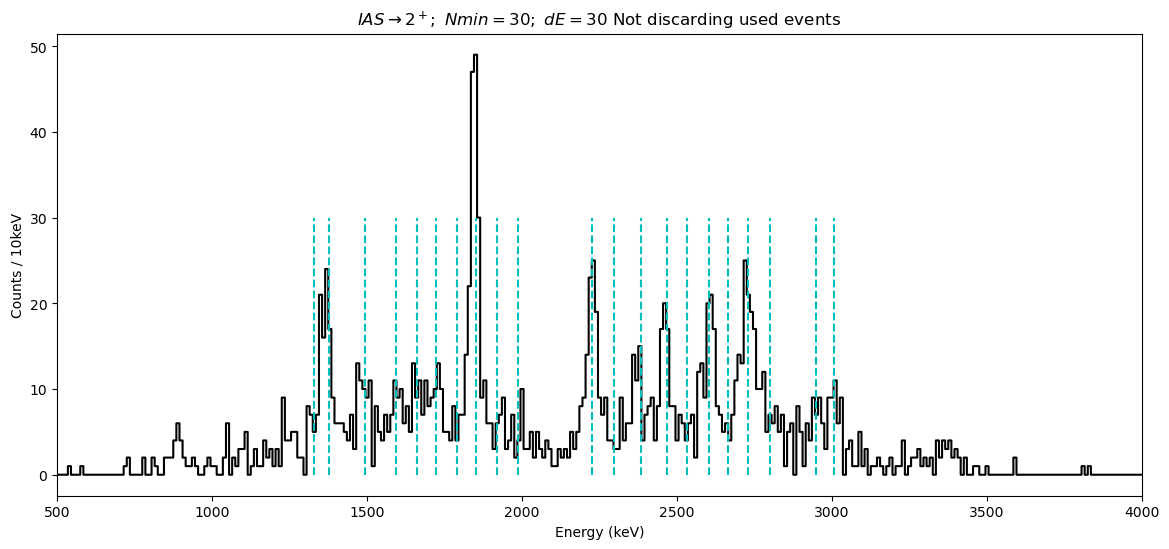

In [21]:
bins = np.arange(0,7000+10,10)

plt.figure(figsize=(14,6))
lims = (4350,4580)
mask = (Q2p >= lims[0]) & (Q2p <= lims[1])
h1, _ = np.histogram(np.array(E1)[mask], bins=bins)
h2, _ = np.histogram(np.array(E2)[mask], bins=bins)
plt.step(bins[:-1], h1+h2, where='mid', color='k')
#"""

nareuse = [6213., 5817., 5960., 6046. ,6982., 6876., 5396. ,5755. ,5456. ,5893., 6138. ,6464.]
nanoreuse = [6215. ,5813. ,5956., 5392., 6046. ,5751., 5455. ,7616., 5884. ,5132., 5012.]

ener = [1851. ,2728., 2224., 1369. ,2608. ,2472. ,2787., 3009., 2386., 2667., 2949. , 887.,
 2540. ,2844., 2302., 3080., 3257., 3372.]#[1851., 2728., 2224., 1369. ,2608., 2472. ,2787. ,3009., 2386., 2667. ,2949. , 887., 2540., 2844. ,2302.]
ener2 = [1851. ,2728. ,2227. ,1377. ,2604. ,2468. ,1721. ,2385., 1493. ,1660. ,2799. ,1594.,
 3006., 1918. ,2663. ,2948. ,1790. ,2531. ,2297., 1986. ,1329.]

for e in ener:
    plt.vlines(e, 0,30, ls='--', color='g')
plt.xlim(500,4000)
plt.xlabel("Energy (keV)")
plt.ylabel("Counts / 10keV")
plt.title(r"$IAS\rightarrow 2^+; \ Nmin=10; \ dE=30$  Discarding used events")
plt.figure(figsize=(14,6))
lims = (4350,4580)
mask = (Q2p >= lims[0]) & (Q2p <= lims[1])
h1, _ = np.histogram(np.array(E1)[mask], bins=bins)
h2, _ = np.histogram(np.array(E2)[mask], bins=bins)
plt.step(bins[:-1], h1+h2, where='mid', color='k')
for ee in ener2:
    plt.vlines(ee, 0,30, ls='--', color='c')
plt.xlim(500,4000)
plt.xlabel("Energy (keV)")
plt.ylabel("Counts / 10keV")
plt.title(r"$IAS\rightarrow 2^+; \ Nmin=30; \ dE=30$ Not discarding used events")

print("resuing events: ", np.sort(nareuse))
print("Not reusing events: ",np.sort(nanoreuse))

In [ ]:
"""
# ---- constant fit function ----
def horizontal_line(x, E0):
    return E0 + 0*x

# ---- parameters for horizontal band finder ----
Nmin = 20   # minimum events per band
dE   = 30.0 # keV tolerance

tolerance = 30
potential_excitedstates = []
potential_diffs_ensdf= []
potential_diffs_erik= []
def find_horizontal_bands(E, Nmin=20, dE=30.0):

    E = np.array(E)
    assigned = np.zeros(E.shape[0], dtype=bool)
    bands = []

    while True:
        idx_cands = np.where(~assigned)[0]
        if idx_cands.size == 0:
            break

        idx_try = idx_cands #np.random.choice(idx_cands, size=min(100, idx_cands.size), replace=False)
        best = None
        for idx in idx_try:
            E_cand = E[idx]
            inliers = (~assigned) & (np.abs(E - E_cand) <= dE)
            n = inliers.sum()
            if best is None or n > best[0]:
                best = (n, inliers, E_cand)

        if best[0] >= Nmin:
            inliers = best[1]
            E_center = np.median(E[inliers])
            bands.append((inliers, E_center, best[0]))
            assigned |= inliers
        else:
            break

    return bands, assigned

# ---- your Q2p gate ----
m   = 4400
lims = (3360,3590)#,(2400,2600)]
peaks = [12970,13040,13110]
title = fr"$Some state \rightarrow ?^+, \Delta E={dE} \, \mathrm{{keV}}$"

for p in peaks:
    mask = (Q2p >= lims[0]) & (Q2p <= lims[1])
    cos_th = np.cos(np.deg2rad(theta[mask]))
    e1 = np.array(E1[mask])
    e2 = np.array(E2[mask])
    Q2p_mean = lim[0] + (lim[1] - lim[0])/2

    # ---- run horizontal band finder on concatenated e1+e2 ----
    E_all = np.concatenate([e1, e2])
    bands, assigned = find_horizontal_bands(E_all, Nmin=Nmin, dE=dE)
    reds = []
    identifiable_peaks = []
    non_matched_peaks = []
    # ---- plot ----
    """
    #fig, (ax1, ax2) = plt.subplots(
    #    1, 2, figsize=(12,6), sharey=True,
    #    gridspec_kw={'width_ratios':[4,1]}
    #)
#
    # scatter all events in gray
    #ax1.scatter(cos_th, e1, color='gray', s=3, label='E1 (unassigned)')
    #ax1.scatter(cos_th, e2, color='lightgray', s=3, label='E2 (unassigned)')
#
    #colors = plt.cm.tab10.colors
    """
    for j, (inliers, E_center, count) in enumerate(bands):
        fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(12,6), sharey=True,
        gridspec_kw={'width_ratios':[4,1]}
        )

        # scatter all events in gray
        ax1.scatter(cos_th, e1, color='gray', s=3, label='E (unassigned)')
        ax1.scatter(cos_th, e2, color='gray', s=3)

        colors = plt.cm.tab10.colors
        c = colors[j % len(colors)]

        # split mask into e1 and e2
        mask_e1 = inliers[:len(e1)]
        mask_e2 = inliers[len(e1):]

        # plot points
        ax1.scatter(cos_th[mask_e1], e1[mask_e1], s=15, facecolors=c, edgecolors='k')
        ax1.scatter(cos_th[mask_e2], e2[mask_e2], s=15, facecolors=c, edgecolors='k')
        ax1.scatter(cos_th[mask_e2], e1[mask_e2], s=15, facecolors=c, edgecolors='k')
        ax1.scatter(cos_th[mask_e1], e2[mask_e1], s=15, facecolors=c, edgecolors='k')
        # ---- fit a constant to all events in the band ----
        E1_band = np.concatenate([np.array(e1[mask_e1]), np.array(e2[mask_e2])])
        cos1_band = np.concatenate([np.array(cos_th[mask_e1]), np.array(cos_th[mask_e2])])
        
        E2_band = np.concatenate([np.array(e1[mask_e2]), np.array(e2[mask_e1])])
        cos2_band = np.concatenate([np.array(cos_th[mask_e2]), np.array(cos_th[mask_e1])])

        p_opt1, _ = curve_fit(horizontal_line, cos1_band, E1_band)
        E1_fit = p_opt1[0]
        Q1_fit = E1_fit/frac
        popt2, _ = curve_fit(y2, cos2_band, E2_band, p0=[p_opt1[0], Q2p_mean-Q1_fit], bounds=([E1_fit,0],[E1_fit+1e-12,Q2p_mean]))
        
        sigma_guess = dE  # or something similar
        residuals = E2_band - y2(cos2_band, *popt2)
        chi2_val = np.sum((residuals / sigma_guess)**2)
        dof = len(E2_band) - len(popt2)
        reduced_chi2 = chi2_val / dof ### chi2~1 -> good fit ; chi2 >> 1 -> poor fit ; chi2 << 1 -> overfitting data
            
        # plot the fitted horizontal line
        x_plot = np.linspace(-1, 1, 200)
        ax1.plot(x_plot, horizontal_line(x_plot, E1_fit), color=c, linestyle='--', linewidth=2, label=rf"$E_{{\mathrm{{ex}}}}^{{{21}\mathrm{{Na}}}}$~{(p-S1p-E1_fit/frac)/1e3:.2f} MeV")#Q1~{E_fit/frac:.0f} keV")
        ax1.plot(x_plot, y2(x_plot, *popt2), color=c, linestyle='--', linewidth=2, label=f"E2={popt2[1]/1e3:.2f} MeV; red_chi2 = {reduced_chi2:.2f}")#Q1~{E_fit/frac:.0f} keV")

        potential_excitedstates.append((p-S1p-E1_fit/frac)/1e3)

        diff_ensdf = (E_excited-(p-S1p-E1_fit/frac))
        diff_erik = (Erik_Es- (p-S1p-E1_fit/frac))    
        
        match_ensdf_exists = np.any(np.abs(diff_ensdf) <= tolerance)
        match_erik_exists = np.any(np.abs(diff_erik) <= tolerance)

        # Print ENSDF matches if they exist
        if match_ensdf_exists:
            matches = E_excited[np.abs(diff_ensdf) <= tolerance]
            print(f"{(p-S1p-E1_fit/frac):.0f} -> ENSDF: {matches}")

        # Print Erik matches if they exist
        if match_erik_exists:
            matches = Erik_Es[np.abs(diff_erik) <= tolerance]
            print(f"{(p-S1p-E1_fit/frac):.0f} -> Erik: {matches}")

        if match_ensdf_exists or match_erik_exists:
            identifiable_peaks.append((p-S1p-E1_fit/frac))
        if not match_erik_exists and not match_ensdf_exists:
            print(f"No suitable exctited level was found for {(p-S1p-E1_fit/frac):.0f}")
            non_matched_peaks.append(p-S1p-E1_fit/frac)
            
        # ---- finalize plot ----
        ax1.set_xlabel(r"$\cos\Theta_{2p}$")
        ax1.set_ylabel(r"$E_i$ (keV)")
        ax1.set_title(title)
        ax1.set_ylim(500, m)
        ax1.set_yticks(np.arange(0, m, 250), minor=True)
        ax1.set_xticks(np.arange(1,-1.5,-0.5))
        ax1.set_xlim(1.02,-1.02)
        ax1.legend(fontsize='small', ncol=5)
        reds.append(reduced_chi2)

        # ---- histogram ----
        bins = np.arange(0, 7000+10, 10)
        h1, _ = np.histogram(e1, bins=bins)
        h2, _ = np.histogram(e2, bins=bins)
        ax2.hist(bins[:-1], bins=bins, weights=h1+h2, histtype='step',
                orientation='horizontal', color='k')

        ax2.set_xlabel('Counts / 10 keV')
        ax2.yaxis.set_ticks_position('right')
        ax2.set_yticks(np.arange(0, m, 250), minor=True)

        fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
        plt.tight_layout()
        plt.show()
        print(potential_diffs_ensdf)

    #plt.hist(potential_diffs_ensdf, bins=np.arange(-10,40+5,5), histtype='step')
    #plt.hist(potential_diffs_erik, bins=np.arange(-10,40+5,5), histtype='step')
    print(np.round(reds,3))
    print(np.round(identifiable_peaks,0))
    print(np.round(non_matched_peaks,0))
    """

IndentationError: unexpected indent (836023120.py, line 75)

In [ ]:
#[5368.             6005. 6068.       5928.]             #<----####
#      [5292. 6129.             6243.         5515.]     #xxx--####
#
#[5438. 5362. 6199. 6075. 6138. 6313. 5998.]             #<----####
#                                            [5585.]     #xxx--####
#
#      [5432.       6145. 6208.       6068.]             #<----####
#[5508.      6269.              6383.         5655.]     #xxx--####

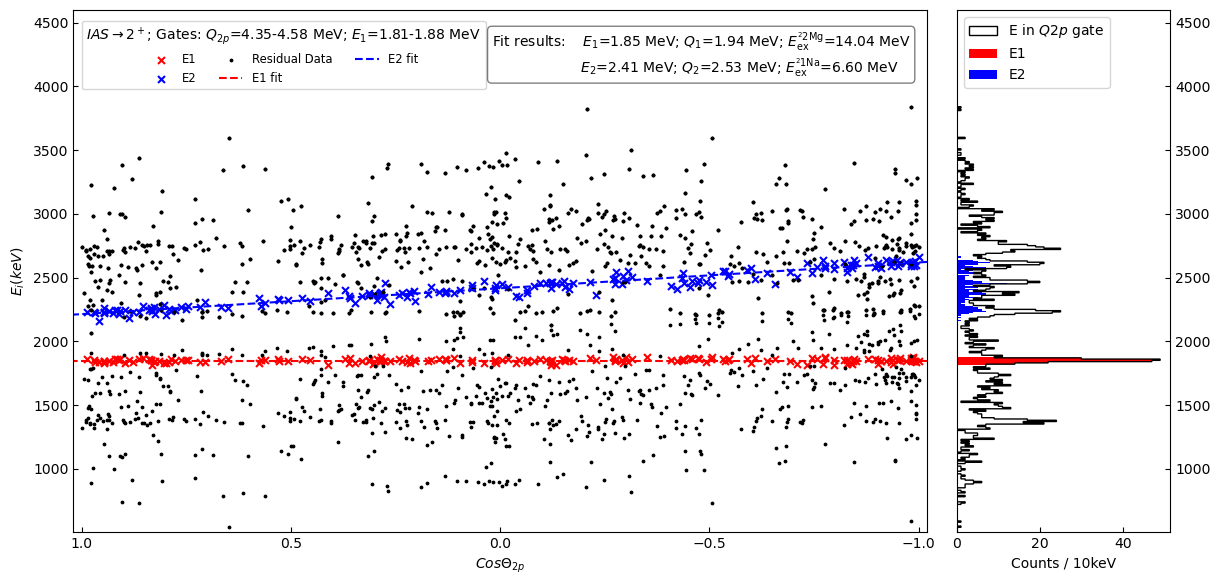

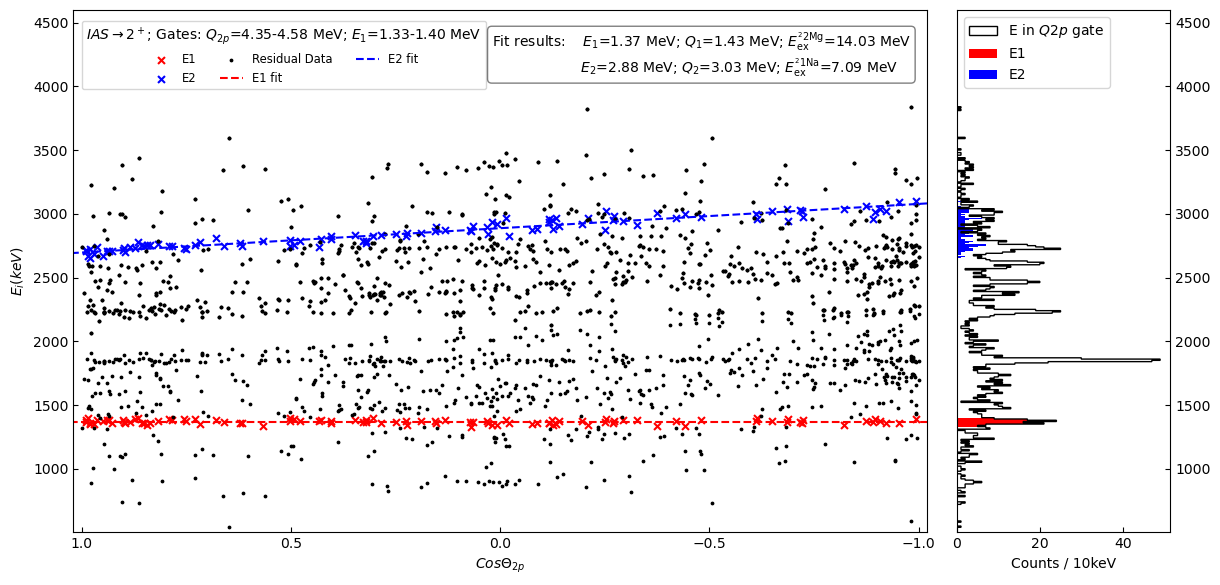

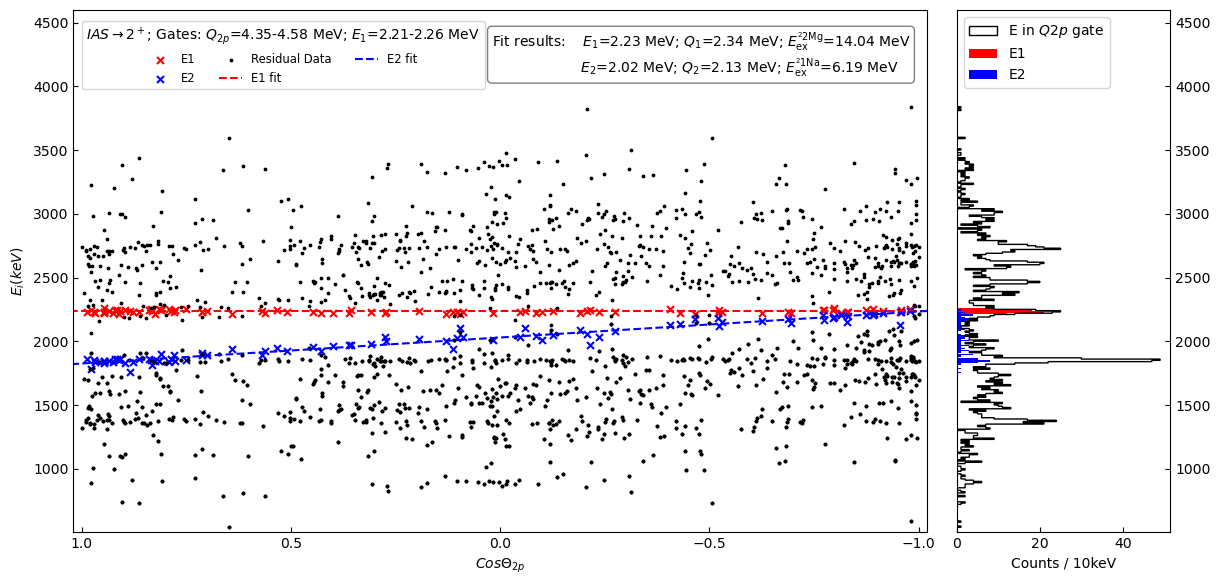

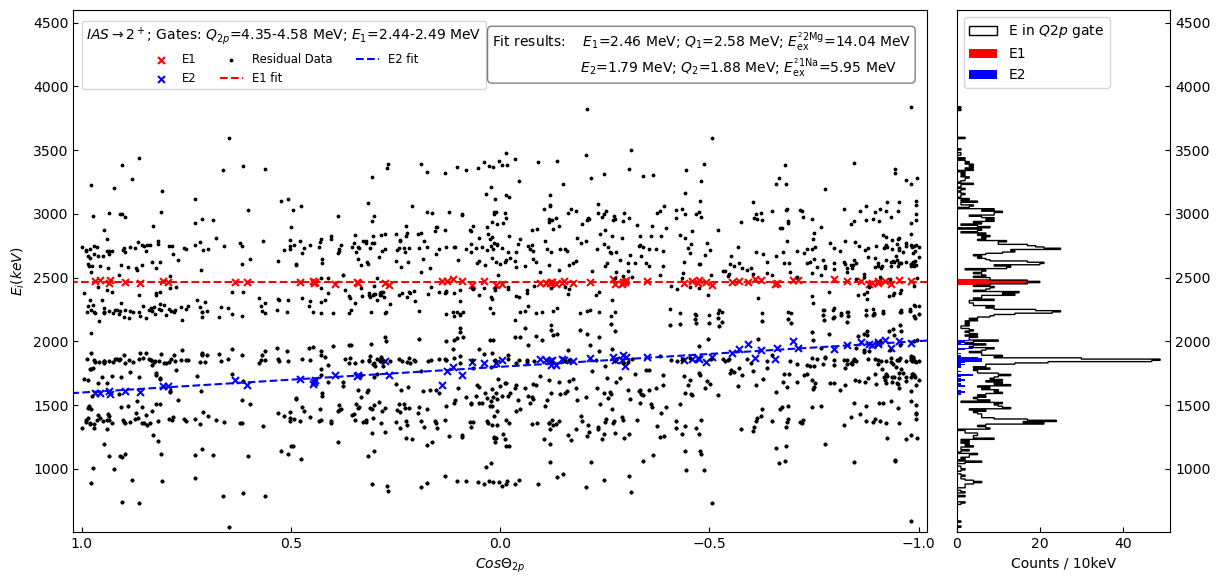

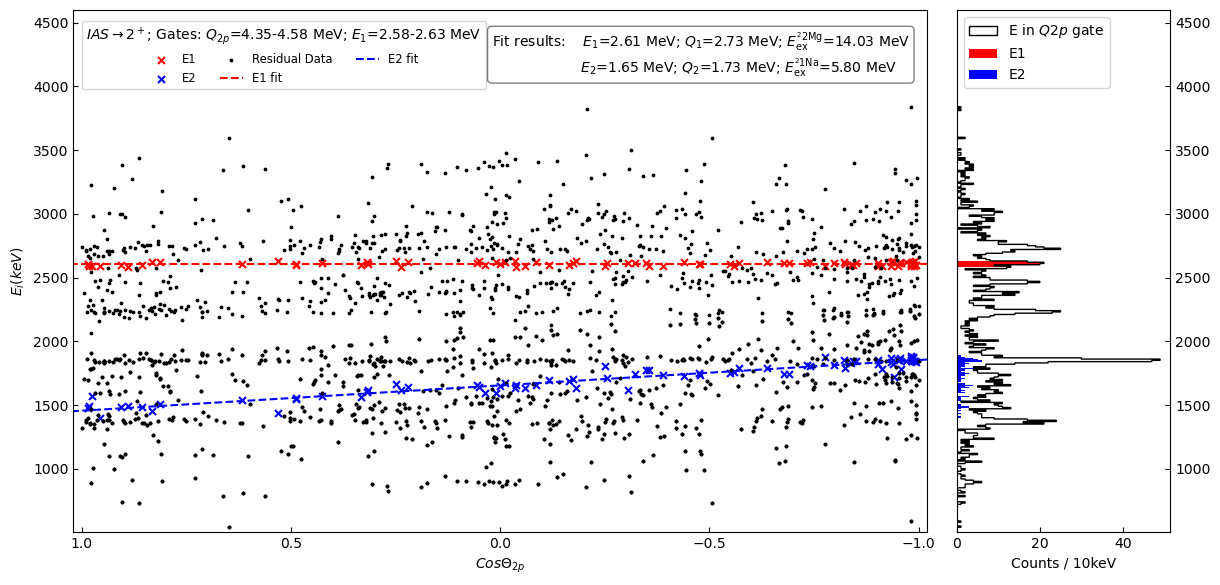

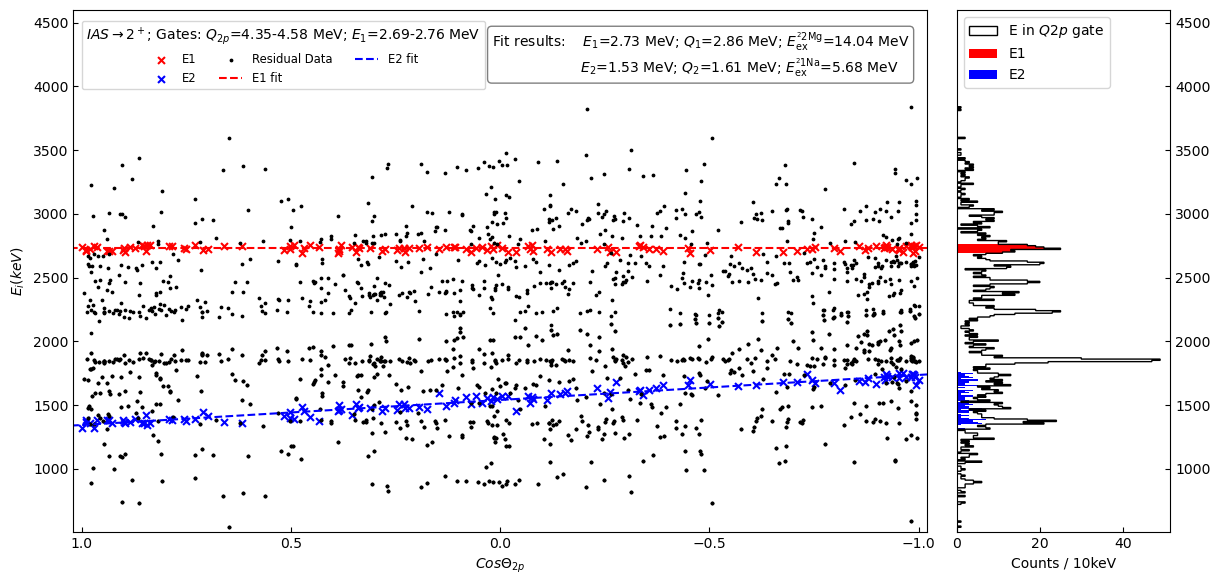

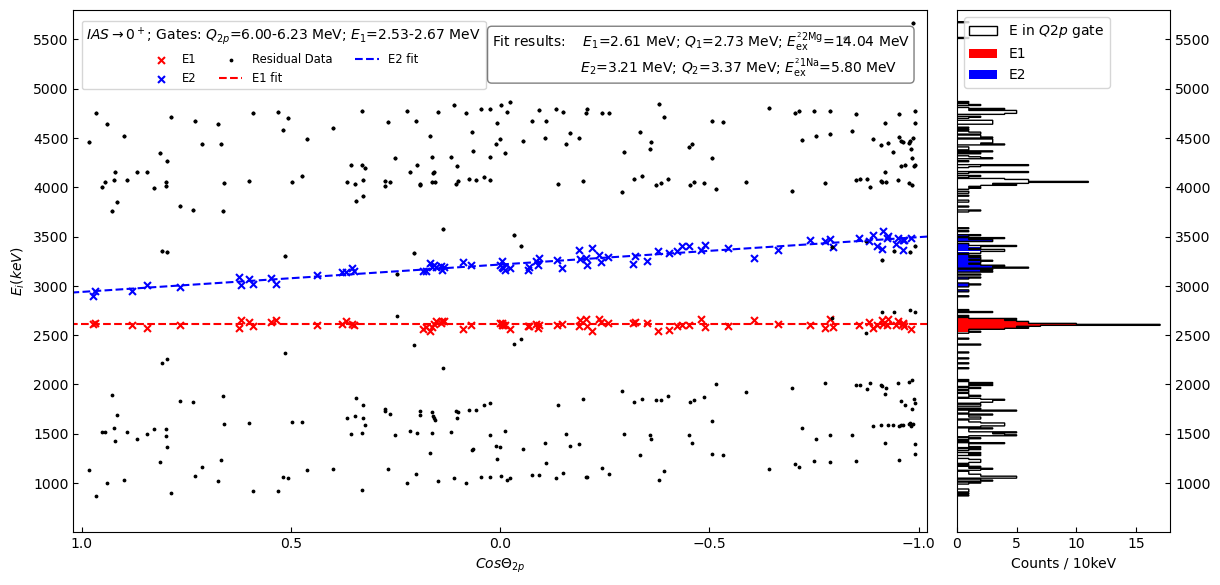

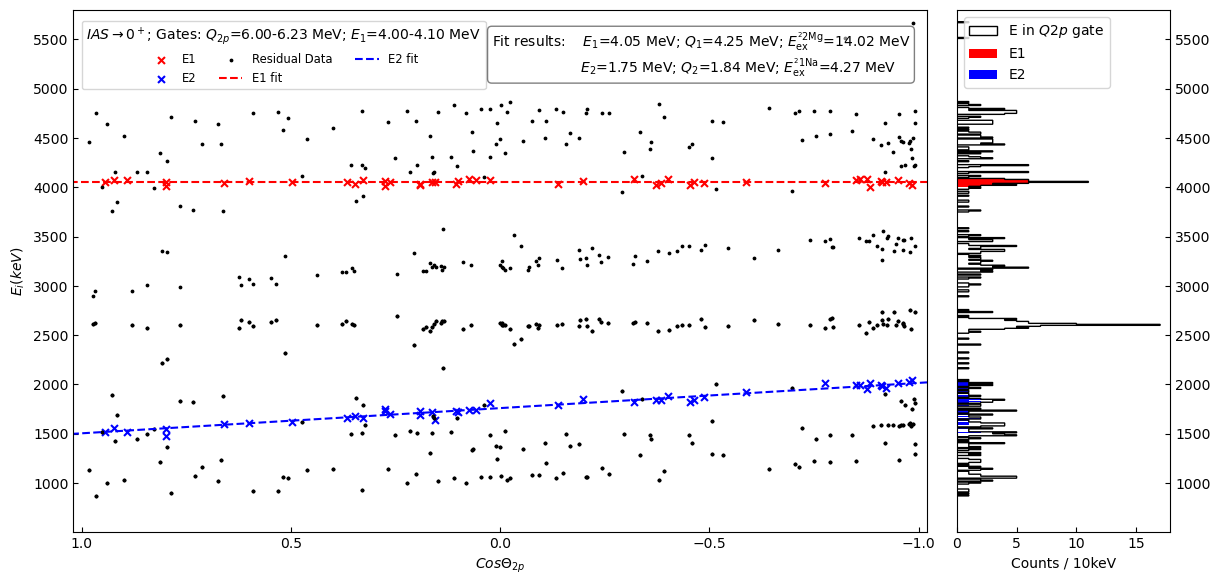

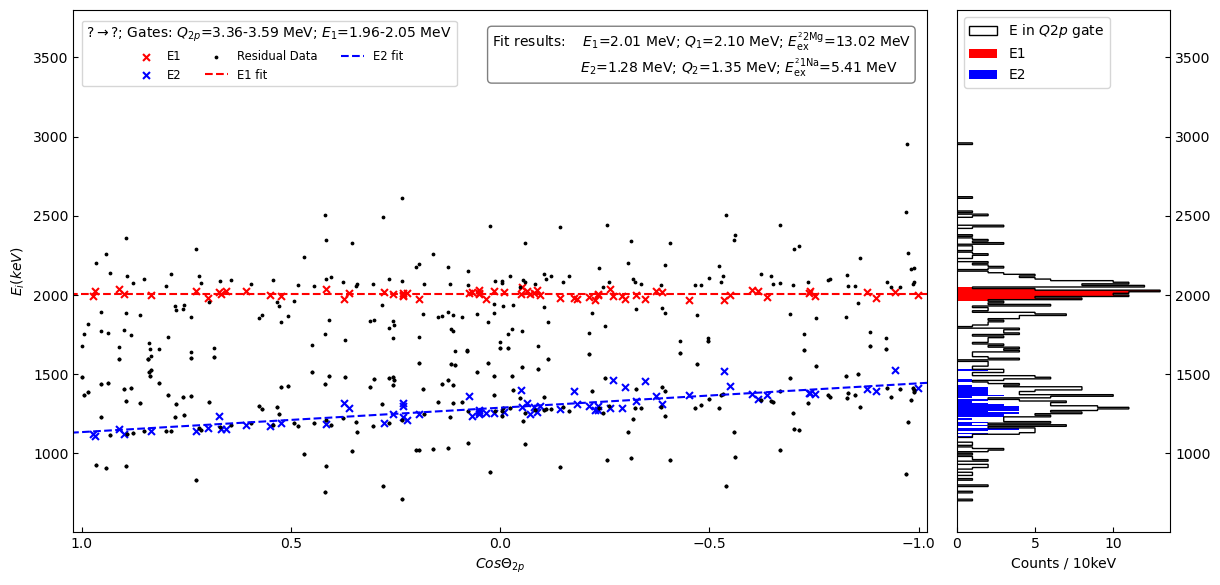

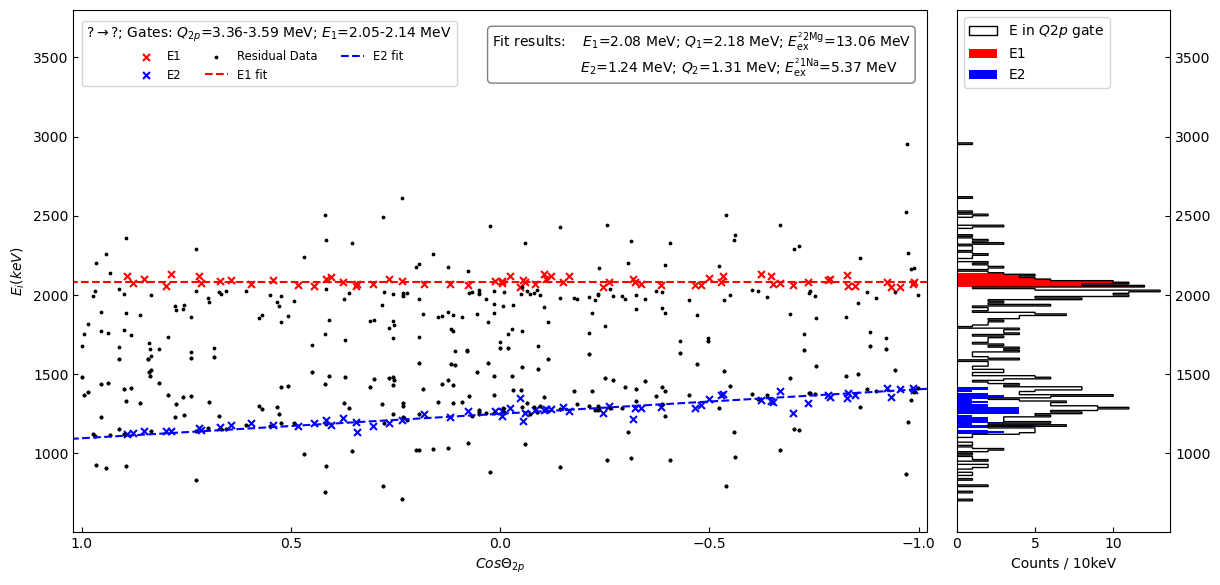

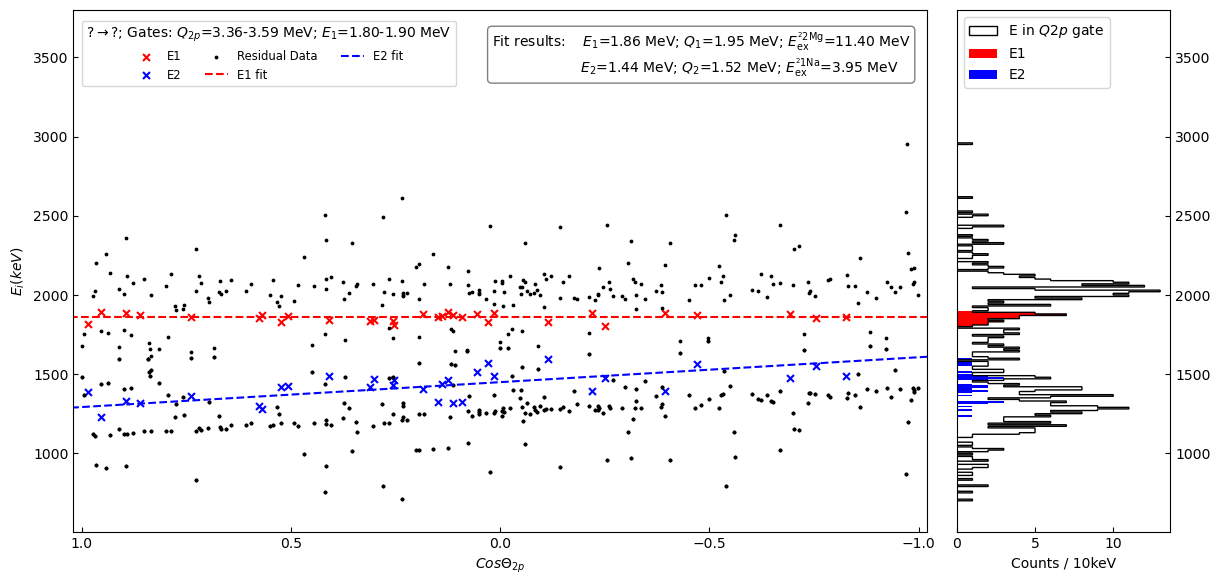

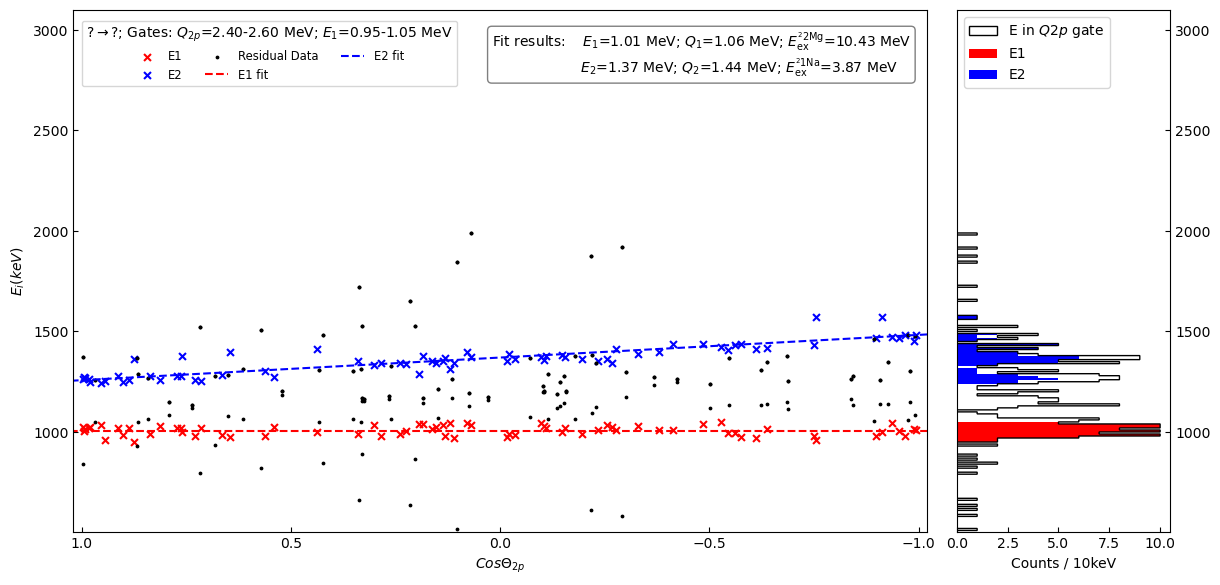

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
Theta = theta
E = EE2p
# Constants
mp  = 1007825.031898
mNa = 20997654.459
mNe = 19992440.17525
S1p = 5504.1000
S2p = 7935.9963
QB  = 17600

def y1(x, E1):
    return E1 + 0*x

def y2(x, E1, E2):  # E1 may be fixed
    M = mp/mNa
    return E2 - 2*M*np.sqrt(E1*E2)*x + E1*M**2
trans = [r"$IAS\rightarrow{2}^+$",r"$IAS\rightarrow{0}^+$",r"$?\rightarrow?$", r"$?\rightarrow?$"]
transition = [[1634,1634,1634,1634,1634,1634], [0,0], [1634,1634,0], [0]]
ms = [4600, 5800, 3800, 3100]
lims = [(4350,4580), (6000,6230), (3360,3590), (2400,2600)]
ranges1 = [(1810,1880), (1330,1400), (2210,2260), (2440,2490), (2580,2630), (2690,2760)]
ranges2= [(2530,2670), (4000,4100)]
ranges3 = [(1960,2050), (2050,2140), (1800,1900)]#1960,2140)]#
ranges4 = [(950,1050)]#, (1100,1250)]
ranges = [ranges1, ranges2, ranges3, ranges4]

X = np.linspace(-1.1, 1.1, 100)

txa = 0.15
tya = 0.84
txb = txa
tyb = 0.3

for i in range(len(lims)):
    Q2p_low = lims[i][0]
    Q2p_upp = lims[i][1]
    Q2p_mean = Q2p_low + (Q2p_upp - Q2p_low)/2
    mask = (Q2p >= Q2p_low) & (Q2p <= Q2p_upp)
    e1s = E1[mask]
    e2s = E2[mask]
    ts = Theta[mask]
    for j in range(len(ranges[i])):
        # Arrays for selected and residual events
        e1 = e2 = CosTheta = np.array([])
        e1R = e2R = CosThetaR = np.array([])

        E1_low  = ranges[i][j][0]
        E1_upp  = ranges[i][j][1]
        E1_mean = E1_low + (E1_upp - E1_low)/2
        Q1_mean = E1_mean*(mNa + mp)/mNa
        used_indices = np.array([])

        for k in range(len(Q2p[mask]+1)):
            if k in used_indices:
                    continue
                # Determine which proton is E1 and which is E2
            if Q1_mean > Q2p_mean/2:
                E1tmp = max(e1s[k], e2s[k])
                E2tmp = min(e1s[k], e2s[k])
            else:
                E1tmp = min(e1s[k], e2s[k])
                E2tmp = max(e1s[k], e2s[k])

                # Assign to selected or residual arrays
            if E1_low <= E1tmp <= E1_upp:
                e1 = np.append(e1, E1tmp)
                e2 = np.append(e2, E2tmp)
                CosTheta = np.append(CosTheta, np.cos(np.deg2rad(ts[k])))
                used_indices = np.append(used_indices, k)

            else:
                e1R = np.append(e1R, E1tmp)
                e2R = np.append(e2R, E2tmp)
                CosThetaR = np.append(CosThetaR, np.cos(np.deg2rad(ts[k])))

        # Fit
        if len(e1) > 0:
            p1, c1 = curve_fit(y1, CosTheta, e1, p0=E1_mean)
            p2, c2 = curve_fit(y2, CosTheta, e2, p0=[p1[0], Q2p_mean-Q1_mean],
                               bounds=([p1[0],0],[p1[0]+1e-12,Q2p_mean]))

        # Plot
        fig, (ax1, ax2) = plt.subplots(
            1, 2, figsize=(12,6), sharey=True, 
            gridspec_kw={'width_ratios':[4,1]}
        )
        #fig.subplots_adjust(wspace=0.05) 
        # Left scatter plot
        ax1.scatter(CosTheta, e1, s=25, marker='x', color='r', label='E1')
        ax1.scatter(CosTheta, e2, s=25, marker='x', color='b', label="E2")#facecolors='w', edgecolors='b', label='E2')
        ax1.scatter(CosThetaR, e1R, s=3, color='k', label='Residual Data')
        ax1.scatter(CosThetaR, e2R, s=3, color='k')
        ax1.scatter(CosThetaR, e2R, s=3, color='k')
        #ax1.scatter(ts, e1s, s=6, color='g')
        #ax1.scatter(ts, e2s, s=6, color='g')

        E1_est = p1[0]
        Q1_est = E1_est*(mNa + mp)/mNa
        E2_est = p2[1]
        Q2_est = E2_est*(mNe + mp)/mNe
        E2_min = y2(1, E1_est, E2_est)
        E2_max = y2(-1, E1_est, E2_est)
        
        ax1.set_xlim(1, -1)
        ax1.set_ylabel(f"$E_i (keV)$")
        ax1.plot(X, y1(X, *p1), '--', color='r', label="E1 fit")#, label=rf"Fit $E_1$={p1[0]/1e3:.2f} MeV; $Q_1$={Q1_est/1e3:.2f} MeV; $E_{{ex}}^{{22\mathrm{{Mg}}}}$={(Q1_est+Q2_est + 7.936e3 + transition[i])/1e3:.2f} MeV")
        ax1.plot(X, y2(X, *p2), '--', color='b', label="E2 fit")#, label=rf"Fit $E_2$={p2[1]/1e3:.2f} MeV; $Q_2$={Q2_est/1e3:.2f} MeV; $E_{{ex}}^{{21\mathrm{{Na}}}}$={(Q2_est + 2.432e3 + transition[i])/1e3:.2f} MeV")
        ax1.legend(title=rf"{trans[i]}; Gates: $Q_{{2p}}$={Q2p_low/1e3:.2f}-{Q2p_upp/1e3:.2f} MeV; $E_1$={E1_low/1e3:.2f}-{E1_upp/1e3:.2f} MeV", fontsize='small', loc='upper left', ncol=3, bbox_to_anchor=(0.003, 0.99))
        
        # Right histogram
        bins = np.arange(0,7000+10,10)#min(np.min(e1), np.min(e2), np.min(e1R), np.min(e2R)),
                         #max(np.max(e1), np.max(e2), np.max(e1R), np.max(e2R))+25, 25)
        h1, _ = np.histogram(e1s, bins=bins)
        h2, _ = np.histogram(e2s, bins=bins)
        hR, _ = np.histogram(np.concatenate([e1R,e2R]), bins=bins)
        ax2.hist(bins[:-1], bins=bins, weights=h1+h2, orientation='horizontal', color='k', histtype='step', label=r"E in $Q{2p}$ gate")
        ax2.hist(e1, bins=bins, orientation='horizontal', color='r', label="E1")#, histtype='step')
        ax2.hist(e2, bins=bins, orientation='horizontal', color='b', label="E2")#, histtype='step')
        #ax2.hist(bins[:-1], bins=bins, weights=hR, orientation='horizontal', color='k', histtype='step')
        ax2.set_xlabel('Counts / 10keV')
        ax2.yaxis.tick_right()

        ax2.legend(loc='upper left')
        ax2.yaxis.tick_right()
        ax1.set_xlabel(r"$Cos\Theta_{2p}$")
        ax1.set_xticks(np.arange(1,-1.5,-0.5))
        ax1.set_xlim(1.02,-1.02)
        
        fig.text(0.418, 0.87, 
         rf"Fit results:    $E_1$={E1_est/1e3:.2f} MeV; $Q_1$={Q1_est/1e3:.2f} MeV; $E_{{\mathrm{{ex}}}}^{{^{22}\mathrm{{Mg}}}}$={(S2p + transition[i][j] + Q2_est + Q1_est)/1e3:.2f} MeV" 
         + "\n" +
         rf"                    $E_2$={E2_est/1e3:.2f} MeV; $Q_2$={Q2_est/1e3:.2f} MeV; $E_{{\mathrm{{ex}}}}^{{^{21}\mathrm{{Na}}}}$={(S2p + transition[i][j] - S1p + Q2_est)/1e3:.2f} MeV",
         bbox=dict(boxstyle="round", ec='k', fc='w', alpha=0.5))


        #fig.text(X2, Y2, "Fit results: $E_{2}\sim%.2f\,..%.2f$ MeV; $Q_{2}\sim%.2f$ MeV; $E_{\mathrm{ex}}^{^{21}\mathrm{Na}}\sim%.2f$ MeV" 
        #             % (E2_min/1e3, E2_max/1e3, Q2_est/1e3, ((S2p + transition[i]) - S1p + Q2_est)/1e3),
        #            bbox=dict(boxstyle="round", ec='k', fc='w',alpha=0.5,), fontsize='x-small')
        
        plt.tight_layout()
        ax1.tick_params(axis='both', direction='in', which='both')
        ax2.tick_params(axis='both', direction='in', which='both') #ax.minorticks_on()
        ax2.tick_params(axis="y", labelleft=False, labelright=True)
        ax1.set_yticks(np.arange(500, ms[i], 500))
        ax1.set_xticks(np.arange(1,-1.1, -0.5))
        ax2.set_ylim(501,ms[i])
        plt.show()


In [1]:
ms = [4000]#, 5200, 3200, 2500]
lims = [(4350,4580)]#, (6000,6230), (3360,3590), (2400,2600)]
ranges1 = [(1330,1400), (1810,1880), (2210,2260), (2440,2490), (2580,2630), (2690,2760)]
ranges2= [(2530,2670), (4020,4100)]
ranges3 = [(1960,2050), (2050,2140)]
ranges4 = [(950,1050)]


trans = [r"$IAS\rightarrow{2}^+$"]#,r"$IAS\rightarrow{0}^+$",r"$?\rightarrow?$", r"$?\rightarrow?$"]
for l, m,t in zip(lims, ms,trans):
    mask = (Q2p >= l[0]) & (Q2p <= l[1])
    Q_mean = (l[0]+l[1])/2
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(12,6), sharey=True, 
        gridspec_kw={'width_ratios':[4,1]}
    )
    
    # Left: scatter plot
    #ax1.scatter(np.cos(theta[mask]), E1[mask], color='k', s=0.5)
    #ax1.scatter(np.cos(theta[mask]), E2[mask], color='k', s=0.5)
    #ax1.set_xlabel(r"$Cos\Theta_{2p}$")
    #ax1.set_ylabel(r"$E_i$ (keV)")
    ax1.set_title(f"{t}")
    ax1.set_yticks(np.arange(0,m,250), minor=True)
    ax1.set_ylim(500, m)
    
    # Right: horizontal histogram with 'step' style
    h1, _ = np.histogram(E1[mask], bins=bins)
    h2, _ = np.histogram(E2[mask], bins=bins)
    ax2.hist(bins[:-1], bins=bins, weights=h1+h2, histtype='step', orientation='horizontal', color='k')
    
    ex = [] ## largest vals
    ey = [] ## lowest vals
    for e1,e2 in zip(E1[mask], E2[mask]):
        if e1>e2:
            ex.append(e1)
            ey.append(e2)
        else:
            ex.append(e2)
            ey.append(e1)
    ax1.scatter(ex,ey, color='k', s=0.5)  
    
    #bins2 = np.arange(950,1050+10,10)
    #h3, _ = np.histogram(E1[mask], bins=bins2)
    #h4, _ = np.histogram(E2[mask], bins=bins2)
    #ax2.hist(bins2[:-1], bins=bins2, weights=h3+h4, histtype='step', orientation='horizontal', color='r')

    
    ax2.set_xlabel('Counts / 10keV')
    ax2.yaxis.set_ticks_position('right')  # ticks on right side
    ax2.set_yticks(np.arange(0,m, 250), minor=True)
    
    fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
    plt.tight_layout()
    plt.show()
plt.scatter(ex,ey, color='k', s=0.5)
plt.xlim(2100,3500)
plt.ylim(750,2500)

NameError: name 'Q2p' is not defined